In [1]:
window_size="_128"
# " + window_size + "

In [2]:
import adclasses
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import math
from datetime import timedelta
import os
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [3]:
dataset_name_list = ["ambient_temperature_system_failure",
                     "ec2_cpu_utilization_ac20cd",
                     "exchange-2_cpc_results",
                     "exchange-2_cpm_results",
                     "exchange-3_cpm_results",
                     "ibm-common-stock-closing-prices",
                     "rds_cpu_utilization_cc0c53",
                     "artificial_cd_1_random_removal",
                     "nyc_taxi_random_removal",
                     "artificial_cd_3_random_removal"]
true_outlier_indices_dict = {}
ad_dict = {}

# ambient_temperature_system_failure

In [4]:
dataset_name = "ambient_temperature_system_failure"

path = "data/" + dataset_name + ".csv"

data = pd.read_csv(path, header=0)
start_date = data["timestamp"].values[0]
end_date = data["timestamp"].values[-1]
print("Start date: ", start_date)
print("End date: ", end_date)
data["timestamp"] = pd.to_datetime(data["timestamp"], format="%Y-%m-%d %H:%M:%S")

print("Missing time stamps: \n", adclasses.find_missing_time_steps(start_date, end_date, '1H', data))

data["timestamp"] = pd.to_datetime(data["timestamp"], format="%Y-%m-%d %H:%M:%S")
ad = adclasses.UnivariateAnomalyDetection(dataframe=data, timestep="1H", dateformat="%Y-%m-%d %H:%M:%S", name=dataset_name)
print("Length: ", ad.get_length())
print("Time step size: ", ad.get_timestep())
print("Date Format: ", ad.get_dateformat())
true_outlier_dates = ["2013-12-22 20:00:00",
                      "2014-04-13 09:00:00"]
true_outlier_indices = ad.convert_true_outlier_date(true_outlier_dates)

true_outlier_indices_dict[dataset_name] = true_outlier_indices
ad_dict[dataset_name] = ad

Start date:  2013-07-04 00:00:00
End date:  2014-05-28 15:00:00
Missing time stamps: 
 DatetimeIndex(['2013-07-28 02:00:00', '2013-07-28 05:00:00',
               '2013-07-28 06:00:00', '2013-07-28 07:00:00',
               '2013-07-28 08:00:00', '2013-07-28 09:00:00',
               '2013-07-28 10:00:00', '2013-07-28 11:00:00',
               '2013-07-28 12:00:00', '2013-07-28 13:00:00',
               ...
               '2014-04-10 05:00:00', '2014-04-10 06:00:00',
               '2014-04-10 07:00:00', '2014-04-10 08:00:00',
               '2014-04-10 09:00:00', '2014-04-10 10:00:00',
               '2014-04-10 11:00:00', '2014-04-10 12:00:00',
               '2014-04-10 13:00:00', '2014-04-10 14:00:00'],
              dtype='datetime64[ns]', length=621, freq=None)
Length:  7888
Time step size:  1H
Date Format:  %Y-%m-%d %H:%M:%S


# ec2_cpu_utilization_ac20cd

In [5]:
dataset_name = "ec2_cpu_utilization_ac20cd"

path = "data/" + dataset_name + ".csv"

data = pd.read_csv(path, header=0)
start_date = data["timestamp"].values[0]
end_date = data["timestamp"].values[-1]
print("Start date: ", start_date)
print("End date: ", end_date)

data["timestamp"] = pd.to_datetime(data["timestamp"], 
                                   format="%Y-%m-%d %H:%M:%S")

print("Missing time stamps: \n", adclasses.find_missing_time_steps(start_date, end_date, 
                                                                   '5min', data))
ad = adclasses.UnivariateAnomalyDetection(dataframe=data, 
                                          timestep="5min", 
                                          dateformat="%Y-%m-%d %H:%M:%S", 
                                          name=dataset_name)
print("Length: ", ad.get_length())
print("Time step size: ", ad.get_timestep())
print("Start Date: ", start_date)
print("End Date: ", end_date)
print("Date Format: ", ad.get_dateformat())
true_outlier_dates = ["2014-04-15 00:49:00"]
true_outlier_indices = ad.convert_true_outlier_date(true_outlier_dates)

true_outlier_indices_dict[dataset_name] = true_outlier_indices
ad_dict[dataset_name] = ad

Start date:  2014-04-02 14:29:00
End date:  2014-04-16 14:49:00
Missing time stamps: 
 DatetimeIndex(['2014-04-07 13:39:00', '2014-04-07 13:44:00',
               '2014-04-14 23:49:00', '2014-04-14 23:54:00',
               '2014-04-14 23:59:00'],
              dtype='datetime64[ns]', freq=None)
Length:  4037
Time step size:  5min
Start Date:  2014-04-02 14:29:00
End Date:  2014-04-16 14:49:00
Date Format:  %Y-%m-%d %H:%M:%S


# exchange-2_cpc_results

In [6]:
dataset_name = "exchange-2_cpc_results"

path = "data/" + dataset_name + ".csv"

data = pd.read_csv(path, header=0)
start_date = data["timestamp"].values[0]
end_date = data["timestamp"].values[-1]
print("Start date: ", start_date)
print("End date: ", end_date)

data["timestamp"] = pd.to_datetime(data["timestamp"], 
                                   format="%Y-%m-%d %H:%M:%S")

print("Missing time stamps: \n", adclasses.find_missing_time_steps(start_date, end_date, 
                                                                   '1H', data))

data =data.drop_duplicates(subset="timestamp")

ad = adclasses.UnivariateAnomalyDetection(dataframe=data, 
                                          timestep="1H", 
                                          dateformat="%Y-%m-%d %H:%M:%S", 
                                          name=dataset_name)
print("Length: ", ad.get_length())
print("Time step size: ", ad.get_timestep())
print("Start Date: ", start_date)
print("End Date: ", end_date)
print("Date Format: ", ad.get_dateformat())
true_outlier_dates = ["2011-07-14 13:00:01"]
true_outlier_indices = ad.convert_true_outlier_date(true_outlier_dates)

true_outlier_indices_dict[dataset_name] = true_outlier_indices
ad_dict[dataset_name] = ad

Start date:  2011-07-01 00:00:01
End date:  2011-09-07 15:00:01
Missing time stamps: 
 DatetimeIndex(['2011-07-21 05:00:01', '2011-08-08 18:00:01',
               '2011-08-10 16:00:01', '2011-08-15 22:00:01',
               '2011-08-15 23:00:01', '2011-09-01 19:00:01',
               '2011-09-01 20:00:01', '2011-09-01 21:00:01',
               '2011-09-01 22:00:01', '2011-09-01 23:00:01',
               '2011-09-02 00:00:01', '2011-09-02 01:00:01',
               '2011-09-02 02:00:01', '2011-09-02 03:00:01',
               '2011-09-02 04:00:01', '2011-09-02 05:00:01',
               '2011-09-02 06:00:01', '2011-09-02 07:00:01',
               '2011-09-02 08:00:01', '2011-09-02 09:00:01',
               '2011-09-02 10:00:01', '2011-09-02 11:00:01',
               '2011-09-02 12:00:01', '2011-09-02 13:00:01',
               '2011-09-02 14:00:01'],
              dtype='datetime64[ns]', freq=None)
Length:  1648
Time step size:  1H
Start Date:  2011-07-01 00:00:01
End Date:  2011-09-07 15:0

# exchange-2_cpm_results

In [7]:
dataset_name = "exchange-2_cpm_results"

path = "data/" + dataset_name + ".csv"

data = pd.read_csv(path, header=0)
data = data.dropna()
start_date = data["timestamp"].values[0]
end_date = data["timestamp"].values[-1]
print("Start date: ", start_date)
print("End date: ", end_date)
data["timestamp"] = pd.to_datetime(data["timestamp"], format="%Y-%m-%d %H:%M:%S")

print("Missing time stamps: \n", adclasses.find_missing_time_steps(start_date, end_date, '1H', data))

data =data.drop_duplicates(subset="timestamp")

data["timestamp"] = pd.to_datetime(data["timestamp"], format="%Y-%m-%d %H:%M:%S")
ad = adclasses.UnivariateAnomalyDetection(dataframe=data, timestep="1H", dateformat="%Y-%m-%d %H:%M:%S", name=dataset_name)
print("Length: ", ad.get_length())
print("Time step size: ", ad.get_timestep())
print("Start Date: ", start_date)
print("End Date: ", end_date)
print("Date Format: ", ad.get_dateformat())
true_outlier_dates = ["2011-07-26 06:00:01",
                      "2011-08-10 17:00:01"]
true_outlier_indices = ad.convert_true_outlier_date(true_outlier_dates)

true_outlier_indices_dict[dataset_name] = true_outlier_indices
ad_dict[dataset_name] = ad

Start date:  2011-07-01 00:00:01
End date:  2011-09-07 15:00:01
Missing time stamps: 
 DatetimeIndex(['2011-07-21 05:00:01', '2011-08-08 18:00:01',
               '2011-08-10 16:00:01', '2011-08-15 22:00:01',
               '2011-08-15 23:00:01', '2011-09-01 19:00:01',
               '2011-09-01 20:00:01', '2011-09-01 21:00:01',
               '2011-09-01 22:00:01', '2011-09-01 23:00:01',
               '2011-09-02 00:00:01', '2011-09-02 01:00:01',
               '2011-09-02 02:00:01', '2011-09-02 03:00:01',
               '2011-09-02 04:00:01', '2011-09-02 05:00:01',
               '2011-09-02 06:00:01', '2011-09-02 07:00:01',
               '2011-09-02 08:00:01', '2011-09-02 09:00:01',
               '2011-09-02 10:00:01', '2011-09-02 11:00:01',
               '2011-09-02 12:00:01', '2011-09-02 13:00:01',
               '2011-09-02 14:00:01'],
              dtype='datetime64[ns]', freq=None)
Length:  1648
Time step size:  1H
Start Date:  2011-07-01 00:00:01
End Date:  2011-09-07 15:0

# exchange-3_cpm_results

In [8]:
dataset_name = "exchange-3_cpm_results"

path = "data/" + dataset_name + ".csv"

data = pd.read_csv(path, header=0)
start_date = data["timestamp"].values[0]
end_date = data["timestamp"].values[-1]
print("Start date: ", start_date)
print("End date: ", end_date)

data["timestamp"] = pd.to_datetime(data["timestamp"], 
                                   format="%Y-%m-%d %H:%M:%S")

print("Missing time stamps: \n", adclasses.find_missing_time_steps(start_date, end_date, 
                                                                   '1H', data))

ad = adclasses.UnivariateAnomalyDetection(dataframe=data, 
                                          timestep="1H", 
                                          dateformat="%Y-%m-%d %H:%M:%S", 
                                          name=dataset_name)
print("Length: ", ad.get_length())
print("Time step size: ", ad.get_timestep())
print("Start Date: ", start_date)
print("End Date: ", end_date)
print("Date Format: ", ad.get_dateformat())
true_outlier_dates = ["2011-08-19 18:15:01"]
true_outlier_indices = ad.convert_true_outlier_date(true_outlier_dates)

true_outlier_indices_dict[dataset_name] = true_outlier_indices
ad_dict[dataset_name] = ad

Start date:  2011-07-01 00:15:01
End date:  2011-09-07 14:15:01
Missing time stamps: 
 DatetimeIndex(['2011-07-07 03:15:01', '2011-07-07 04:15:01',
               '2011-07-08 03:15:01', '2011-07-08 04:15:01',
               '2011-07-08 05:15:01', '2011-07-08 07:15:01',
               '2011-07-08 08:15:01', '2011-07-08 11:15:01',
               '2011-07-08 12:15:01', '2011-07-08 13:15:01',
               ...
               '2011-09-01 14:15:01', '2011-09-01 15:15:01',
               '2011-09-01 16:15:01', '2011-09-01 17:15:01',
               '2011-09-04 18:15:01', '2011-09-04 20:15:01',
               '2011-09-05 14:15:01', '2011-09-05 16:15:01',
               '2011-09-06 00:15:01', '2011-09-06 13:15:01'],
              dtype='datetime64[ns]', length=109, freq=None)
Length:  1647
Time step size:  1H
Start Date:  2011-07-01 00:15:01
End Date:  2011-09-07 14:15:01
Date Format:  %Y-%m-%d %H:%M:%S


# ibm-common-stock-closing-prices

In [9]:
dataset_name = "ibm-common-stock-closing-prices"

path = "data/" + dataset_name + ".csv"

data = pd.read_csv(path,header=0)
data["Date"] = pd.to_datetime(data["Date"],format="%Y-%m-%d")

data["timestamp"] = data["Date"]
del data["Date"]
data["value"] = data["IBM common stock closing prices"]
del data["IBM common stock closing prices"]

start_date = data["timestamp"].values[0]
end_date = data["timestamp"].values[-1]
print("Start date: ", start_date)
print("End date: ", end_date)

missing = adclasses.find_missing_time_steps(start_date, end_date, '1D', data)
print("Missing time steps: ", missing)

ad = adclasses.UnivariateAnomalyDetection(dataframe=data, timestep="1D", dateformat="%Y-%m-%d", name=dataset_name)
print("Length: ", ad.get_length())
print("Time step size: ", ad.get_timestep())
print("Start Date: ", start_date)
print("End Date: ", end_date)
print("Date Format: ", ad.get_dateformat())

true_outlier_dates = ["1965-06-08 00:00:00"]
true_outlier_indices = ad.convert_true_outlier_date(true_outlier_dates)

true_outlier_indices_dict[dataset_name] = true_outlier_indices
ad_dict[dataset_name] = ad

Start date:  1962-01-02T00:00:00.000000000
End date:  1965-12-31T00:00:00.000000000
Missing time steps:  DatetimeIndex(['1962-01-06', '1962-01-07', '1962-01-13', '1962-01-14',
               '1962-01-20', '1962-01-21', '1962-01-27', '1962-01-28',
               '1962-02-03', '1962-02-04',
               ...
               '1965-11-28', '1965-12-04', '1965-12-05', '1965-12-11',
               '1965-12-12', '1965-12-18', '1965-12-19', '1965-12-24',
               '1965-12-25', '1965-12-26'],
              dtype='datetime64[ns]', length=452, freq=None)
Length:  1460
Time step size:  1D
Start Date:  1962-01-02T00:00:00.000000000
End Date:  1965-12-31T00:00:00.000000000
Date Format:  %Y-%m-%d


# rds_cpu_utilization_cc0c53

In [10]:
dataset_name = "rds_cpu_utilization_cc0c53"

path = "data/" + dataset_name + ".csv"

data = pd.read_csv(path, header=0)
start_date = data["timestamp"].values[0]
end_date = data["timestamp"].values[-1]
print("Start date: ", start_date)
print("End date: ", end_date)
data["timestamp"] = pd.to_datetime(data["timestamp"], format="%Y-%m-%d %H:%M:%S")

print("Missing time stamps: \n", adclasses.find_missing_time_steps(start_date, end_date, '5min', data))

data["timestamp"] = pd.to_datetime(data["timestamp"], format="%Y-%m-%d %H:%M:%S")
ad = adclasses.UnivariateAnomalyDetection(dataframe=data, timestep="5min", dateformat="%Y-%m-%d %H:%M:%S", name=dataset_name)
print("Length: ", ad.get_length())
print("Time step size: ", ad.get_timestep())
print("Date Format: ", ad.get_dateformat())
true_outlier_dates = ["2014-02-25 07:15:00",
                      "2014-02-27 00:50:00"]
true_outlier_indices = ad.convert_true_outlier_date(true_outlier_dates)

true_outlier_indices_dict[dataset_name] = true_outlier_indices
ad_dict[dataset_name] = ad

Start date:  2014-02-14 14:30:00
End date:  2014-02-28 14:30:00
Missing time stamps: 
 DatetimeIndex(['2014-02-25 07:10:00'], dtype='datetime64[ns]', freq='5T')
Length:  4033
Time step size:  5min
Date Format:  %Y-%m-%d %H:%M:%S


# artificial_cd_1_random_removal

In [11]:
dataset_name = "artificial_cd_1_random_removal"

path = "data/" + dataset_name + ".csv"

data = pd.read_csv(path, header=0)
start_date = data["timestamp"].values[0]
end_date = data["timestamp"].values[-1]
print("Start date: ", start_date)
print("End date: ", end_date)

data["timestamp"] = pd.to_datetime(data["timestamp"], 
                                   format="%Y-%m-%d %H:%M:%S")

print("Missing time stamps: \n", adclasses.find_missing_time_steps(start_date, end_date, 
                                                                   '5min', data))

ad = adclasses.UnivariateAnomalyDetection(dataframe=data, 
                                          timestep="5min", 
                                          dateformat="%Y-%m-%d %H:%M:%S", 
                                          name=dataset_name)
print("Length: ", ad.get_length())
print("Time step size: ", ad.get_timestep())
print("Start Date: ", start_date)
print("End Date: ", end_date)
print("Date Format: ", ad.get_dateformat())
true_outlier_dates = ["2014-04-01 16:40:00",
                      "2014-04-02 09:20:00",
                      "2014-04-03 02:00:00"]
true_outlier_indices = ad.convert_true_outlier_date(true_outlier_dates)

true_outlier_indices_dict[dataset_name] = true_outlier_indices
ad_dict[dataset_name] = ad

Start date:  2014-04-01 00:00:00
End date:  2014-04-03 18:35:00
Missing time stamps: 
 DatetimeIndex(['2014-04-02 05:40:00', '2014-04-02 16:40:00',
               '2014-04-03 12:50:00', '2014-04-03 12:55:00'],
              dtype='datetime64[ns]', freq=None)
Length:  800
Time step size:  5min
Start Date:  2014-04-01 00:00:00
End Date:  2014-04-03 18:35:00
Date Format:  %Y-%m-%d %H:%M:%S


# nyc_taxi_random_removal

In [12]:
dataset_name = "nyc_taxi_random_removal"

path = "data/" + dataset_name + ".csv"

data = pd.read_csv(path, header=0)
start_date = data["timestamp"].values[0]
end_date = data["timestamp"].values[-1]
print("Start date: ", start_date)
print("End date: ", end_date)
data["timestamp"] = pd.to_datetime(data["timestamp"], format="%Y-%m-%d %H:%M:%S")

print("Missing time stamps: \n", adclasses.find_missing_time_steps(start_date, end_date, '30min', data))

data["timestamp"] = pd.to_datetime(data["timestamp"], format="%Y-%m-%d %H:%M:%S")
ad = adclasses.UnivariateAnomalyDetection(dataframe=data, timestep="30min", dateformat="%Y-%m-%d %H:%M:%S", name=dataset_name)
print("Length: ", ad.get_length())
print("Time step size: ", ad.get_timestep())
print("Date Format: ", ad.get_dateformat())
true_outlier_dates = ["2014-11-01 19:00:00",
                      "2014-11-27 15:30:00",
                      "2014-12-25 15:00:00",
                      "2015-01-01 01:00:00",
                      "2015-01-27 00:00:00"]
true_outlier_indices = ad.convert_true_outlier_date(true_outlier_dates)

true_outlier_indices_dict[dataset_name] = true_outlier_indices
ad_dict[dataset_name] = ad

Start date:  2014-07-01 00:00:00
End date:  2015-01-31 23:30:00
Missing time stamps: 
 DatetimeIndex(['2014-07-01 10:30:00', '2014-07-11 18:00:00',
               '2014-08-03 09:30:00', '2014-10-16 17:00:00',
               '2014-10-17 00:30:00', '2014-12-06 12:30:00',
               '2014-12-06 13:00:00', '2014-12-06 13:30:00',
               '2014-12-06 14:00:00'],
              dtype='datetime64[ns]', freq=None)
Length:  10320
Time step size:  30min
Date Format:  %Y-%m-%d %H:%M:%S


# artificial_cd_3_random_removal

In [13]:
dataset_name = "artificial_cd_3_random_removal"

path = "data/" + dataset_name + ".csv"

data = pd.read_csv(path, header=0)
start_date = data["timestamp"].values[0]
end_date = data["timestamp"].values[-1]
print("Start date: ", start_date)
print("End date: ", end_date)

data["timestamp"] = pd.to_datetime(data["timestamp"], 
                                   format="%Y-%m-%d %H:%M:%S")

print("Missing time stamps: \n", adclasses.find_missing_time_steps(start_date, end_date, 
                                                                   '5min', data))

ad = adclasses.UnivariateAnomalyDetection(dataframe=data, 
                                          timestep="5min", 
                                          dateformat="%Y-%m-%d %H:%M:%S", 
                                          name=dataset_name)
print("Length: ", ad.get_length())
print("Time step size: ", ad.get_timestep())
print("Start Date: ", start_date)
print("End Date: ", end_date)
print("Date Format: ", ad.get_dateformat())
true_outlier_dates = ["2014-04-01 16:40:00",
                      "2014-04-02 09:20:00",
                      "2014-04-03 02:00:00",
                      "2014-04-03 18:40:00"]
true_outlier_indices = ad.convert_true_outlier_date(true_outlier_dates)

true_outlier_indices_dict[dataset_name] = true_outlier_indices
ad_dict[dataset_name] = ad

Start date:  2014-04-01 00:00:00
End date:  2014-04-04 11:15:00
Missing time stamps: 
 DatetimeIndex(['2014-04-01 01:20:00', '2014-04-02 02:05:00',
               '2014-04-03 11:50:00'],
              dtype='datetime64[ns]', freq=None)
Length:  1000
Time step size:  5min
Start Date:  2014-04-01 00:00:00
End Date:  2014-04-04 11:15:00
Date Format:  %Y-%m-%d %H:%M:%S


In [14]:
weight_fp_list = []
for i in range(1,11):
    weight_fp_list.append(i/10)
print(weight_fp_list)

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


# SARIMA Results

In [15]:
anomaly_scores_dict = {}

for dataset_name in dataset_name_list:
    output_dict_sarima = joblib.load("anomaly_scores" + window_size + "/SARIMA_auto/" + dataset_name)
    anomaly_scores_dict[dataset_name] = output_dict_sarima["Anomaly Scores"]

In [16]:
adclasses.precision_recall_curve_info(anomaly_scores_dict, true_outlier_indices_dict)

{0.1: {'precision': 0.058823529411764705, 'recall': 0.25},
 0.2: {'precision': 0.058823529411764705, 'recall': 0.25},
 0.3: {'precision': 0.058823529411764705, 'recall': 0.25},
 0.4: {'precision': 0.058823529411764705, 'recall': 0.25},
 0.5: {'precision': 0.058823529411764705, 'recall': 0.25},
 0.6: {'precision': 0.058823529411764705, 'recall': 0.25},
 0.7: {'precision': 0.058823529411764705, 'recall': 0.25},
 0.8: {'precision': 0.058823529411764705, 'recall': 0.25},
 0.9: {'precision': 0.09090909090909091, 'recall': 0.25},
 1.0: {'precision': 0.0, 'recall': 0.0}}

---------weight_fp=0.1, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  16.9
Best window threshold:  0.9986
Corresponding window overall precision:  0.12949640287769784
Corresponding window overall recall:  0.8181818181818182
Corresponding window overall F score:  0.2236024844720497



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.18181818181818182
Corresponding window recall:  1.0
Corresponding window false positives:  9
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1843, 1858, 2226, 2518, 2519, 3552, 4062, 4981, 5915, 5987, 6294, 6501, 6740, 6750, 6753, 6760, 6767, 6773, 6783, 6788, 6791, 6801, 6816, 6817, 6818, 6824, 6825, 6826, 6837, 7667, 7678, 7691, 7692, 7701, 7715, 7737, 7858]


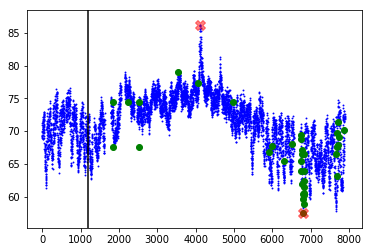




--- ec2_cpu_utilization_ac20cd ---
Corresponding window precision:  0.1111111111111111
Corresponding window recall:  1.0
Corresponding window false positives:  8
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [691, 792, 979, 1197, 1267, 1449, 1467, 1555, 1775, 1843, 2217, 2338, 2388, 2541, 2671, 3032, 3258, 3567, 3568, 3572, 3573, 3580, 3581, 3582, 3799, 3859, 3860, 3874]


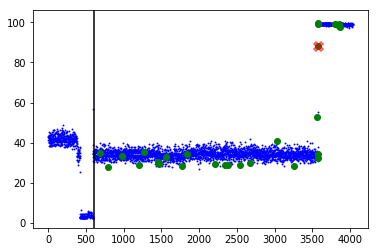




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  8
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [360, 480, 528, 648, 672, 696, 840, 864, 1008, 1032, 1200, 1368, 1488, 1536, 1560, 1569, 1583, 1593, 1595, 1607, 1616, 1617, 1619, 1641]


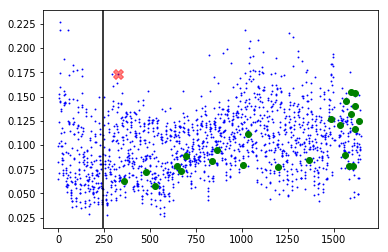




--- exchange-2_cpm_results ---
Corresponding window precision:  0.13333333333333333
Corresponding window recall:  1.0
Corresponding window false positives:  13
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [325, 336, 348, 354, 355, 360, 365, 368, 372, 420, 424, 488, 492, 601, 655, 664, 666, 802, 876, 899, 952, 976, 977, 979, 1002, 1016, 1017, 1105, 1280, 1306, 1325, 1355, 1450, 1500, 1520, 1528, 1627, 1643]


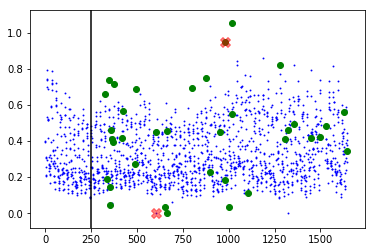




--- exchange-3_cpm_results ---
Corresponding window precision:  0.125
Corresponding window recall:  1.0
Corresponding window false positives:  7
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [251, 252, 553, 567, 661, 757, 781, 793, 819, 836, 837, 901, 902, 1018, 1044, 1193, 1194, 1195, 1355, 1377, 1381, 1451, 1452, 1498, 1531, 1536, 1557, 1571]


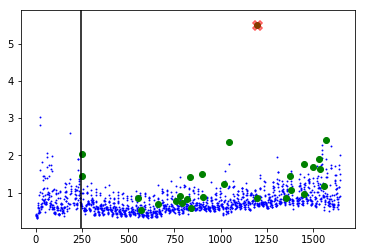




--- ibm-common-stock-closing-prices ---
Corresponding window precision:  0.1111111111111111
Corresponding window recall:  1.0
Corresponding window false positives:  8
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [242, 272, 303, 333, 364, 575, 576, 607, 637, 668, 698, 729, 865, 866, 867, 942, 973, 1003, 1034, 1064, 1095, 1246, 1276, 1307, 1338, 1368, 1399, 1429]


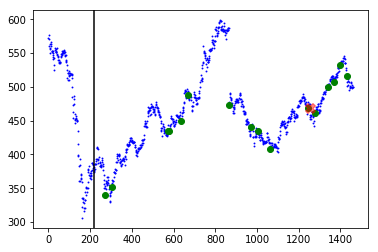




--- rds_cpu_utilization_cc0c53 ---
Corresponding window precision:  0.13333333333333333
Corresponding window recall:  1.0
Corresponding window false positives:  13
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [620, 683, 690, 708, 718, 920, 937, 948, 962, 972, 978, 992, 1006, 1014, 1208, 1235, 1266, 1269, 1283, 1309, 1472, 1498, 1534, 1554, 1569, 1580, 1591, 1746, 1759, 1773, 1798, 1808, 1818, 1832, 1873, 1880, 2011, 2050, 2064, 2072, 2082, 2088, 2096, 2108, 2121, 2378, 2426, 2445, 2456, 2513, 2577, 2595, 2650, 2663, 2678, 2695, 2801, 2924, 2971, 2996, 3021, 3032, 3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 3110, 3111, 3112, 3113, 3114, 3115, 3116, 3117, 3118, 3119, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3127, 3447, 3463, 3469, 3513, 3515, 3519, 3523, 3570, 3571, 3572, 3573, 3574, 3575, 3576, 

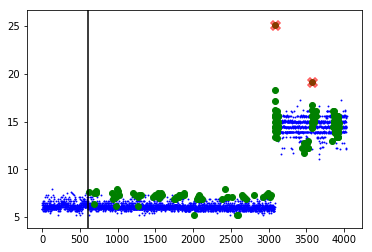




--- artificial_cd_1_random_removal ---
Corresponding window precision:  0.3333333333333333
Corresponding window recall:  0.6666666666666666
Corresponding window false positives:  4
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [201, 240, 264, 288, 400, 402, 404, 405, 406, 407]


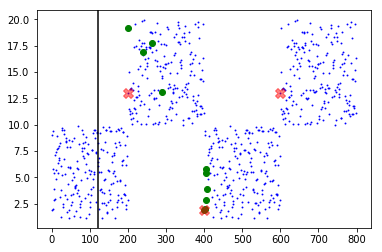




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.12195121951219512
Corresponding window recall:  1.0
Corresponding window false positives:  36
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1593, 1604, 1929, 2029, 2051, 2056, 2063, 2077, 2099, 2125, 2413, 2435, 2461, 2497, 2585, 2586, 2588, 2771, 2781, 2782, 2937, 3018, 3037, 3059, 3085, 3107, 3133, 3169, 3181, 3203, 3261, 3263, 3373, 3469, 3583, 3584, 3757, 3779, 3805, 3827, 4045, 4093, 4141, 4189, 4211, 4259, 4281, 4355, 4381, 4429, 4477, 4525, 4547, 4739, 4751, 4765, 4787, 4813, 4953, 5031, 5053, 5075, 5101, 5134, 5135, 5149, 5171, 5186, 5197, 5341, 5389, 5437, 5459, 5471, 5485, 5507, 5533, 5725, 5795, 5954, 5955, 5956, 5957, 5958, 6157, 6179, 6275, 6297, 6349, 6445, 6493, 6541, 6563, 6585, 6611, 6633, 6733, 6755, 6781, 6829, 6851, 6877, 6899, 6947, 7139, 7281, 7283, 7288, 7305, 7357, 7405, 7453, 7501, 7523, 7837, 7859, 7885, 7907, 7955, 8029, 8077, 8125, 814

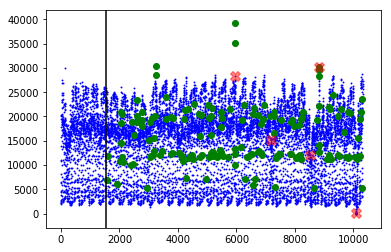




--- artificial_cd_3_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  3
Corresponding window false negatives:  4


Outlier indices as determined by best window threshold:  [264, 288, 576]


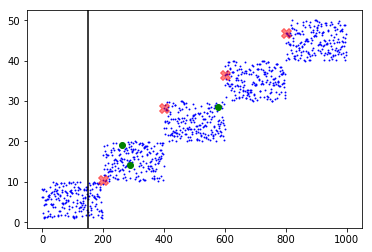

---------weight_fp=0.2, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  19.0
Best window threshold:  1.0
Corresponding window overall precision:  0.3125
Corresponding window overall recall:  0.22727272727272727
Corresponding window overall F score:  0.2631578947368421



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [2518]


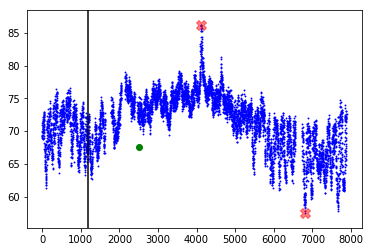




--- ec2_cpu_utilization_ac20cd ---
Corresponding window precision:  0.5
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1843, 3572, 3580, 3581]


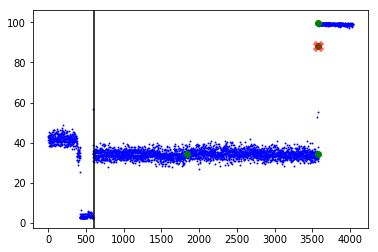




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  []


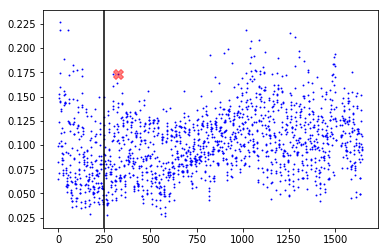




--- exchange-2_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


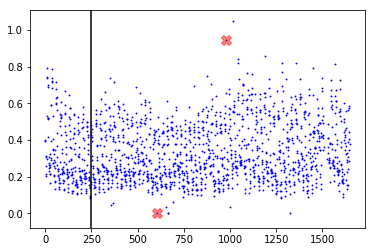




--- exchange-3_cpm_results ---
Corresponding window precision:  0.5
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1044, 1193, 1194, 1195]


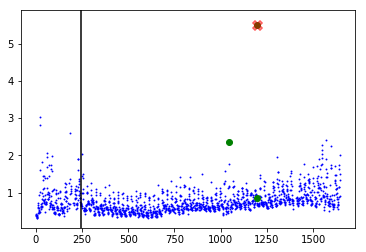




--- ibm-common-stock-closing-prices ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  3
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [242, 272, 303, 364, 607, 668, 698]


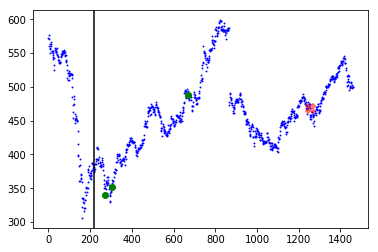




--- rds_cpu_utilization_cc0c53 ---
Corresponding window precision:  0.2
Corresponding window recall:  0.5
Corresponding window false positives:  4
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [690, 978, 1266, 1554, 3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 3110, 3111, 3112, 3113, 3114, 3115, 3116, 3117, 3118, 3119, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3127]


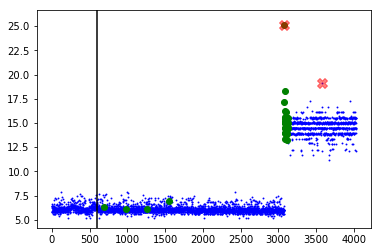




--- artificial_cd_1_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  []


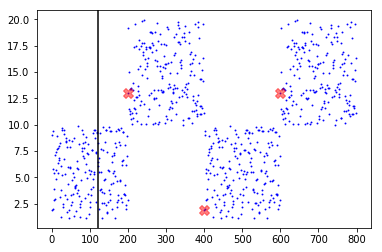




--- nyc_taxi_random_removal ---
Corresponding window precision:  1.0
Corresponding window recall:  0.4
Corresponding window false positives:  0
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  [5954, 5956, 8832, 8833]


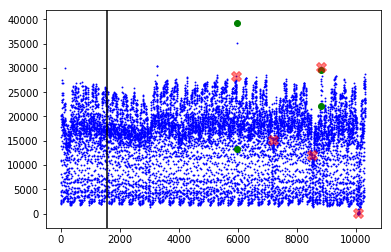




--- artificial_cd_3_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  4


Outlier indices as determined by best window threshold:  []


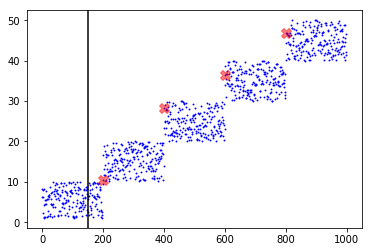

---------weight_fp=0.3, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  20.0
Best window threshold:  1.0
Corresponding window overall precision:  0.3125
Corresponding window overall recall:  0.22727272727272727
Corresponding window overall F score:  0.2631578947368421



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [2518]


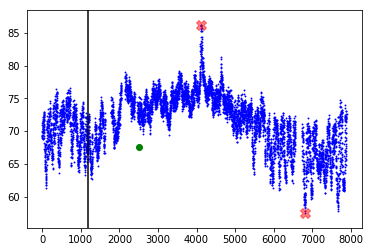




--- ec2_cpu_utilization_ac20cd ---
Corresponding window precision:  0.5
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1843, 3572, 3580, 3581]


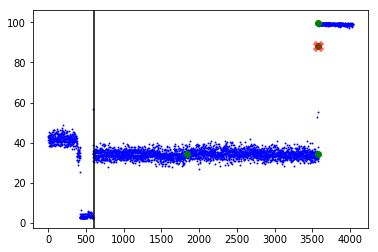




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  []


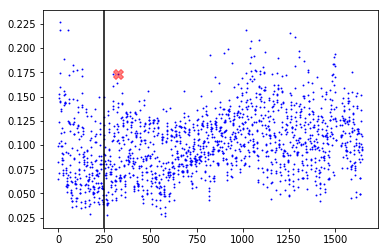




--- exchange-2_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


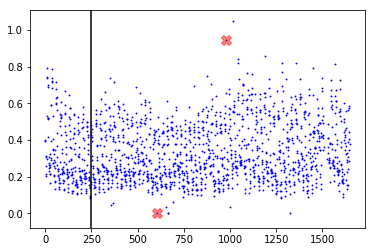




--- exchange-3_cpm_results ---
Corresponding window precision:  0.5
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1044, 1193, 1194, 1195]


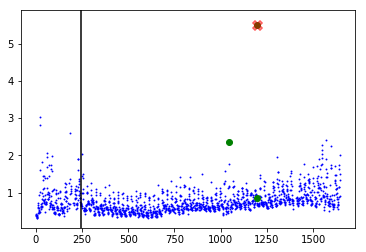




--- ibm-common-stock-closing-prices ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  3
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [242, 272, 303, 364, 607, 668, 698]


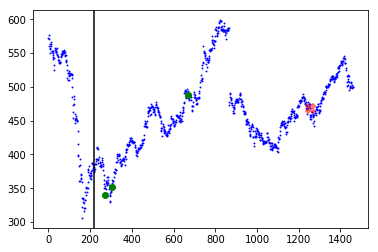




--- rds_cpu_utilization_cc0c53 ---
Corresponding window precision:  0.2
Corresponding window recall:  0.5
Corresponding window false positives:  4
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [690, 978, 1266, 1554, 3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 3110, 3111, 3112, 3113, 3114, 3115, 3116, 3117, 3118, 3119, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3127]


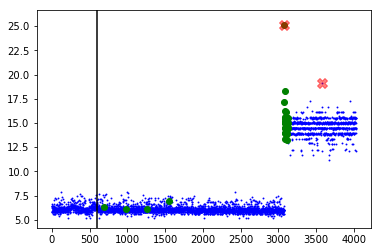




--- artificial_cd_1_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  []


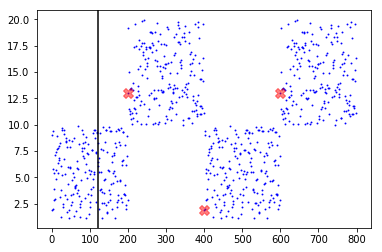




--- nyc_taxi_random_removal ---
Corresponding window precision:  1.0
Corresponding window recall:  0.4
Corresponding window false positives:  0
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  [5954, 5956, 8832, 8833]


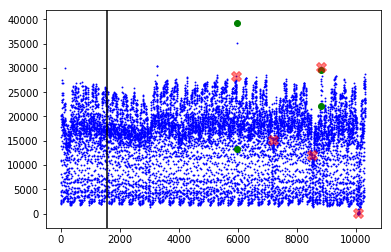




--- artificial_cd_3_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  4


Outlier indices as determined by best window threshold:  []


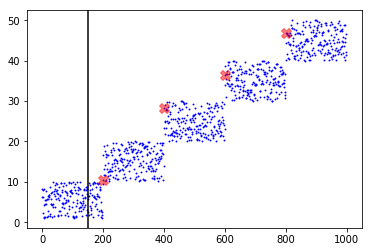

---------weight_fp=0.4, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  21.0
Best window threshold:  1.0
Corresponding window overall precision:  0.3125
Corresponding window overall recall:  0.22727272727272727
Corresponding window overall F score:  0.2631578947368421



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [2518]


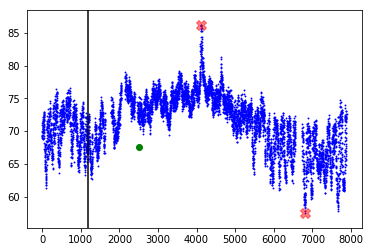




--- ec2_cpu_utilization_ac20cd ---
Corresponding window precision:  0.5
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1843, 3572, 3580, 3581]


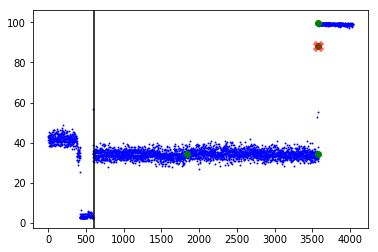




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  []


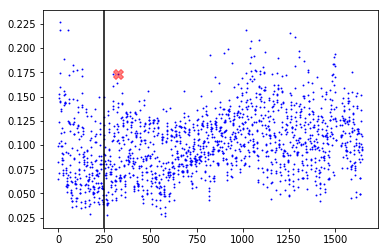




--- exchange-2_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


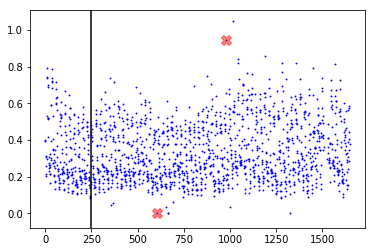




--- exchange-3_cpm_results ---
Corresponding window precision:  0.5
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1044, 1193, 1194, 1195]


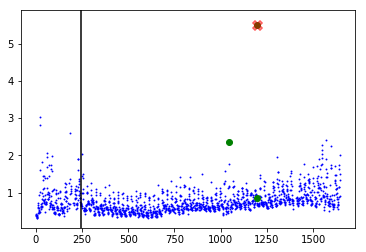




--- ibm-common-stock-closing-prices ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  3
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [242, 272, 303, 364, 607, 668, 698]


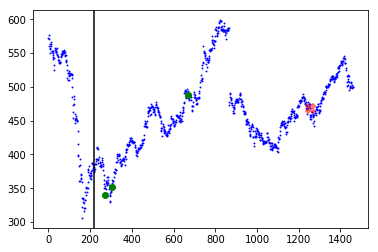




--- rds_cpu_utilization_cc0c53 ---
Corresponding window precision:  0.2
Corresponding window recall:  0.5
Corresponding window false positives:  4
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [690, 978, 1266, 1554, 3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 3110, 3111, 3112, 3113, 3114, 3115, 3116, 3117, 3118, 3119, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3127]


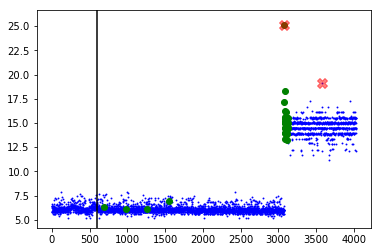




--- artificial_cd_1_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  []


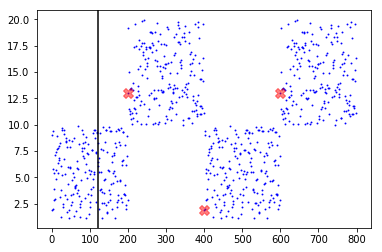




--- nyc_taxi_random_removal ---
Corresponding window precision:  1.0
Corresponding window recall:  0.4
Corresponding window false positives:  0
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  [5954, 5956, 8832, 8833]


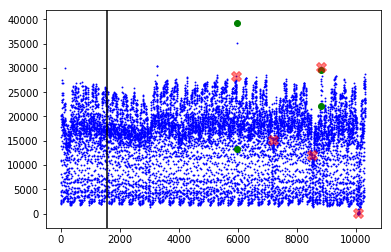




--- artificial_cd_3_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  4


Outlier indices as determined by best window threshold:  []


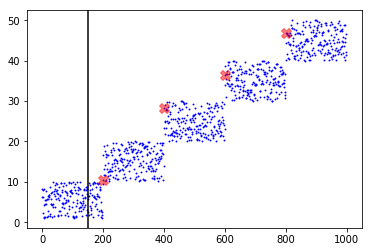

---------weight_fp=0.5, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  22.0
Best window threshold:  1.0
Corresponding window overall precision:  0.3125
Corresponding window overall recall:  0.22727272727272727
Corresponding window overall F score:  0.2631578947368421



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [2518]


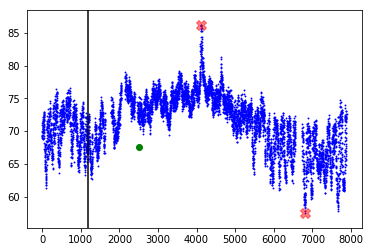




--- ec2_cpu_utilization_ac20cd ---
Corresponding window precision:  0.5
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1843, 3572, 3580, 3581]


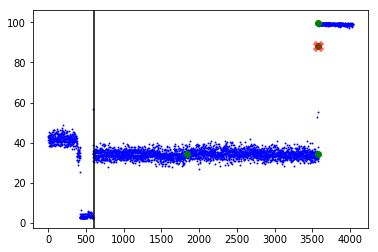




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  []


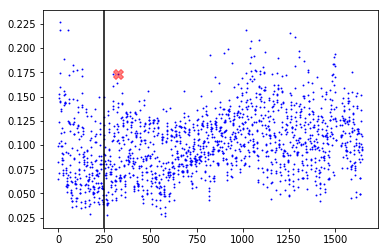




--- exchange-2_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


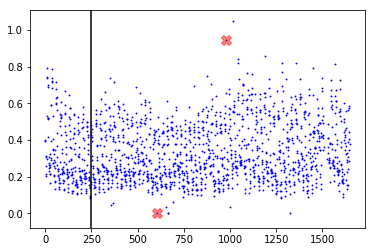




--- exchange-3_cpm_results ---
Corresponding window precision:  0.5
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1044, 1193, 1194, 1195]


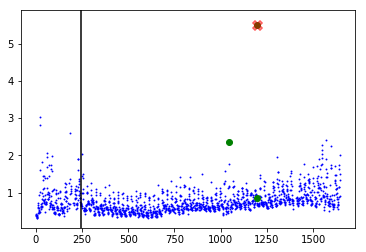




--- ibm-common-stock-closing-prices ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  3
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [242, 272, 303, 364, 607, 668, 698]


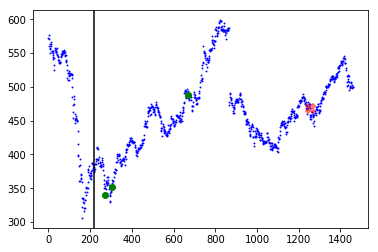




--- rds_cpu_utilization_cc0c53 ---
Corresponding window precision:  0.2
Corresponding window recall:  0.5
Corresponding window false positives:  4
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [690, 978, 1266, 1554, 3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 3110, 3111, 3112, 3113, 3114, 3115, 3116, 3117, 3118, 3119, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3127]


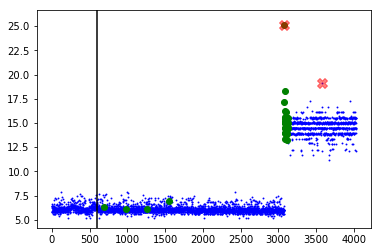




--- artificial_cd_1_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  []


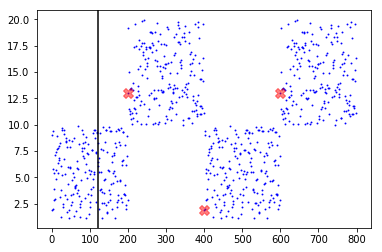




--- nyc_taxi_random_removal ---
Corresponding window precision:  1.0
Corresponding window recall:  0.4
Corresponding window false positives:  0
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  [5954, 5956, 8832, 8833]


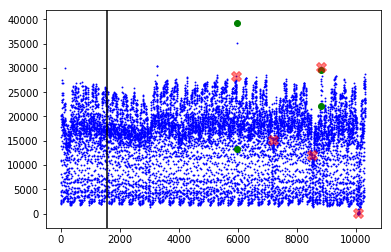




--- artificial_cd_3_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  4


Outlier indices as determined by best window threshold:  []


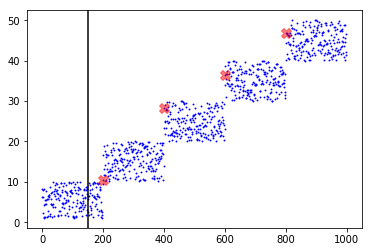

---------weight_fp=0.6, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  23.0
Best window threshold:  1.0
Corresponding window overall precision:  0.3125
Corresponding window overall recall:  0.22727272727272727
Corresponding window overall F score:  0.2631578947368421



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [2518]


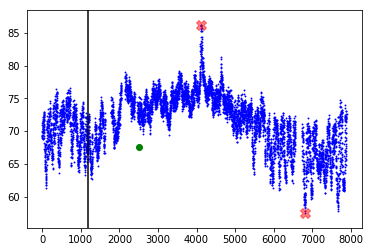




--- ec2_cpu_utilization_ac20cd ---
Corresponding window precision:  0.5
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1843, 3572, 3580, 3581]


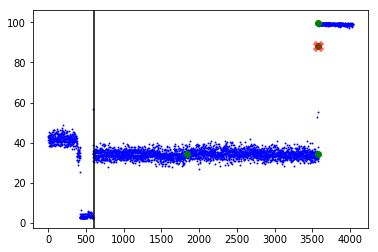




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  []


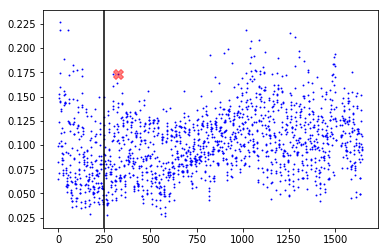




--- exchange-2_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


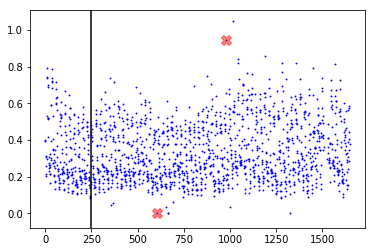




--- exchange-3_cpm_results ---
Corresponding window precision:  0.5
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1044, 1193, 1194, 1195]


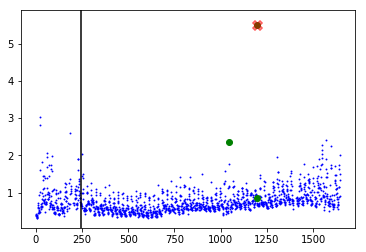




--- ibm-common-stock-closing-prices ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  3
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [242, 272, 303, 364, 607, 668, 698]


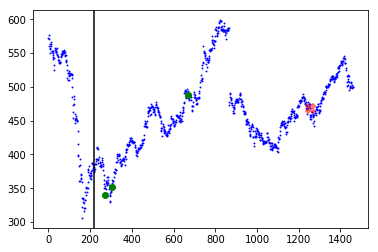




--- rds_cpu_utilization_cc0c53 ---
Corresponding window precision:  0.2
Corresponding window recall:  0.5
Corresponding window false positives:  4
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [690, 978, 1266, 1554, 3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 3110, 3111, 3112, 3113, 3114, 3115, 3116, 3117, 3118, 3119, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3127]


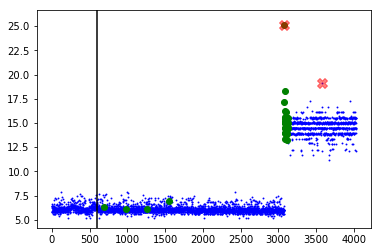




--- artificial_cd_1_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  []


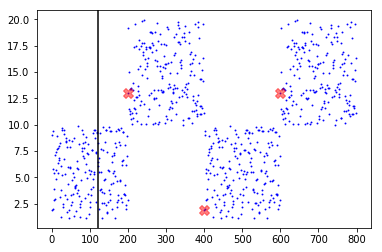




--- nyc_taxi_random_removal ---
Corresponding window precision:  1.0
Corresponding window recall:  0.4
Corresponding window false positives:  0
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  [5954, 5956, 8832, 8833]


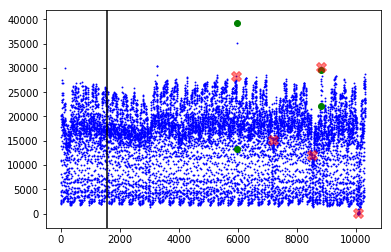




--- artificial_cd_3_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  4


Outlier indices as determined by best window threshold:  []


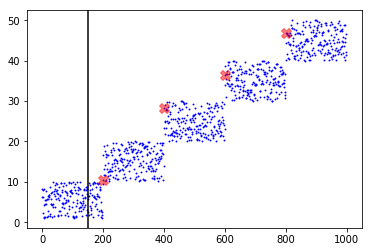

---------weight_fp=0.7, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  24.0
Best window threshold:  1.0
Corresponding window overall precision:  0.3125
Corresponding window overall recall:  0.22727272727272727
Corresponding window overall F score:  0.2631578947368421



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [2518]


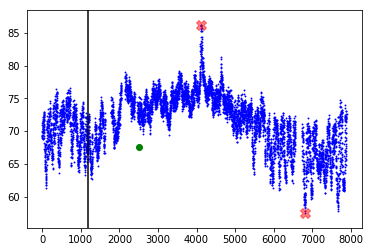




--- ec2_cpu_utilization_ac20cd ---
Corresponding window precision:  0.5
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1843, 3572, 3580, 3581]


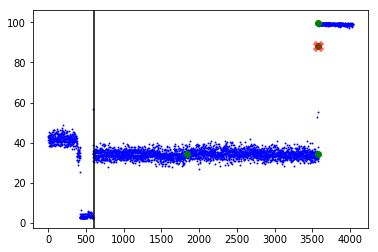




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  []


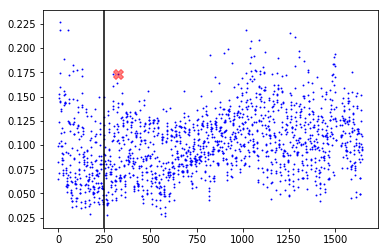




--- exchange-2_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


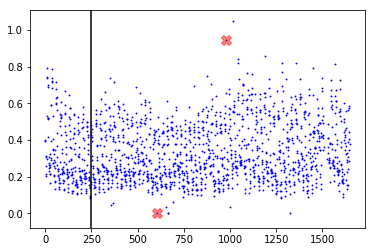




--- exchange-3_cpm_results ---
Corresponding window precision:  0.5
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1044, 1193, 1194, 1195]


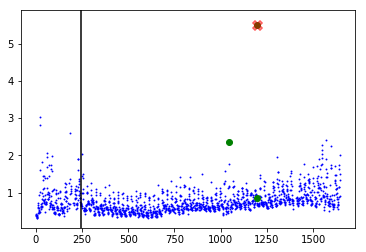




--- ibm-common-stock-closing-prices ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  3
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [242, 272, 303, 364, 607, 668, 698]


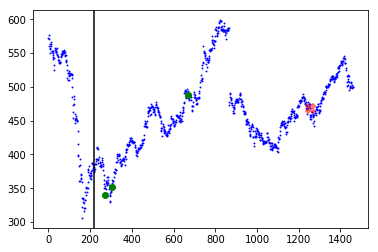




--- rds_cpu_utilization_cc0c53 ---
Corresponding window precision:  0.2
Corresponding window recall:  0.5
Corresponding window false positives:  4
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [690, 978, 1266, 1554, 3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 3110, 3111, 3112, 3113, 3114, 3115, 3116, 3117, 3118, 3119, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3127]


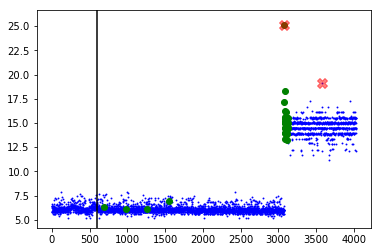




--- artificial_cd_1_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  []


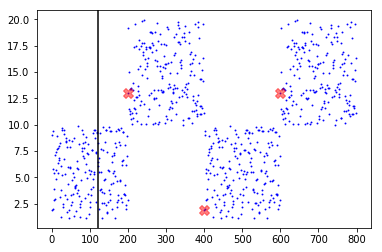




--- nyc_taxi_random_removal ---
Corresponding window precision:  1.0
Corresponding window recall:  0.4
Corresponding window false positives:  0
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  [5954, 5956, 8832, 8833]


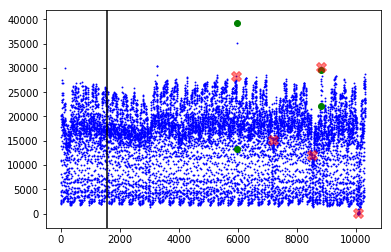




--- artificial_cd_3_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  4


Outlier indices as determined by best window threshold:  []


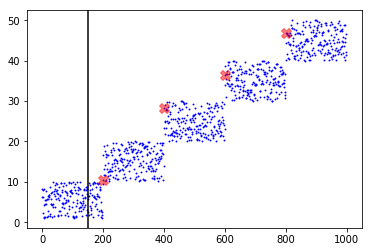

---------weight_fp=0.8, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  25.0
Best window threshold:  1.0
Corresponding window overall precision:  0.3125
Corresponding window overall recall:  0.22727272727272727
Corresponding window overall F score:  0.2631578947368421



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [2518]


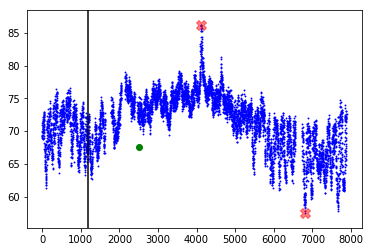




--- ec2_cpu_utilization_ac20cd ---
Corresponding window precision:  0.5
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1843, 3572, 3580, 3581]


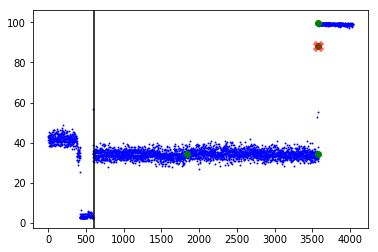




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  []


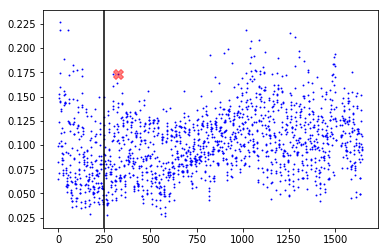




--- exchange-2_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


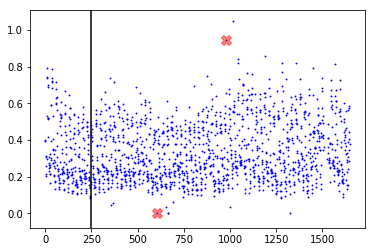




--- exchange-3_cpm_results ---
Corresponding window precision:  0.5
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1044, 1193, 1194, 1195]


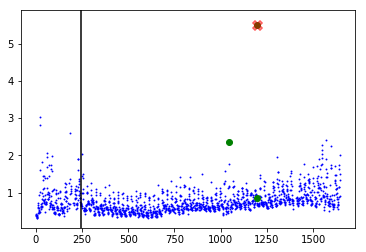




--- ibm-common-stock-closing-prices ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  3
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [242, 272, 303, 364, 607, 668, 698]


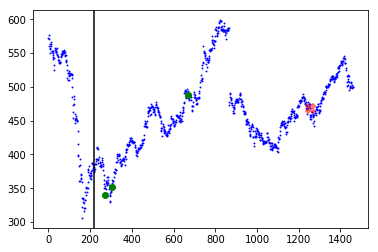




--- rds_cpu_utilization_cc0c53 ---
Corresponding window precision:  0.2
Corresponding window recall:  0.5
Corresponding window false positives:  4
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [690, 978, 1266, 1554, 3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 3110, 3111, 3112, 3113, 3114, 3115, 3116, 3117, 3118, 3119, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3127]


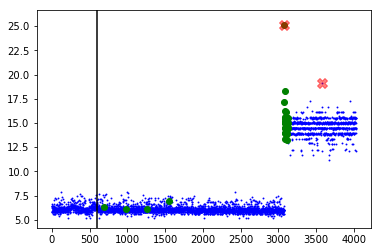




--- artificial_cd_1_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  []


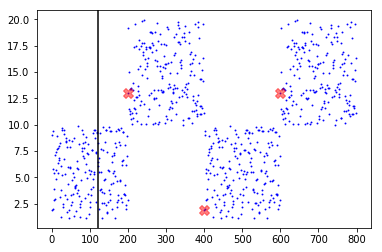




--- nyc_taxi_random_removal ---
Corresponding window precision:  1.0
Corresponding window recall:  0.4
Corresponding window false positives:  0
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  [5954, 5956, 8832, 8833]


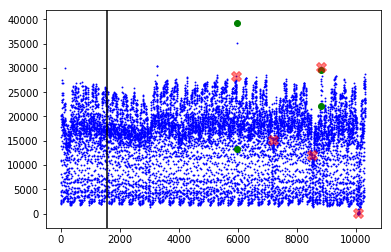




--- artificial_cd_3_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  4


Outlier indices as determined by best window threshold:  []


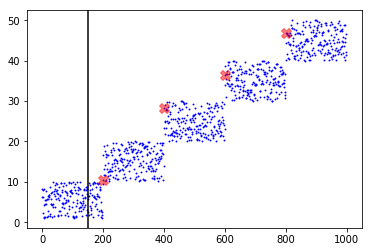

---------weight_fp=0.9, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  26.0
Best window threshold:  1.0
Corresponding window overall precision:  0.3125
Corresponding window overall recall:  0.22727272727272727
Corresponding window overall F score:  0.2631578947368421



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [2518]


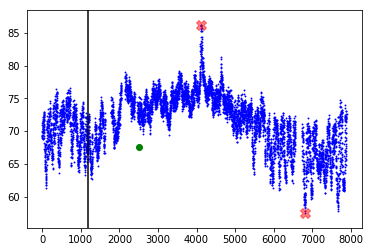




--- ec2_cpu_utilization_ac20cd ---
Corresponding window precision:  0.5
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1843, 3572, 3580, 3581]


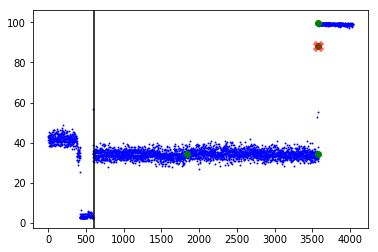




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  []


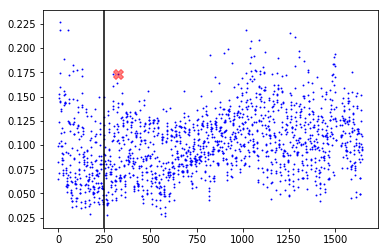




--- exchange-2_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


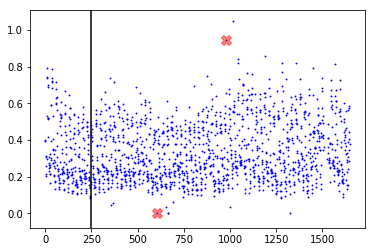




--- exchange-3_cpm_results ---
Corresponding window precision:  0.5
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1044, 1193, 1194, 1195]


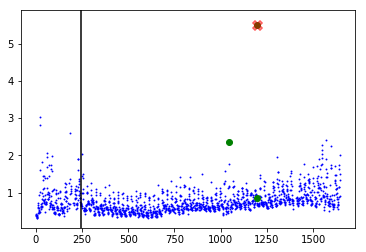




--- ibm-common-stock-closing-prices ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  3
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [242, 272, 303, 364, 607, 668, 698]


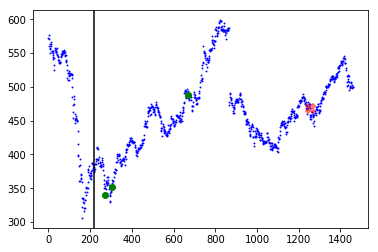




--- rds_cpu_utilization_cc0c53 ---
Corresponding window precision:  0.2
Corresponding window recall:  0.5
Corresponding window false positives:  4
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [690, 978, 1266, 1554, 3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 3110, 3111, 3112, 3113, 3114, 3115, 3116, 3117, 3118, 3119, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3127]


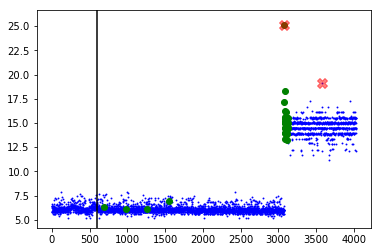




--- artificial_cd_1_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  []


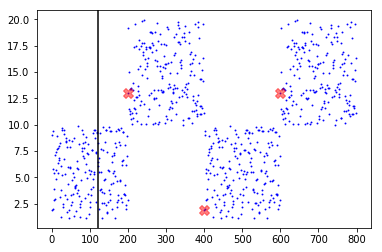




--- nyc_taxi_random_removal ---
Corresponding window precision:  1.0
Corresponding window recall:  0.4
Corresponding window false positives:  0
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  [5954, 5956, 8832, 8833]


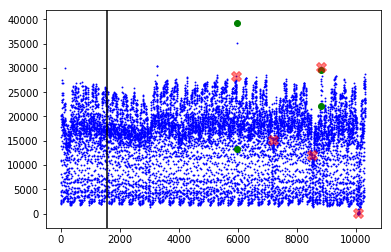




--- artificial_cd_3_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  4


Outlier indices as determined by best window threshold:  []


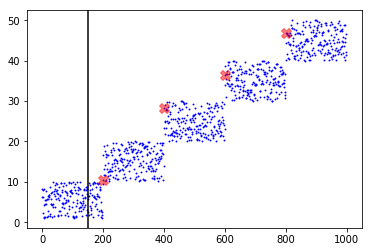

---------weight_fp=1.0, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  27.0
Best window threshold:  1.0
Corresponding window overall precision:  0.3125
Corresponding window overall recall:  0.22727272727272727
Corresponding window overall F score:  0.2631578947368421



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [2518]


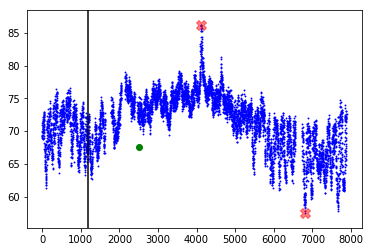




--- ec2_cpu_utilization_ac20cd ---
Corresponding window precision:  0.5
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1843, 3572, 3580, 3581]


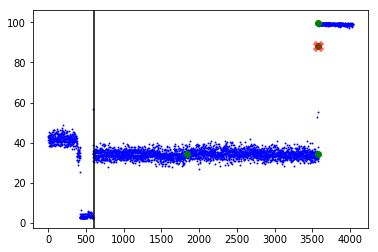




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  []


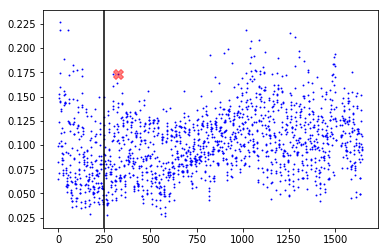




--- exchange-2_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


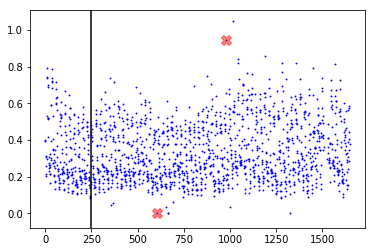




--- exchange-3_cpm_results ---
Corresponding window precision:  0.5
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1044, 1193, 1194, 1195]


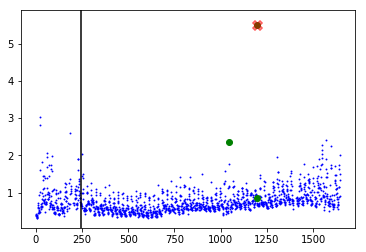




--- ibm-common-stock-closing-prices ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  3
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [242, 272, 303, 364, 607, 668, 698]


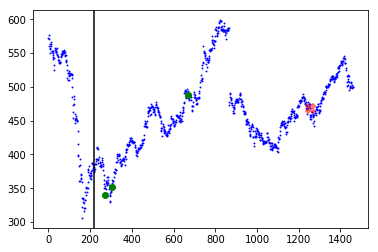




--- rds_cpu_utilization_cc0c53 ---
Corresponding window precision:  0.2
Corresponding window recall:  0.5
Corresponding window false positives:  4
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [690, 978, 1266, 1554, 3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 3110, 3111, 3112, 3113, 3114, 3115, 3116, 3117, 3118, 3119, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3127]


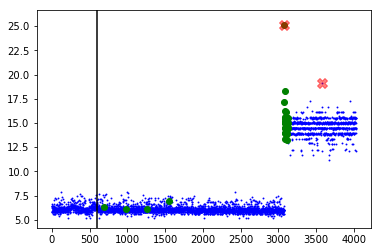




--- artificial_cd_1_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  []


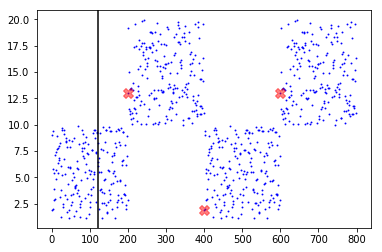




--- nyc_taxi_random_removal ---
Corresponding window precision:  1.0
Corresponding window recall:  0.4
Corresponding window false positives:  0
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  [5954, 5956, 8832, 8833]


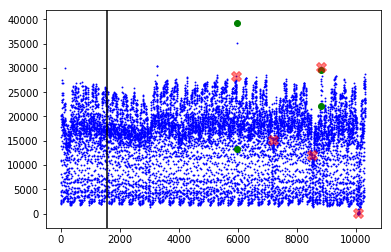




--- artificial_cd_3_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  4


Outlier indices as determined by best window threshold:  []


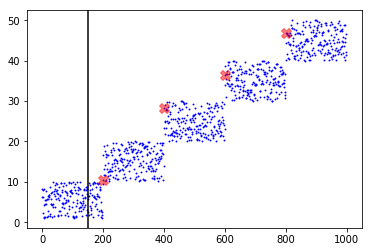

------------
False Positive Weight:  0.1
	 Minimum number of mistakes : 16.9
	 Best window threshold : 0.9986
	 Corresponding window overall precision : 0.12949640287769784
	 Corresponding window overall recall : 0.8181818181818182
	 Corresponding window overall F score : 0.2236024844720497
False Positive Weight:  0.2
	 Minimum number of mistakes : 19.0
	 Best window threshold : 1.0
	 Corresponding window overall precision : 0.3125
	 Corresponding window overall recall : 0.22727272727272727
	 Corresponding window overall F score : 0.2631578947368421
False Positive Weight:  0.3
	 Minimum number of mistakes : 20.0
	 Best window threshold : 1.0
	 Corresponding window overall precision : 0.3125
	 Corresponding window overall recall : 0.22727272727272727
	 Corresponding window overall F score : 0.2631578947368421
False Positive Weight:  0.4
	 Minimum number of mistakes : 21.0
	 Best window threshold : 1.0
	 Corresponding window overall precision : 0.3125
	 Corresponding window overall recal

In [17]:
end_results = {}
for weight_fp in weight_fp_list:  
    print("---------weight_fp=" + str(weight_fp) + ", weight_fn=1----------")
    weight_result = adclasses.pretty_print_results(ad_dict, anomaly_scores_dict, true_outlier_indices_dict, weight_fp=weight_fp, weight_fn=1)
    end_results[weight_fp] = weight_result

print("------------")
adclasses.pretty_print_end_results(end_results)

# Prophet Results

In [18]:
anomaly_scores_dict = {}

for dataset_name in dataset_name_list:
    output_dict_prophet = joblib.load("anomaly_scores" + window_size + "/Prophet/" + dataset_name)
    anomaly_scores_dict[dataset_name] = output_dict_prophet["Anomaly Scores"]

In [19]:
adclasses.precision_recall_curve_info(anomaly_scores_dict, true_outlier_indices_dict)

{0.1: {'precision': 0.11764705882352941, 'recall': 1.0},
 0.2: {'precision': 0.11764705882352941, 'recall': 1.0},
 0.3: {'precision': 0.11764705882352941, 'recall': 1.0},
 0.4: {'precision': 0.11764705882352941, 'recall': 1.0},
 0.5: {'precision': 0.11764705882352941, 'recall': 1.0},
 0.6: {'precision': 0.11764705882352941, 'recall': 1.0},
 0.7: {'precision': 0.11764705882352941, 'recall': 1.0},
 0.8: {'precision': 0.11764705882352941, 'recall': 1.0},
 0.9: {'precision': 0.11764705882352941, 'recall': 1.0},
 1.0: {'precision': 0.0, 'recall': 0.0}}

---------weight_fp=0.1, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  9.3
Best window threshold:  0.9999
Corresponding window overall precision:  0.18867924528301888
Corresponding window overall recall:  0.9090909090909091
Corresponding window overall F score:  0.3125



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.14285714285714285
Corresponding window recall:  1.0
Corresponding window false positives:  12
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1424, 1588, 1590, 1756, 1757, 1758, 1759, 1760, 1761, 1762, 1763, 1764, 1765, 1766, 1777, 1778, 1779, 1780, 1781, 1782, 1783, 1784, 1785, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100, 2101, 2102, 2103, 2112, 2113, 2114, 2115, 2116, 2117, 2118, 2119, 2120, 2121, 2122, 2428, 2429, 2430, 2431, 2432, 2433, 2434, 2435, 2436, 2453, 2454, 2455, 2518, 2930, 2932, 2933, 2934, 2935, 2936, 2937, 2949, 2950, 2951, 2952,

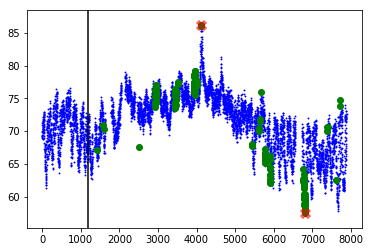




--- ec2_cpu_utilization_ac20cd ---
Corresponding window precision:  0.1111111111111111
Corresponding window recall:  1.0
Corresponding window false positives:  8
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [658, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 866, 873, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 1158, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 

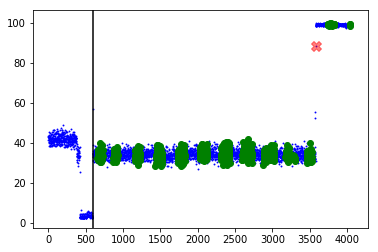




--- exchange-2_cpc_results ---
Corresponding window precision:  0.2
Corresponding window recall:  1.0
Corresponding window false positives:  4
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [317, 325, 559, 583, 585, 607, 655, 1210, 1399, 1486, 1487]


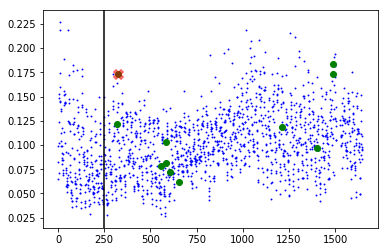




--- exchange-2_cpm_results ---
Corresponding window precision:  0.2222222222222222
Corresponding window recall:  1.0
Corresponding window false positives:  7
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [360, 365, 424, 601, 664, 899, 976, 977, 978, 1016, 1280, 1522, 1523, 1524]


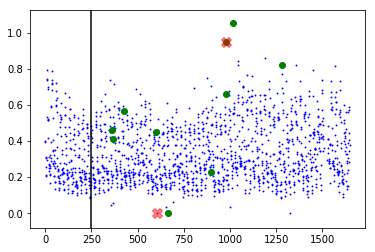




--- exchange-3_cpm_results ---
Corresponding window precision:  0.16666666666666666
Corresponding window recall:  1.0
Corresponding window false positives:  5
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [479, 480, 503, 504, 527, 599, 600, 623, 624, 836, 887, 911, 1031, 1044, 1079, 1103, 1104, 1193, 1194, 1405]


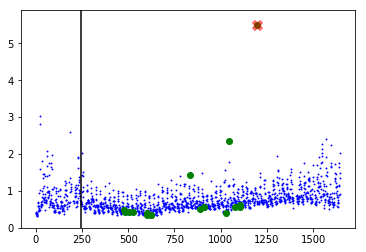




--- ibm-common-stock-closing-prices ---
Corresponding window precision:  0.125
Corresponding window recall:  1.0
Corresponding window false positives:  7
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 509, 510, 511, 519, 520, 521, 522, 523, 524, 525, 526, 527, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 59

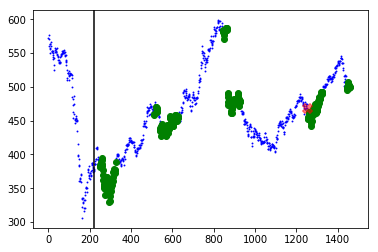




--- rds_cpu_utilization_cc0c53 ---
Corresponding window precision:  0.15384615384615385
Corresponding window recall:  1.0
Corresponding window false positives:  11
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [992, 1006, 1014, 1235, 1309, 1534, 1880, 2082, 2426, 2650, 3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 3110, 3111, 3112, 3113, 3114, 3115, 3116, 3117, 3118, 3119, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3127, 3321, 3463, 3580, 3669, 4024]


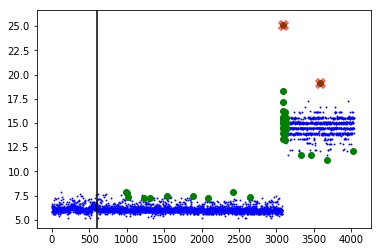




--- artificial_cd_1_random_removal ---
Corresponding window precision:  0.5
Corresponding window recall:  1.0
Corresponding window false positives:  3
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [201, 217, 219, 220, 400, 402, 406, 407, 408, 411, 421, 423, 425, 427, 601, 617, 619, 620]


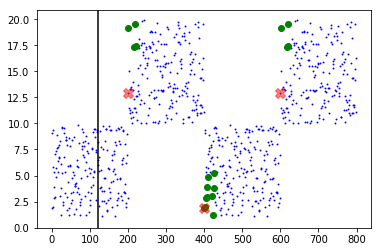




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.2
Corresponding window recall:  0.6
Corresponding window false positives:  12
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [1584, 1585, 1586, 1587, 1588, 1589, 1590, 1591, 1592, 1924, 1925, 1926, 1927, 2595, 2596, 2597, 2598, 2599, 2600, 2896, 3600, 3601, 3602, 3603, 3604, 3605, 3606, 4226, 4271, 4272, 4273, 4274, 4275, 4276, 4277, 4278, 4279, 4613, 5280, 5281, 5282, 5283, 5284, 5285, 5286, 5617, 5618, 5619, 5620, 5621, 5906, 5907, 5908, 5909, 5910, 5911, 5912, 5954, 5955, 6288, 6289, 6290, 6291, 6292, 6293, 6294, 6295, 6623, 6624, 6625, 6626, 6627, 8308, 8309, 8310, 8833, 8834, 8835, 8836, 8837, 8838, 8839, 8840, 8841, 8848, 8849, 8850, 8851, 8872, 8873, 8874, 9989, 10070, 10071, 10072, 10073, 10074, 10075, 10076, 10077, 10078, 10079, 10080]


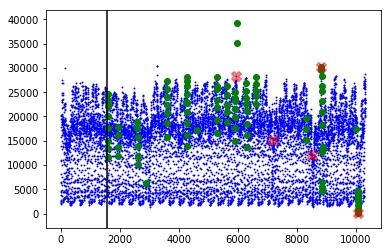




--- artificial_cd_3_random_removal ---
Corresponding window precision:  0.5
Corresponding window recall:  1.0
Corresponding window false positives:  4
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [201, 203, 208, 210, 211, 213, 214, 215, 226, 227, 400, 404, 406, 408, 409, 411, 412, 415, 417, 420, 421, 426, 600, 601, 605, 606, 608, 609, 611, 612, 613, 616, 618, 621, 623, 626, 627, 800, 803, 805, 807, 810, 811, 814, 817, 818, 819, 820, 821, 827]


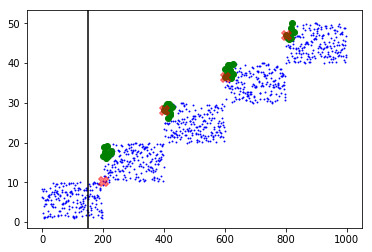

---------weight_fp=0.2, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  16.6
Best window threshold:  0.9999
Corresponding window overall precision:  0.18867924528301888
Corresponding window overall recall:  0.9090909090909091
Corresponding window overall F score:  0.3125



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.14285714285714285
Corresponding window recall:  1.0
Corresponding window false positives:  12
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1424, 1588, 1590, 1756, 1757, 1758, 1759, 1760, 1761, 1762, 1763, 1764, 1765, 1766, 1777, 1778, 1779, 1780, 1781, 1782, 1783, 1784, 1785, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100, 2101, 2102, 2103, 2112, 2113, 2114, 2115, 2116, 2117, 2118, 2119, 2120, 2121, 2122, 2428, 2429, 2430, 2431, 2432, 2433, 2434, 2435, 2436, 2453, 2454, 2455, 2518, 2930, 2932, 2933, 2934, 2935, 2936, 2937, 2949, 2950, 2951, 2952

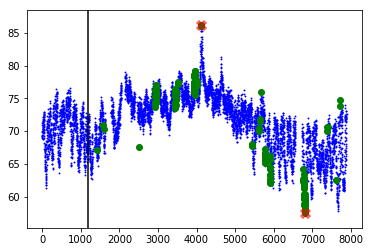




--- ec2_cpu_utilization_ac20cd ---
Corresponding window precision:  0.1111111111111111
Corresponding window recall:  1.0
Corresponding window false positives:  8
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [658, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 866, 873, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 1158, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 

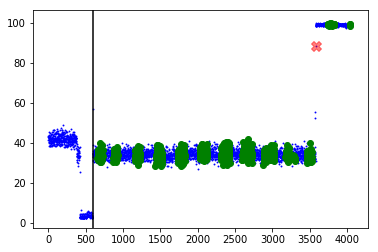




--- exchange-2_cpc_results ---
Corresponding window precision:  0.2
Corresponding window recall:  1.0
Corresponding window false positives:  4
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [317, 325, 559, 583, 585, 607, 655, 1210, 1399, 1486, 1487]


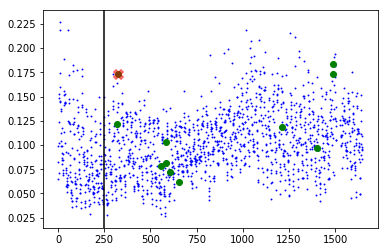




--- exchange-2_cpm_results ---
Corresponding window precision:  0.2222222222222222
Corresponding window recall:  1.0
Corresponding window false positives:  7
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [360, 365, 424, 601, 664, 899, 976, 977, 978, 1016, 1280, 1522, 1523, 1524]


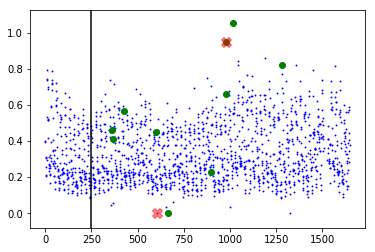




--- exchange-3_cpm_results ---
Corresponding window precision:  0.16666666666666666
Corresponding window recall:  1.0
Corresponding window false positives:  5
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [479, 480, 503, 504, 527, 599, 600, 623, 624, 836, 887, 911, 1031, 1044, 1079, 1103, 1104, 1193, 1194, 1405]


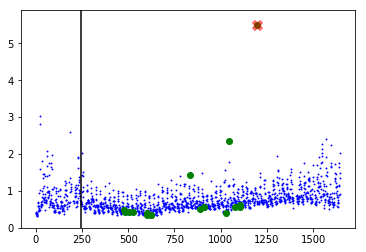




--- ibm-common-stock-closing-prices ---
Corresponding window precision:  0.125
Corresponding window recall:  1.0
Corresponding window false positives:  7
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 509, 510, 511, 519, 520, 521, 522, 523, 524, 525, 526, 527, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 59

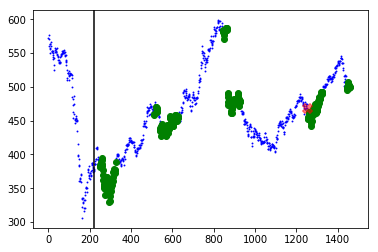




--- rds_cpu_utilization_cc0c53 ---
Corresponding window precision:  0.15384615384615385
Corresponding window recall:  1.0
Corresponding window false positives:  11
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [992, 1006, 1014, 1235, 1309, 1534, 1880, 2082, 2426, 2650, 3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 3110, 3111, 3112, 3113, 3114, 3115, 3116, 3117, 3118, 3119, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3127, 3321, 3463, 3580, 3669, 4024]


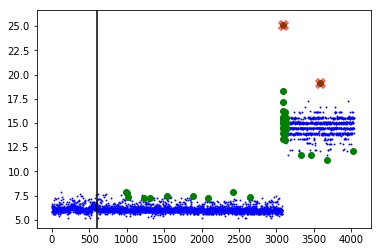




--- artificial_cd_1_random_removal ---
Corresponding window precision:  0.5
Corresponding window recall:  1.0
Corresponding window false positives:  3
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [201, 217, 219, 220, 400, 402, 406, 407, 408, 411, 421, 423, 425, 427, 601, 617, 619, 620]


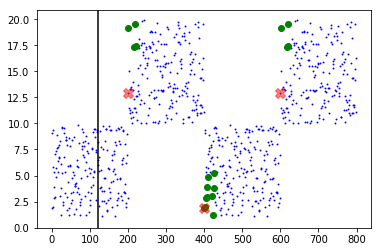




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.2
Corresponding window recall:  0.6
Corresponding window false positives:  12
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [1584, 1585, 1586, 1587, 1588, 1589, 1590, 1591, 1592, 1924, 1925, 1926, 1927, 2595, 2596, 2597, 2598, 2599, 2600, 2896, 3600, 3601, 3602, 3603, 3604, 3605, 3606, 4226, 4271, 4272, 4273, 4274, 4275, 4276, 4277, 4278, 4279, 4613, 5280, 5281, 5282, 5283, 5284, 5285, 5286, 5617, 5618, 5619, 5620, 5621, 5906, 5907, 5908, 5909, 5910, 5911, 5912, 5954, 5955, 6288, 6289, 6290, 6291, 6292, 6293, 6294, 6295, 6623, 6624, 6625, 6626, 6627, 8308, 8309, 8310, 8833, 8834, 8835, 8836, 8837, 8838, 8839, 8840, 8841, 8848, 8849, 8850, 8851, 8872, 8873, 8874, 9989, 10070, 10071, 10072, 10073, 10074, 10075, 10076, 10077, 10078, 10079, 10080]


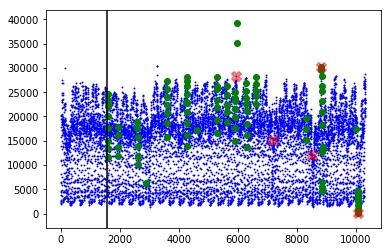




--- artificial_cd_3_random_removal ---
Corresponding window precision:  0.5
Corresponding window recall:  1.0
Corresponding window false positives:  4
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [201, 203, 208, 210, 211, 213, 214, 215, 226, 227, 400, 404, 406, 408, 409, 411, 412, 415, 417, 420, 421, 426, 600, 601, 605, 606, 608, 609, 611, 612, 613, 616, 618, 621, 623, 626, 627, 800, 803, 805, 807, 810, 811, 814, 817, 818, 819, 820, 821, 827]


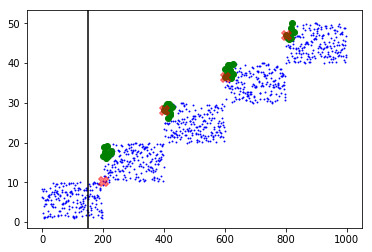

---------weight_fp=0.3, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  22.3
Best window threshold:  1.0
Corresponding window overall precision:  0.13043478260869565
Corresponding window overall recall:  0.13636363636363635
Corresponding window overall F score:  0.1333333333333333



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


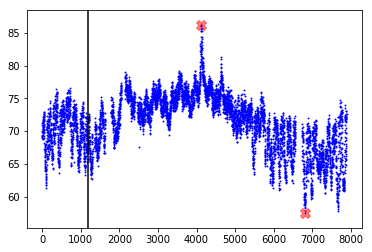




--- ec2_cpu_utilization_ac20cd ---
Corresponding window precision:  0.125
Corresponding window recall:  1.0
Corresponding window false positives:  7
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [889, 890, 891, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 1174, 1175, 1177, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1459, 1461, 1462, 1463, 1464, 1465, 1467, 1468, 1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 1480, 1481, 1482, 1483, 1484, 1485, 1486, 1487, 1488, 1489, 1490, 1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 1500,

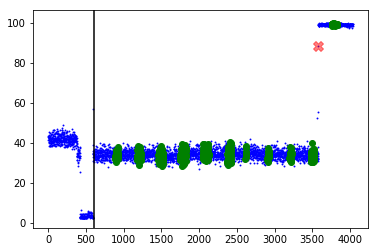




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  []


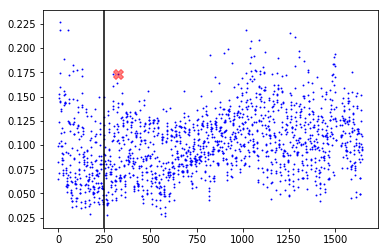




--- exchange-2_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


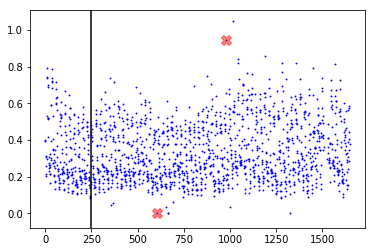




--- exchange-3_cpm_results ---
Corresponding window precision:  1.0
Corresponding window recall:  1.0
Corresponding window false positives:  0
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1193, 1194]


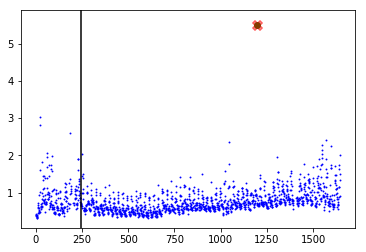




--- ibm-common-stock-closing-prices ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  4
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927]


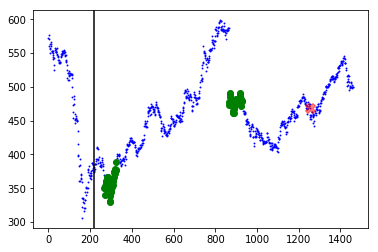




--- rds_cpu_utilization_cc0c53 ---
Corresponding window precision:  1.0
Corresponding window recall:  0.5
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 3110, 3111, 3112, 3113, 3114, 3115, 3116, 3117, 3118, 3119, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3127]


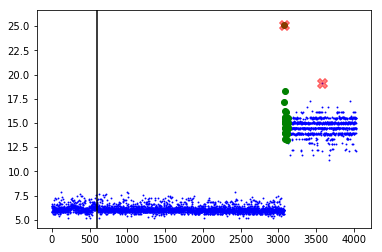




--- artificial_cd_1_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  []


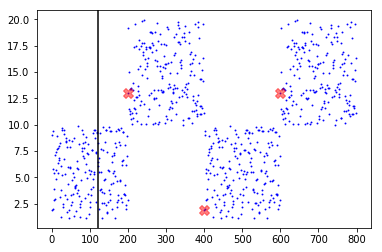




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  5


Outlier indices as determined by best window threshold:  []


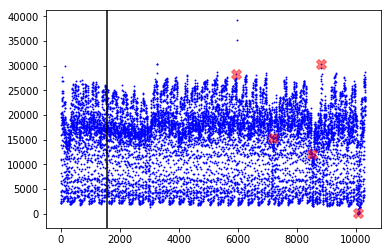




--- artificial_cd_3_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  4


Outlier indices as determined by best window threshold:  []


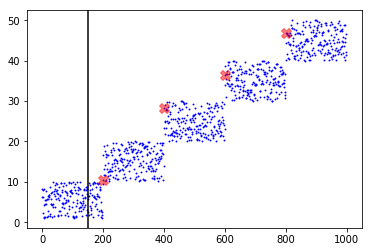

---------weight_fp=0.4, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  23.4
Best window threshold:  1.0
Corresponding window overall precision:  0.13043478260869565
Corresponding window overall recall:  0.13636363636363635
Corresponding window overall F score:  0.1333333333333333



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


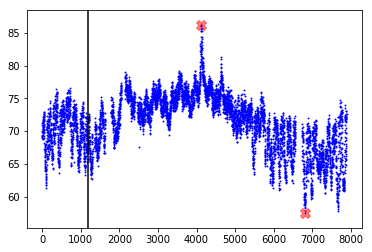




--- ec2_cpu_utilization_ac20cd ---
Corresponding window precision:  0.125
Corresponding window recall:  1.0
Corresponding window false positives:  7
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [889, 890, 891, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 1174, 1175, 1177, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1459, 1461, 1462, 1463, 1464, 1465, 1467, 1468, 1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 1480, 1481, 1482, 1483, 1484, 1485, 1486, 1487, 1488, 1489, 1490, 1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 1500,

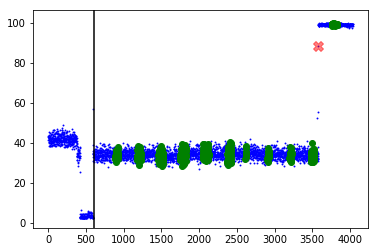




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  []


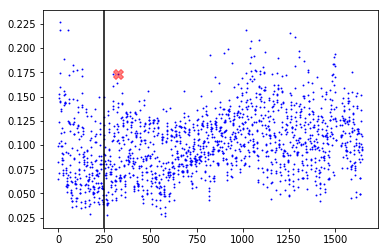




--- exchange-2_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


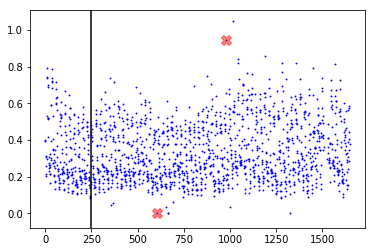




--- exchange-3_cpm_results ---
Corresponding window precision:  1.0
Corresponding window recall:  1.0
Corresponding window false positives:  0
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1193, 1194]


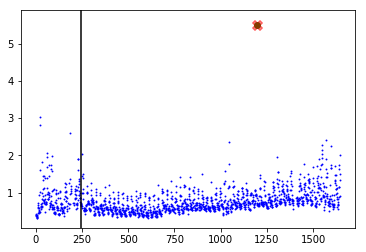




--- ibm-common-stock-closing-prices ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  4
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927]


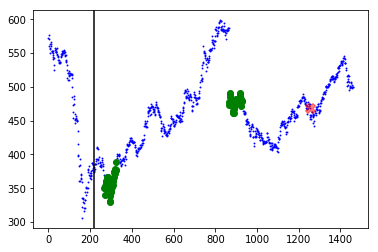




--- rds_cpu_utilization_cc0c53 ---
Corresponding window precision:  1.0
Corresponding window recall:  0.5
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 3110, 3111, 3112, 3113, 3114, 3115, 3116, 3117, 3118, 3119, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3127]


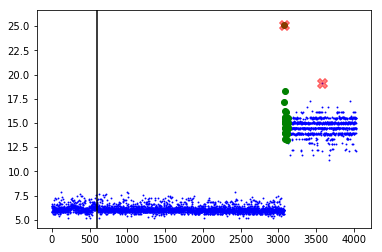




--- artificial_cd_1_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  []


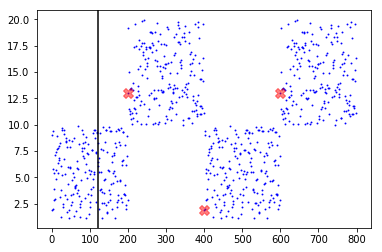




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  5


Outlier indices as determined by best window threshold:  []


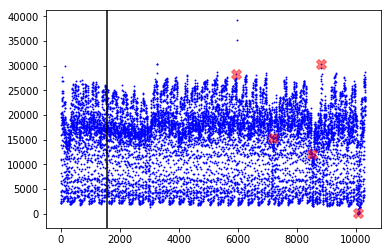




--- artificial_cd_3_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  4


Outlier indices as determined by best window threshold:  []


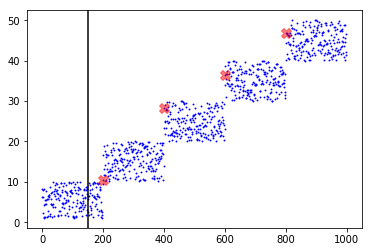

---------weight_fp=0.5, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  24.5
Best window threshold:  1.0
Corresponding window overall precision:  0.13043478260869565
Corresponding window overall recall:  0.13636363636363635
Corresponding window overall F score:  0.1333333333333333



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


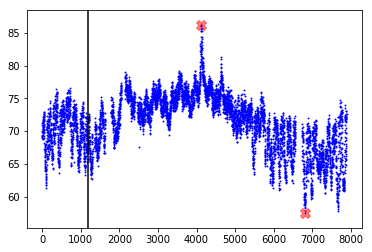




--- ec2_cpu_utilization_ac20cd ---
Corresponding window precision:  0.125
Corresponding window recall:  1.0
Corresponding window false positives:  7
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [889, 890, 891, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 1174, 1175, 1177, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1459, 1461, 1462, 1463, 1464, 1465, 1467, 1468, 1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 1480, 1481, 1482, 1483, 1484, 1485, 1486, 1487, 1488, 1489, 1490, 1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 1500,

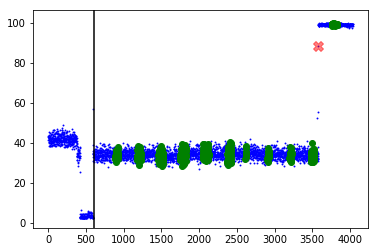




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  []


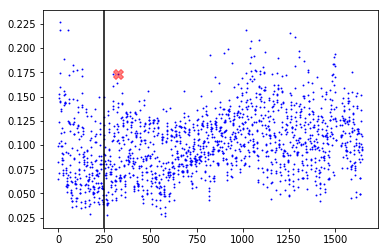




--- exchange-2_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


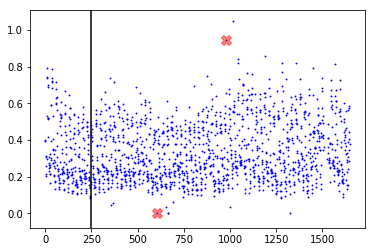




--- exchange-3_cpm_results ---
Corresponding window precision:  1.0
Corresponding window recall:  1.0
Corresponding window false positives:  0
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1193, 1194]


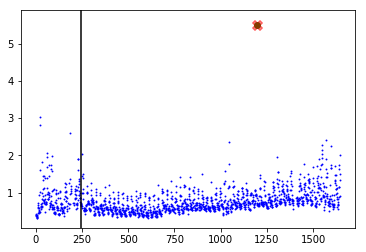




--- ibm-common-stock-closing-prices ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  4
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927]


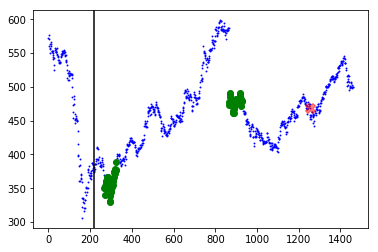




--- rds_cpu_utilization_cc0c53 ---
Corresponding window precision:  1.0
Corresponding window recall:  0.5
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 3110, 3111, 3112, 3113, 3114, 3115, 3116, 3117, 3118, 3119, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3127]


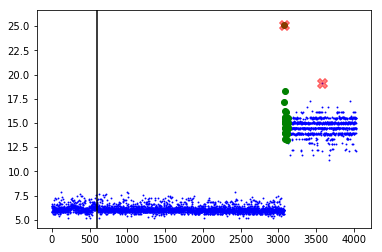




--- artificial_cd_1_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  []


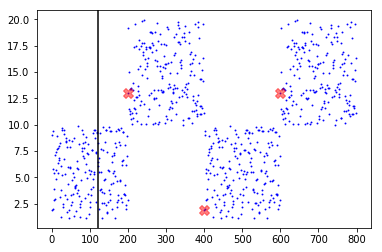




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  5


Outlier indices as determined by best window threshold:  []


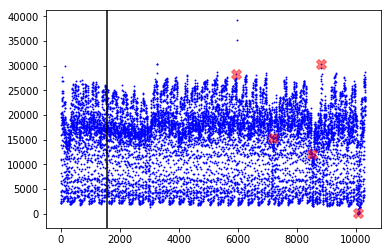




--- artificial_cd_3_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  4


Outlier indices as determined by best window threshold:  []


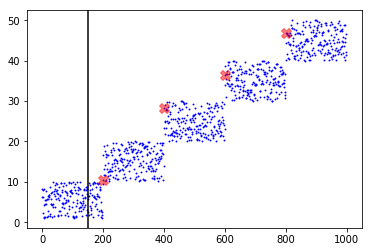

---------weight_fp=0.6, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  25.6
Best window threshold:  1.0
Corresponding window overall precision:  0.13043478260869565
Corresponding window overall recall:  0.13636363636363635
Corresponding window overall F score:  0.1333333333333333



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


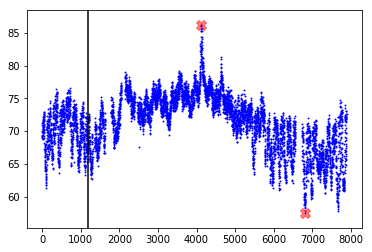




--- ec2_cpu_utilization_ac20cd ---
Corresponding window precision:  0.125
Corresponding window recall:  1.0
Corresponding window false positives:  7
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [889, 890, 891, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 1174, 1175, 1177, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1459, 1461, 1462, 1463, 1464, 1465, 1467, 1468, 1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 1480, 1481, 1482, 1483, 1484, 1485, 1486, 1487, 1488, 1489, 1490, 1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 1500,

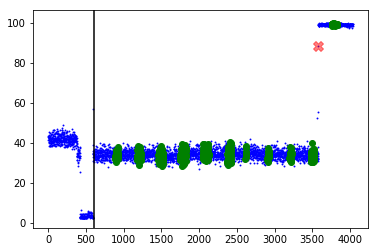




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  []


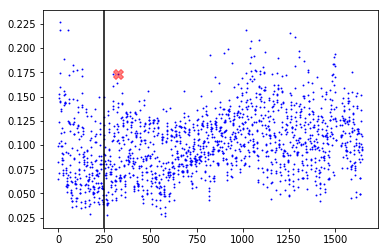




--- exchange-2_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


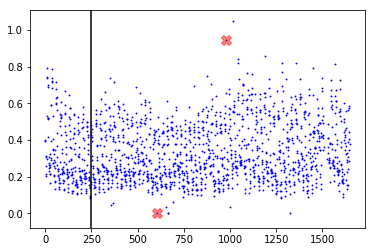




--- exchange-3_cpm_results ---
Corresponding window precision:  1.0
Corresponding window recall:  1.0
Corresponding window false positives:  0
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1193, 1194]


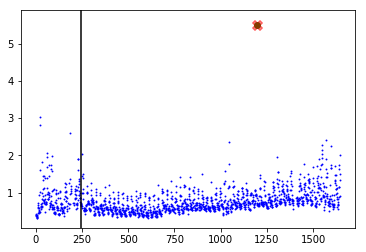




--- ibm-common-stock-closing-prices ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  4
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927]


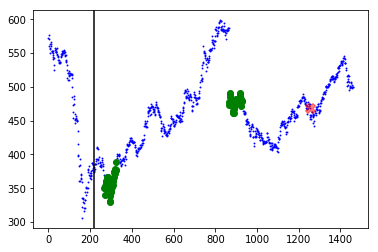




--- rds_cpu_utilization_cc0c53 ---
Corresponding window precision:  1.0
Corresponding window recall:  0.5
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 3110, 3111, 3112, 3113, 3114, 3115, 3116, 3117, 3118, 3119, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3127]


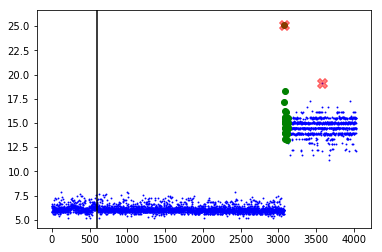




--- artificial_cd_1_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  []


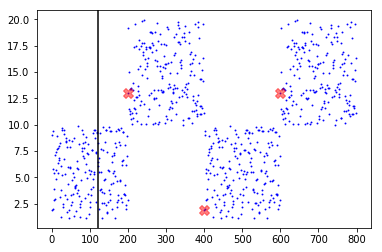




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  5


Outlier indices as determined by best window threshold:  []


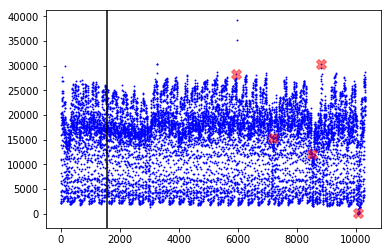




--- artificial_cd_3_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  4


Outlier indices as determined by best window threshold:  []


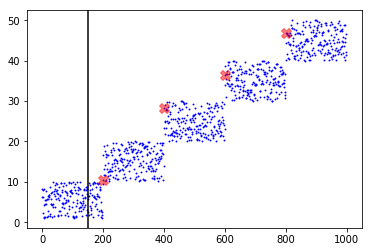

---------weight_fp=0.7, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  26.7
Best window threshold:  1.0
Corresponding window overall precision:  0.13043478260869565
Corresponding window overall recall:  0.13636363636363635
Corresponding window overall F score:  0.1333333333333333



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


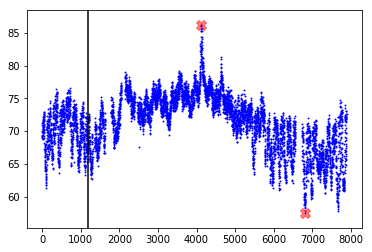




--- ec2_cpu_utilization_ac20cd ---
Corresponding window precision:  0.125
Corresponding window recall:  1.0
Corresponding window false positives:  7
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [889, 890, 891, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 1174, 1175, 1177, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1459, 1461, 1462, 1463, 1464, 1465, 1467, 1468, 1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 1480, 1481, 1482, 1483, 1484, 1485, 1486, 1487, 1488, 1489, 1490, 1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 1500,

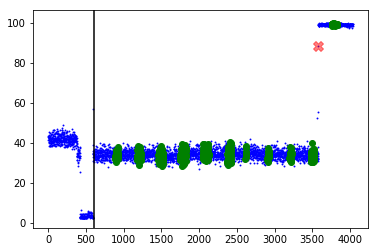




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  []


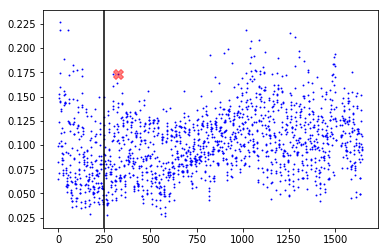




--- exchange-2_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


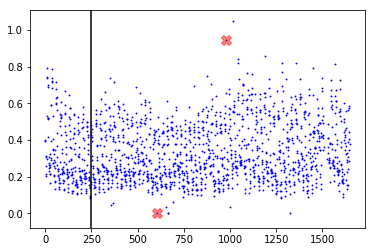




--- exchange-3_cpm_results ---
Corresponding window precision:  1.0
Corresponding window recall:  1.0
Corresponding window false positives:  0
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1193, 1194]


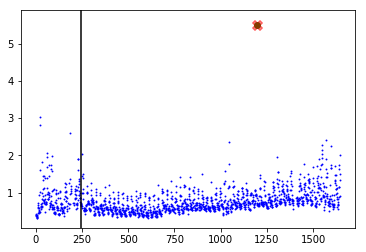




--- ibm-common-stock-closing-prices ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  4
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927]


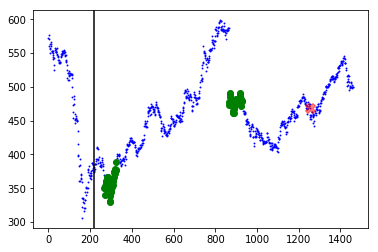




--- rds_cpu_utilization_cc0c53 ---
Corresponding window precision:  1.0
Corresponding window recall:  0.5
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 3110, 3111, 3112, 3113, 3114, 3115, 3116, 3117, 3118, 3119, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3127]


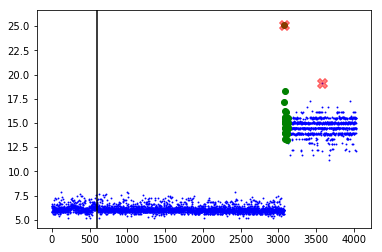




--- artificial_cd_1_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  []


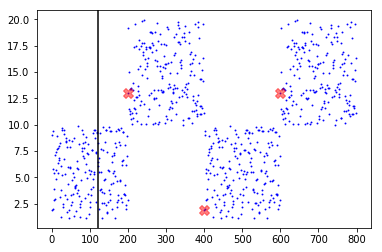




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  5


Outlier indices as determined by best window threshold:  []


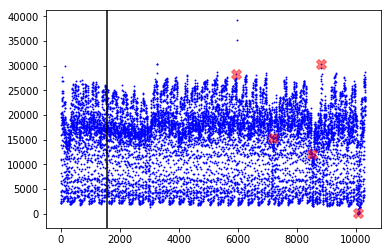




--- artificial_cd_3_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  4


Outlier indices as determined by best window threshold:  []


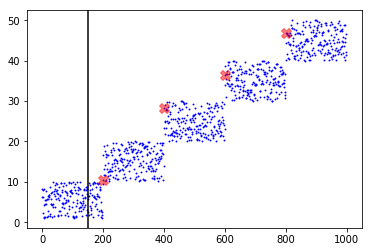

---------weight_fp=0.8, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  27.8
Best window threshold:  1.0
Corresponding window overall precision:  0.13043478260869565
Corresponding window overall recall:  0.13636363636363635
Corresponding window overall F score:  0.1333333333333333



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


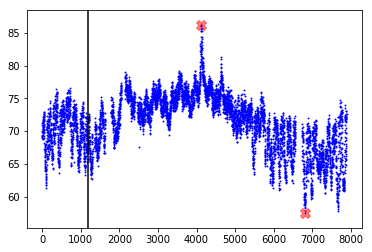




--- ec2_cpu_utilization_ac20cd ---
Corresponding window precision:  0.125
Corresponding window recall:  1.0
Corresponding window false positives:  7
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [889, 890, 891, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 1174, 1175, 1177, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1459, 1461, 1462, 1463, 1464, 1465, 1467, 1468, 1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 1480, 1481, 1482, 1483, 1484, 1485, 1486, 1487, 1488, 1489, 1490, 1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 1500,

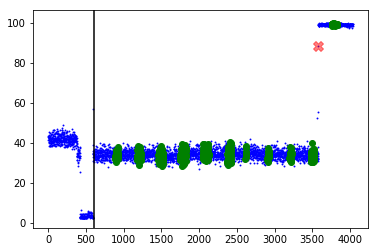




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  []


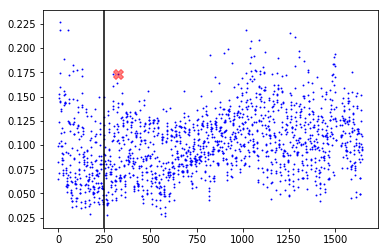




--- exchange-2_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


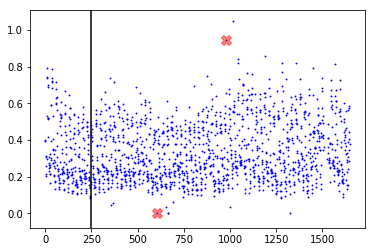




--- exchange-3_cpm_results ---
Corresponding window precision:  1.0
Corresponding window recall:  1.0
Corresponding window false positives:  0
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1193, 1194]


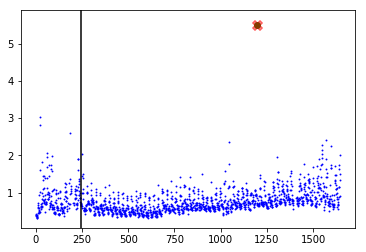




--- ibm-common-stock-closing-prices ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  4
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927]


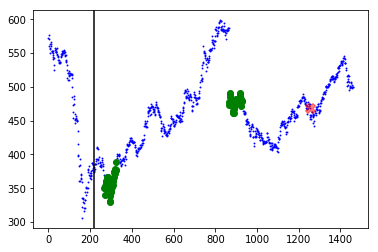




--- rds_cpu_utilization_cc0c53 ---
Corresponding window precision:  1.0
Corresponding window recall:  0.5
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 3110, 3111, 3112, 3113, 3114, 3115, 3116, 3117, 3118, 3119, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3127]


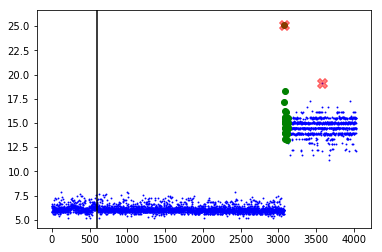




--- artificial_cd_1_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  []


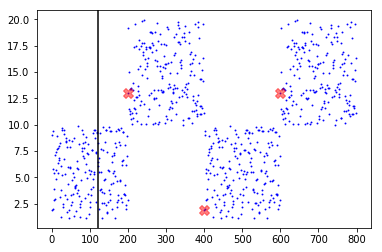




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  5


Outlier indices as determined by best window threshold:  []


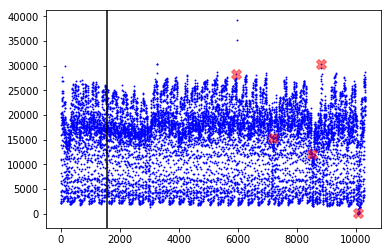




--- artificial_cd_3_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  4


Outlier indices as determined by best window threshold:  []


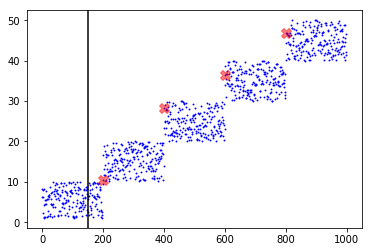

---------weight_fp=0.9, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  28.9
Best window threshold:  1.0
Corresponding window overall precision:  0.13043478260869565
Corresponding window overall recall:  0.13636363636363635
Corresponding window overall F score:  0.1333333333333333



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


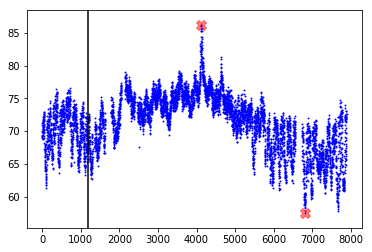




--- ec2_cpu_utilization_ac20cd ---
Corresponding window precision:  0.125
Corresponding window recall:  1.0
Corresponding window false positives:  7
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [889, 890, 891, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 1174, 1175, 1177, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1459, 1461, 1462, 1463, 1464, 1465, 1467, 1468, 1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 1480, 1481, 1482, 1483, 1484, 1485, 1486, 1487, 1488, 1489, 1490, 1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 1500,

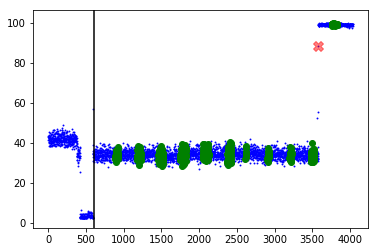




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  []


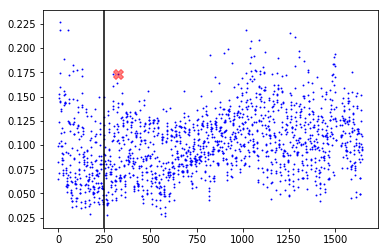




--- exchange-2_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


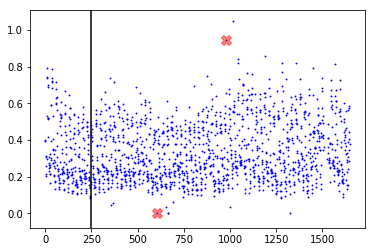




--- exchange-3_cpm_results ---
Corresponding window precision:  1.0
Corresponding window recall:  1.0
Corresponding window false positives:  0
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1193, 1194]


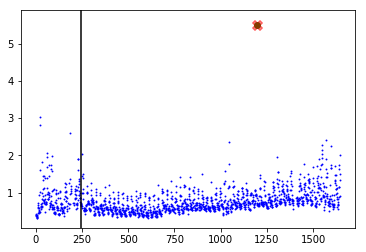




--- ibm-common-stock-closing-prices ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  4
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927]


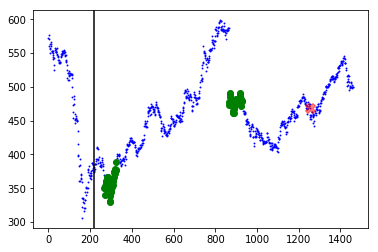




--- rds_cpu_utilization_cc0c53 ---
Corresponding window precision:  1.0
Corresponding window recall:  0.5
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 3110, 3111, 3112, 3113, 3114, 3115, 3116, 3117, 3118, 3119, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3127]


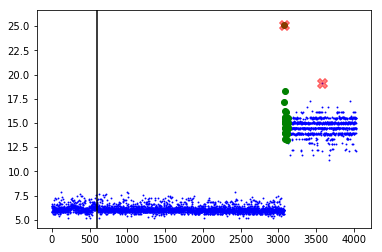




--- artificial_cd_1_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  []


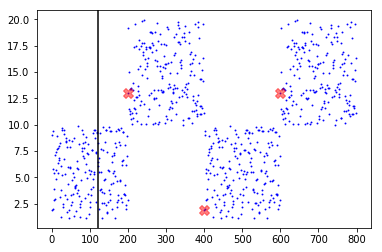




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  5


Outlier indices as determined by best window threshold:  []


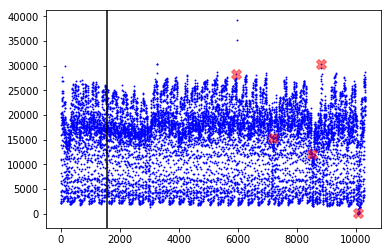




--- artificial_cd_3_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  4


Outlier indices as determined by best window threshold:  []


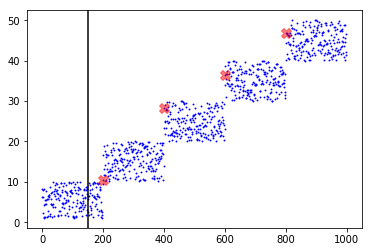

---------weight_fp=1.0, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  30.0
Best window threshold:  1.0
Corresponding window overall precision:  0.13043478260869565
Corresponding window overall recall:  0.13636363636363635
Corresponding window overall F score:  0.1333333333333333



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


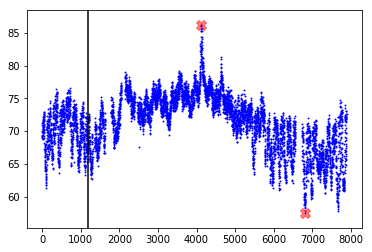




--- ec2_cpu_utilization_ac20cd ---
Corresponding window precision:  0.125
Corresponding window recall:  1.0
Corresponding window false positives:  7
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [889, 890, 891, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 1174, 1175, 1177, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1459, 1461, 1462, 1463, 1464, 1465, 1467, 1468, 1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 1480, 1481, 1482, 1483, 1484, 1485, 1486, 1487, 1488, 1489, 1490, 1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 1500,

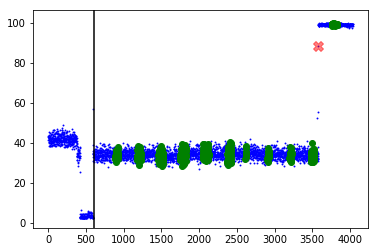




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  []


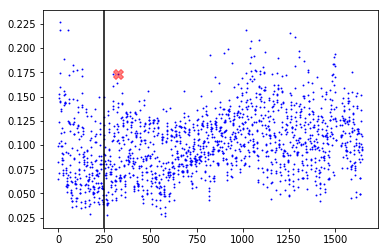




--- exchange-2_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


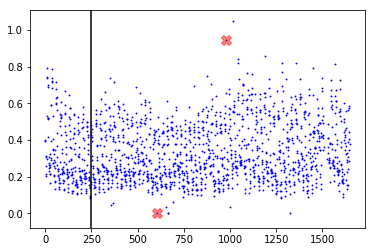




--- exchange-3_cpm_results ---
Corresponding window precision:  1.0
Corresponding window recall:  1.0
Corresponding window false positives:  0
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1193, 1194]


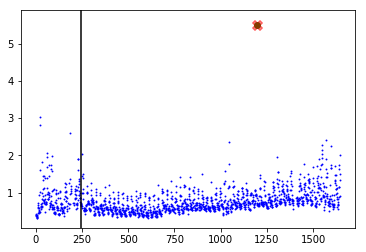




--- ibm-common-stock-closing-prices ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  4
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927]


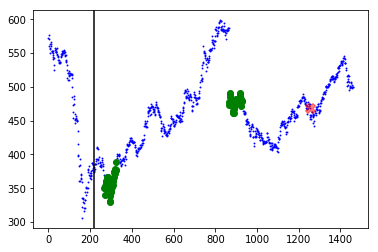




--- rds_cpu_utilization_cc0c53 ---
Corresponding window precision:  1.0
Corresponding window recall:  0.5
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 3110, 3111, 3112, 3113, 3114, 3115, 3116, 3117, 3118, 3119, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3127]


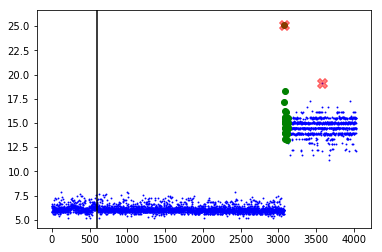




--- artificial_cd_1_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  []


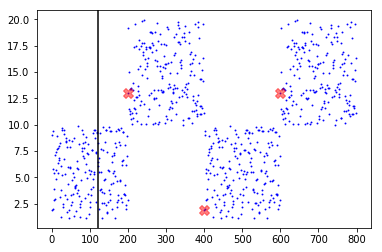




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  5


Outlier indices as determined by best window threshold:  []


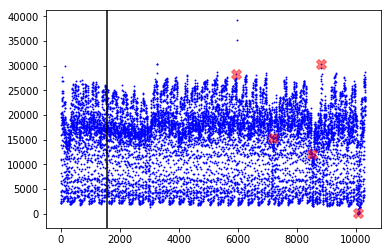




--- artificial_cd_3_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  4


Outlier indices as determined by best window threshold:  []


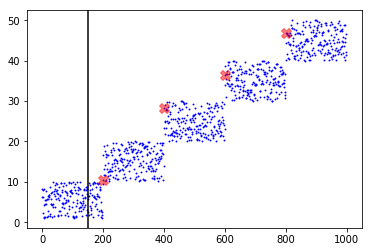

------------
False Positive Weight:  0.1
	 Minimum number of mistakes : 9.3
	 Best window threshold : 0.9999
	 Corresponding window overall precision : 0.18867924528301888
	 Corresponding window overall recall : 0.9090909090909091
	 Corresponding window overall F score : 0.3125
False Positive Weight:  0.2
	 Minimum number of mistakes : 16.6
	 Best window threshold : 0.9999
	 Corresponding window overall precision : 0.18867924528301888
	 Corresponding window overall recall : 0.9090909090909091
	 Corresponding window overall F score : 0.3125
False Positive Weight:  0.3
	 Minimum number of mistakes : 22.3
	 Best window threshold : 1.0
	 Corresponding window overall precision : 0.13043478260869565
	 Corresponding window overall recall : 0.13636363636363635
	 Corresponding window overall F score : 0.1333333333333333
False Positive Weight:  0.4
	 Minimum number of mistakes : 23.4
	 Best window threshold : 1.0
	 Corresponding window overall precision : 0.13043478260869565
	 Corresponding wind

In [20]:
end_results = {}
for weight_fp in weight_fp_list:  
    print("---------weight_fp=" + str(weight_fp) + ", weight_fn=1----------")
    weight_result = adclasses.pretty_print_results(ad_dict, anomaly_scores_dict, true_outlier_indices_dict, weight_fp=weight_fp, weight_fn=1)
    end_results[weight_fp] = weight_result

print("------------")
adclasses.pretty_print_end_results(end_results)

# GLM Results

In [15]:
anomaly_scores_dict = {}

for dataset_name in dataset_name_list:
    output_dict_glm = joblib.load("anomaly_scores" + window_size + "/GLM/" + dataset_name)
    anomaly_scores_dict[dataset_name] = output_dict_glm["Anomaly Scores"]

In [16]:
adclasses.precision_recall_curve_info(anomaly_scores_dict, true_outlier_indices_dict)

{0.1: {'precision': 0.1111111111111111, 'recall': 1.0},
 0.2: {'precision': 0.1111111111111111, 'recall': 1.0},
 0.3: {'precision': 0.1111111111111111, 'recall': 1.0},
 0.4: {'precision': 0.1111111111111111, 'recall': 1.0},
 0.5: {'precision': 0.1111111111111111, 'recall': 1.0},
 0.6: {'precision': 0.1111111111111111, 'recall': 1.0},
 0.7: {'precision': 0.1111111111111111, 'recall': 1.0},
 0.8: {'precision': 0.1111111111111111, 'recall': 1.0},
 0.9: {'precision': 0.11428571428571428, 'recall': 1.0},
 1.0: {'precision': 0.0, 'recall': 0.0}}

---------weight_fp=0.1, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  9.8
Best window threshold:  0.9987
Corresponding window overall precision:  0.171875
Corresponding window overall recall:  1.0
Corresponding window overall F score:  0.29333333333333333



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.125
Corresponding window recall:  1.0
Corresponding window false positives:  14
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1420, 1421, 1422, 1563, 1858, 1859, 1860, 1861, 1863, 2202, 2204, 2226, 2262, 2518, 3068, 3070, 3071, 3331, 3334, 3555, 3557, 3558, 3932, 3933, 3936, 3938, 3942, 4100, 4101, 4102, 4104, 4105, 4106, 4107, 4419, 4421, 4626, 4627, 4628, 4629, 4630, 4636, 4947, 4948, 5079, 5438, 5439, 5440, 5441, 5442, 5443, 5444, 5446, 5447, 5448, 5449, 5657, 5658, 5659, 5769, 5770, 5771, 5772, 5773, 5774, 5775, 5776, 5778, 5780, 5783, 6139, 6144, 6145, 6146, 61

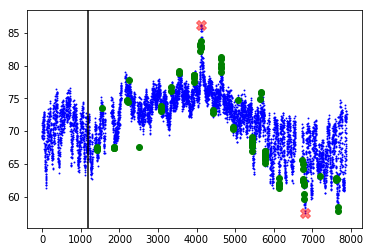




--- ec2_cpu_utilization_ac20cd ---
Corresponding window precision:  0.125
Corresponding window recall:  1.0
Corresponding window false positives:  7
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [873, 875, 883, 884, 885, 886, 887, 889, 895, 991, 992, 1003, 1004, 1171, 1172, 1173, 1174, 1175, 1178, 1197, 1279, 1420, 1432, 1449, 1459, 1467, 1577, 1580, 1775, 1999, 2131, 2135, 2338, 2419, 2420, 2421, 2422, 2423, 2425, 2426, 2431, 2434, 2709, 2726, 3032, 3139, 3258, 3425, 3567, 3568, 3569, 3570, 3571, 3580, 3581, 3582, 3583, 3584, 3585, 3586, 3587, 3588, 3859, 3860, 3861, 3862, 3863, 3864, 3865, 3866]


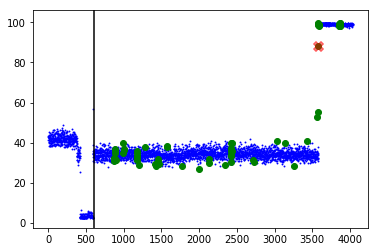




--- exchange-2_cpc_results ---
Corresponding window precision:  0.125
Corresponding window recall:  1.0
Corresponding window false positives:  7
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [317, 325, 438, 655, 824, 1046, 1256, 1305, 1354, 1483, 1484, 1485, 1486, 1487]


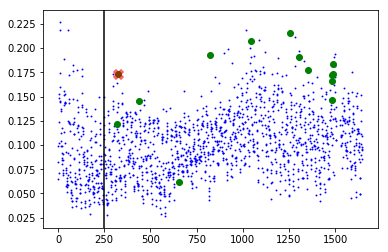




--- exchange-2_cpm_results ---
Corresponding window precision:  0.125
Corresponding window recall:  1.0
Corresponding window false positives:  14
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [325, 326, 348, 355, 360, 365, 424, 601, 606, 655, 664, 665, 802, 871, 876, 896, 899, 951, 976, 977, 1002, 1016, 1104, 1189, 1280, 1281, 1325, 1354, 1450, 1469, 1520, 1521, 1522, 1627]


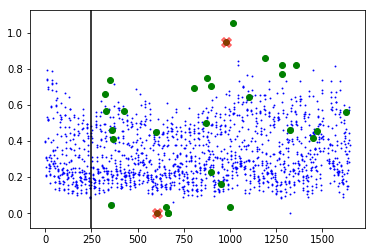




--- exchange-3_cpm_results ---
Corresponding window precision:  0.14285714285714285
Corresponding window recall:  1.0
Corresponding window false positives:  6
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [251, 540, 545, 553, 660, 683, 733, 757, 779, 780, 819, 836, 901, 1018, 1019, 1021, 1044, 1045, 1193, 1194, 1531, 1536, 1548, 1556, 1571]


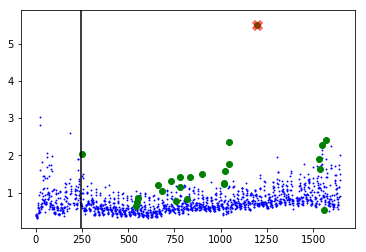




--- ibm-common-stock-closing-prices ---
Corresponding window precision:  0.125
Corresponding window recall:  1.0
Corresponding window false positives:  7
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [272, 303, 364, 365, 395, 423, 515, 516, 607, 637, 668, 698, 729, 760, 789, 820, 850, 866, 867, 868, 1034, 1064, 1095, 1096, 1126, 1154, 1185, 1338, 1339, 1368, 1369, 1399, 1400, 1429]


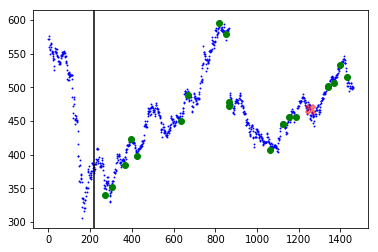




--- rds_cpu_utilization_cc0c53 ---
Corresponding window precision:  0.125
Corresponding window recall:  1.0
Corresponding window false positives:  14
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [620, 621, 683, 708, 718, 785, 896, 920, 937, 948, 962, 972, 992, 1006, 1174, 1196, 1208, 1235, 1269, 1404, 1472, 1498, 1534, 1569, 1716, 1722, 1773, 1798, 1808, 1832, 1873, 1880, 2011, 2050, 2064, 2072, 2082, 2088, 2296, 2302, 2324, 2378, 2383, 2426, 2513, 2576, 2595, 2626, 2650, 2663, 2678, 2801, 2851, 2894, 2924, 2971, 2996, 3032, 3080, 3081, 3082, 3083, 3086, 3089, 3090, 3282, 3283, 3284, 3285, 3286, 3294, 3570, 3571, 3572, 3573, 3574, 3575, 3576, 3579, 3580, 3858, 3859, 3860, 3861, 3862, 3863, 3864]


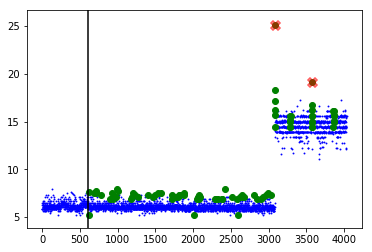




--- artificial_cd_1_random_removal ---
Corresponding window precision:  0.75
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [201, 399, 599, 684]


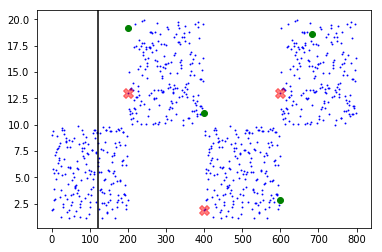




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.16129032258064516
Corresponding window recall:  1.0
Corresponding window false positives:  26
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1550, 1584, 1585, 1586, 1920, 1922, 2206, 2208, 2256, 2257, 2258, 2542, 2544, 2556, 2592, 2593, 2594, 2878, 2880, 2882, 2892, 2893, 2894, 2928, 2930, 3214, 3216, 3264, 3548, 3550, 3552, 3600, 3884, 3886, 3888, 3936, 3937, 3938, 4220, 4221, 4222, 4223, 4224, 4225, 4226, 4270, 4272, 4273, 4274, 4558, 4560, 4570, 4571, 4572, 4573, 4608, 4609, 4610, 4892, 4894, 4895, 4896, 4906, 4908, 4942, 4944, 4945, 4946, 5280, 5321, 5322, 5323, 5325, 5616, 5900, 5902, 5903, 5904, 5949, 5950, 6288, 6572, 6574, 6586, 6624, 6908, 6910, 6922, 6960, 7162, 7164, 7258, 7296, 7580, 7592, 7594, 7671, 7672, 7673, 8007, 8008, 8009, 8343, 8345, 8640, 8816, 8817, 8818, 8824, 8825, 8826, 8827, 8828, 8829, 8830, 9029, 9030, 9031, 9079, 9175, 10060]


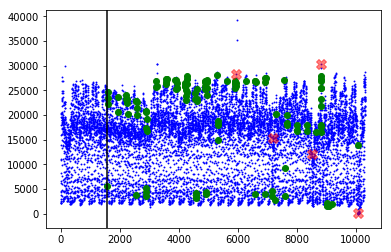




--- artificial_cd_3_random_removal ---
Corresponding window precision:  0.6666666666666666
Corresponding window recall:  1.0
Corresponding window false positives:  2
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [200, 202, 398, 576, 598, 599, 797, 864]


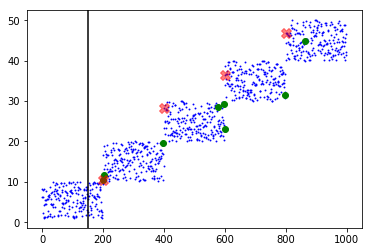

---------weight_fp=0.2, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  17.2
Best window threshold:  0.9998
Corresponding window overall precision:  0.2
Corresponding window overall recall:  0.8636363636363636
Corresponding window overall F score:  0.32478632478632474



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.2
Corresponding window recall:  1.0
Corresponding window false positives:  8
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [2518, 3070, 3071, 3932, 3933, 3936, 3938, 4100, 4101, 4102, 4104, 4105, 4628, 4629, 5439, 5440, 5441, 5442, 5443, 5444, 5446, 5657, 5658, 5659, 5771, 5773, 5774, 6144, 6145, 6749, 6751, 6752, 6788, 7624, 7626]


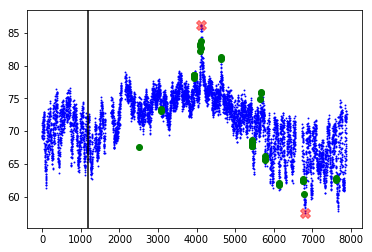




--- ec2_cpu_utilization_ac20cd ---
Corresponding window precision:  0.125
Corresponding window recall:  1.0
Corresponding window false positives:  7
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [873, 875, 883, 884, 887, 992, 1003, 1172, 1174, 1279, 1432, 1459, 1467, 1999, 2131, 2419, 2420, 2421, 2422, 2423, 2426, 3032, 3425, 3567, 3568, 3569, 3570, 3571, 3580, 3581, 3582, 3583, 3584, 3585, 3586, 3859, 3860, 3861, 3862, 3863, 3864, 3865]


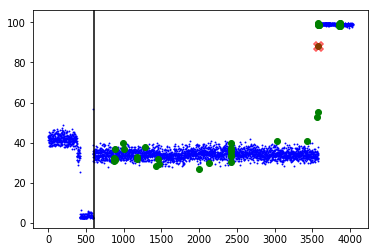




--- exchange-2_cpc_results ---
Corresponding window precision:  0.3333333333333333
Corresponding window recall:  1.0
Corresponding window false positives:  2
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [317, 325, 824, 1484, 1485, 1486, 1487]


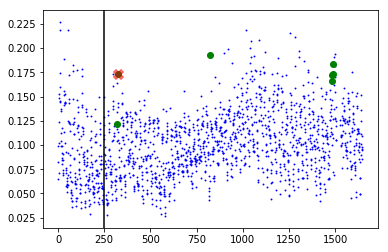




--- exchange-2_cpm_results ---
Corresponding window precision:  0.15384615384615385
Corresponding window recall:  1.0
Corresponding window false positives:  11
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [325, 326, 348, 355, 360, 601, 655, 664, 665, 802, 899, 976, 977, 1002, 1016, 1104, 1280, 1325, 1450, 1520, 1521]


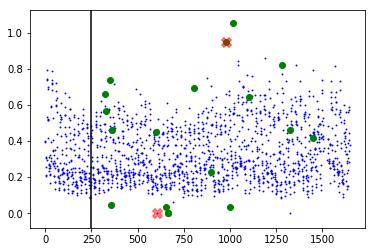




--- exchange-3_cpm_results ---
Corresponding window precision:  0.16666666666666666
Corresponding window recall:  1.0
Corresponding window false positives:  5
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [553, 660, 683, 733, 836, 1018, 1021, 1044, 1193, 1194, 1531, 1536, 1571]


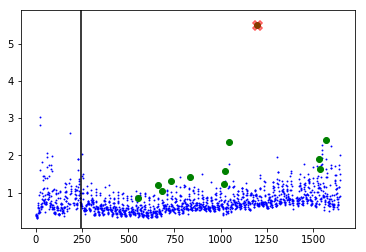




--- ibm-common-stock-closing-prices ---
Corresponding window precision:  0.125
Corresponding window recall:  1.0
Corresponding window false positives:  7
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [272, 364, 365, 395, 423, 515, 637, 668, 698, 729, 760, 789, 820, 867, 1034, 1064, 1095, 1096, 1126, 1154, 1185, 1338, 1368, 1399, 1429]


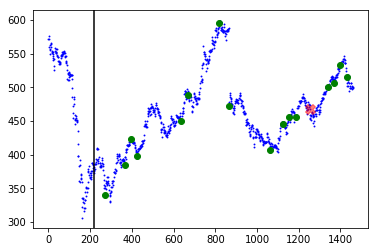




--- rds_cpu_utilization_cc0c53 ---
Corresponding window precision:  0.13333333333333333
Corresponding window recall:  1.0
Corresponding window false positives:  13
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [620, 683, 708, 718, 896, 920, 992, 1006, 1196, 1208, 1235, 1498, 1534, 1722, 1808, 1832, 1880, 2011, 2064, 2082, 2426, 2626, 2650, 2801, 2971, 3080, 3081, 3082, 3089, 3282, 3283, 3284, 3285, 3570, 3571, 3572, 3573, 3574, 3576, 3580, 3858, 3859, 3860, 3861, 3862, 3863]


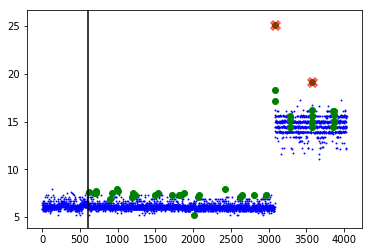




--- artificial_cd_1_random_removal ---
Corresponding window precision:  1.0
Corresponding window recall:  1.0
Corresponding window false positives:  0
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [201, 399, 599]


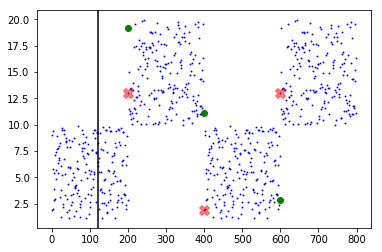




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.1111111111111111
Corresponding window recall:  0.4
Corresponding window false positives:  16
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  [2208, 2256, 2592, 2878, 2892, 3550, 3552, 3600, 3888, 3936, 4220, 4221, 4222, 4223, 4224, 4272, 4570, 4572, 4573, 4608, 4894, 4944, 5323, 5616, 5902, 5904, 5949, 5950, 6288, 6624, 6908, 6922, 6960, 7296, 8824, 8825, 8826, 8827, 8828, 9031]


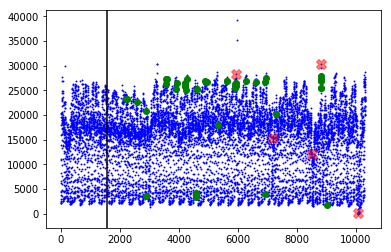




--- artificial_cd_3_random_removal ---
Corresponding window precision:  0.6666666666666666
Corresponding window recall:  1.0
Corresponding window false positives:  2
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [200, 202, 398, 576, 598, 599, 797, 864]


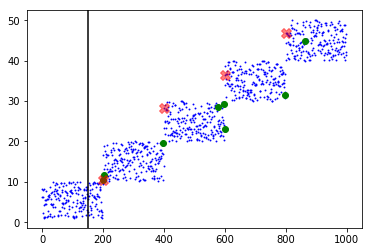

---------weight_fp=0.3, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  20.1
Best window threshold:  1.0
Corresponding window overall precision:  0.3333333333333333
Corresponding window overall recall:  0.18181818181818182
Corresponding window overall F score:  0.23529411764705885



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


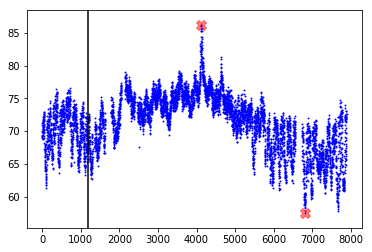




--- ec2_cpu_utilization_ac20cd ---
Corresponding window precision:  0.3333333333333333
Corresponding window recall:  1.0
Corresponding window false positives:  2
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [2420, 3567, 3580, 3581, 3859, 3860]


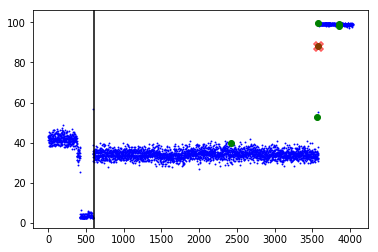




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  []


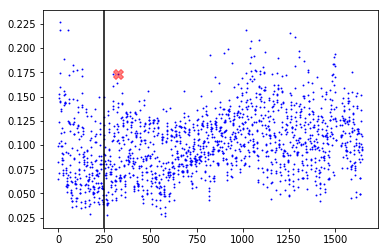




--- exchange-2_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


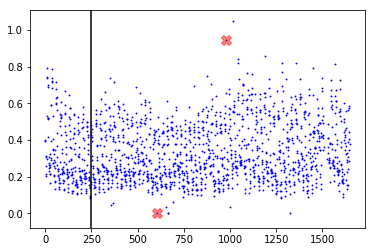




--- exchange-3_cpm_results ---
Corresponding window precision:  0.5
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1044, 1193, 1194]


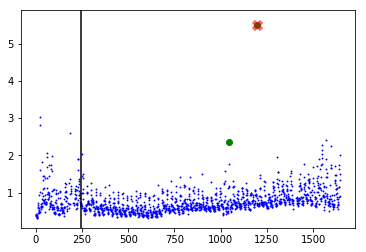




--- ibm-common-stock-closing-prices ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  2
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [1095, 1399]


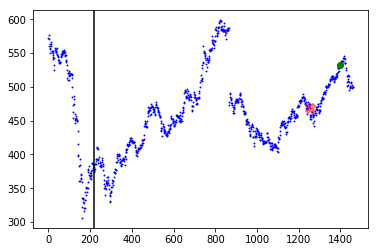




--- rds_cpu_utilization_cc0c53 ---
Corresponding window precision:  0.6666666666666666
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [3080, 3081, 3570, 3858]


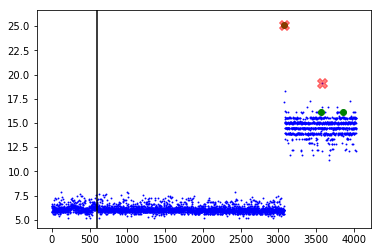




--- artificial_cd_1_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  []


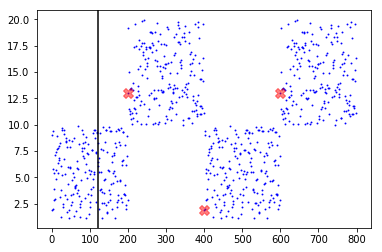




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  5


Outlier indices as determined by best window threshold:  []


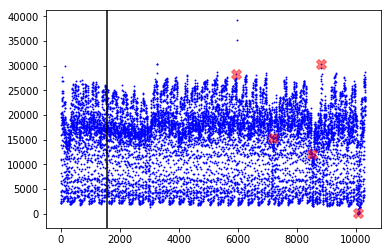




--- artificial_cd_3_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  4


Outlier indices as determined by best window threshold:  [864]


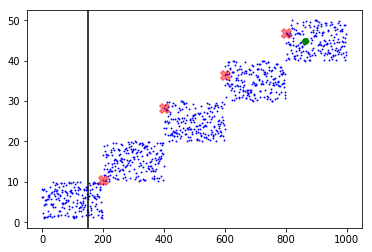

---------weight_fp=0.4, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  20.799999999999997
Best window threshold:  1.0
Corresponding window overall precision:  0.3333333333333333
Corresponding window overall recall:  0.18181818181818182
Corresponding window overall F score:  0.23529411764705885



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


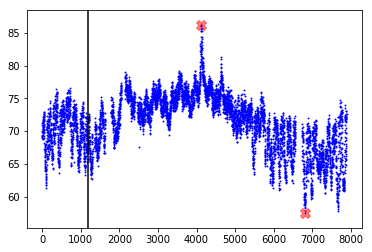




--- ec2_cpu_utilization_ac20cd ---
Corresponding window precision:  0.3333333333333333
Corresponding window recall:  1.0
Corresponding window false positives:  2
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [2420, 3567, 3580, 3581, 3859, 3860]


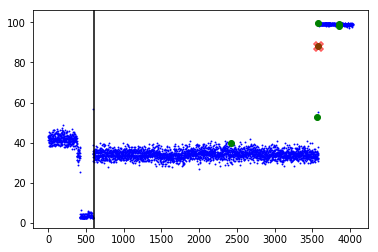




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  []


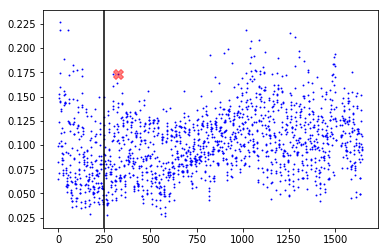




--- exchange-2_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


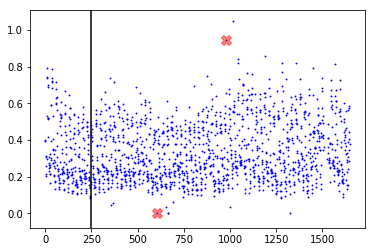




--- exchange-3_cpm_results ---
Corresponding window precision:  0.5
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1044, 1193, 1194]


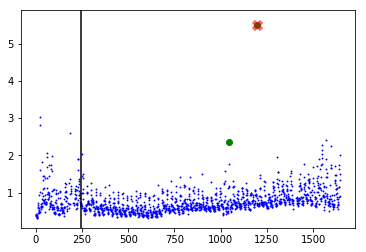




--- ibm-common-stock-closing-prices ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  2
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [1095, 1399]


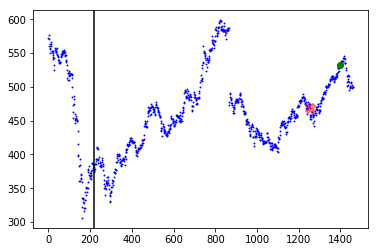




--- rds_cpu_utilization_cc0c53 ---
Corresponding window precision:  0.6666666666666666
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [3080, 3081, 3570, 3858]


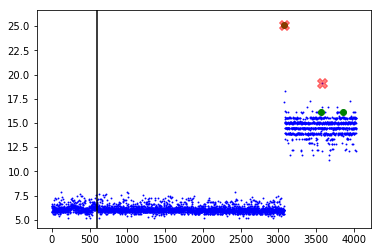




--- artificial_cd_1_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  []


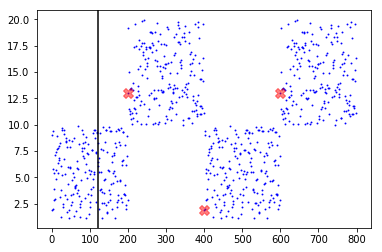




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  5


Outlier indices as determined by best window threshold:  []


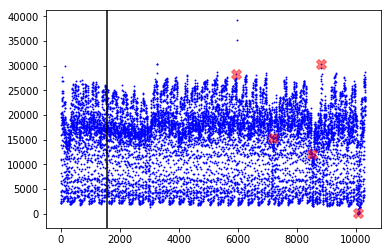




--- artificial_cd_3_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  4


Outlier indices as determined by best window threshold:  [864]


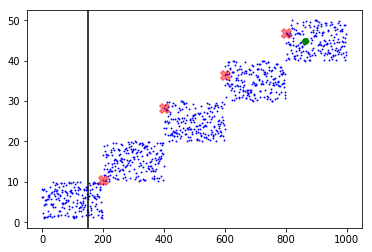

---------weight_fp=0.5, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  21.5
Best window threshold:  1.0
Corresponding window overall precision:  0.3333333333333333
Corresponding window overall recall:  0.18181818181818182
Corresponding window overall F score:  0.23529411764705885



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


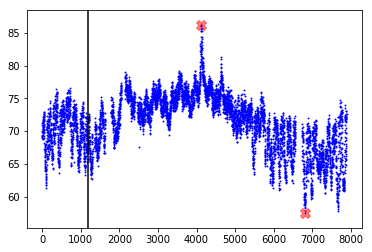




--- ec2_cpu_utilization_ac20cd ---
Corresponding window precision:  0.3333333333333333
Corresponding window recall:  1.0
Corresponding window false positives:  2
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [2420, 3567, 3580, 3581, 3859, 3860]


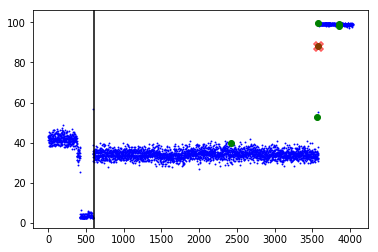




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  []


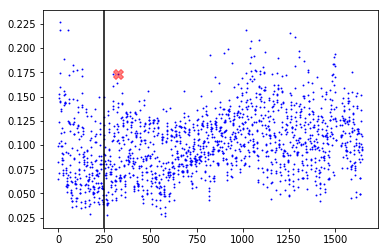




--- exchange-2_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


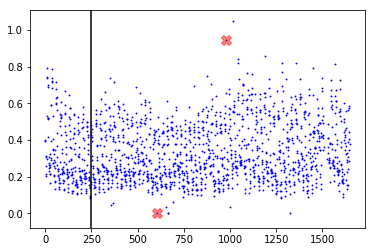




--- exchange-3_cpm_results ---
Corresponding window precision:  0.5
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1044, 1193, 1194]


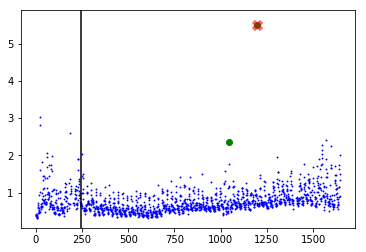




--- ibm-common-stock-closing-prices ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  2
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [1095, 1399]


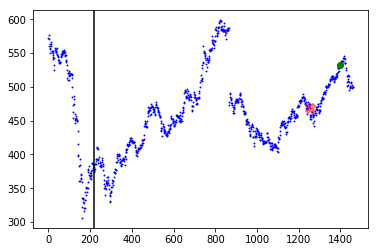




--- rds_cpu_utilization_cc0c53 ---
Corresponding window precision:  0.6666666666666666
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [3080, 3081, 3570, 3858]


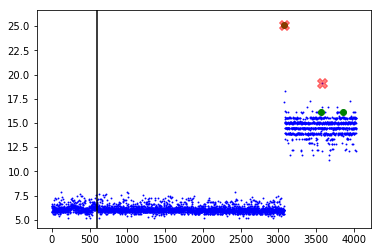




--- artificial_cd_1_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  []


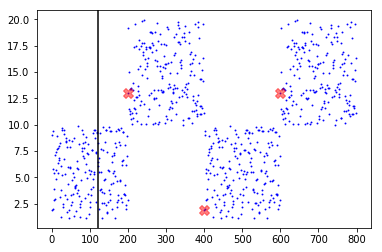




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  5


Outlier indices as determined by best window threshold:  []


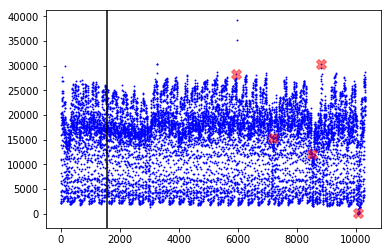




--- artificial_cd_3_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  4


Outlier indices as determined by best window threshold:  [864]


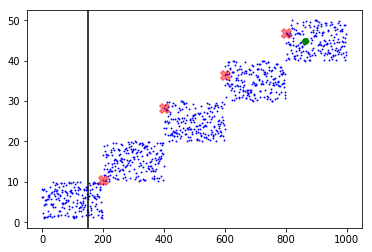

---------weight_fp=0.6, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  22.200000000000003
Best window threshold:  1.0
Corresponding window overall precision:  0.3333333333333333
Corresponding window overall recall:  0.18181818181818182
Corresponding window overall F score:  0.23529411764705885



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


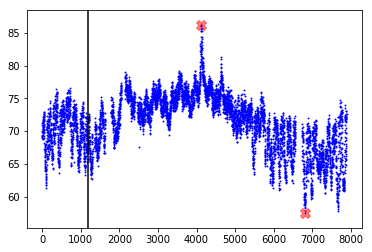




--- ec2_cpu_utilization_ac20cd ---
Corresponding window precision:  0.3333333333333333
Corresponding window recall:  1.0
Corresponding window false positives:  2
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [2420, 3567, 3580, 3581, 3859, 3860]


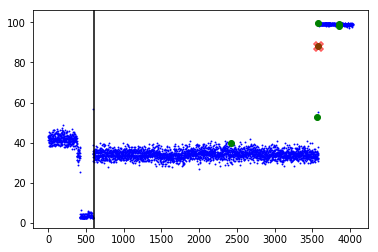




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  []


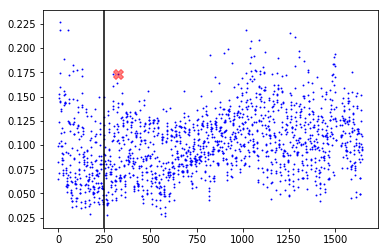




--- exchange-2_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


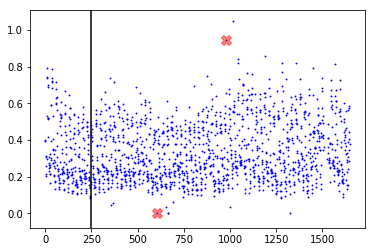




--- exchange-3_cpm_results ---
Corresponding window precision:  0.5
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1044, 1193, 1194]


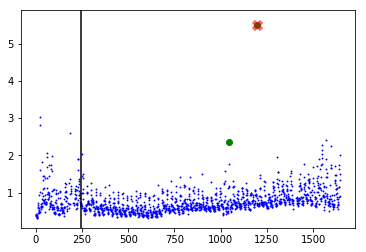




--- ibm-common-stock-closing-prices ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  2
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [1095, 1399]


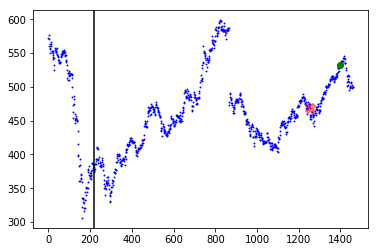




--- rds_cpu_utilization_cc0c53 ---
Corresponding window precision:  0.6666666666666666
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [3080, 3081, 3570, 3858]


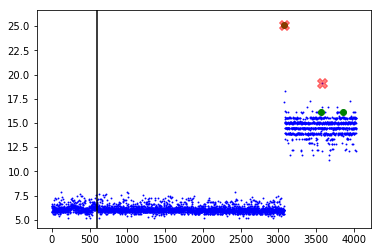




--- artificial_cd_1_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  []


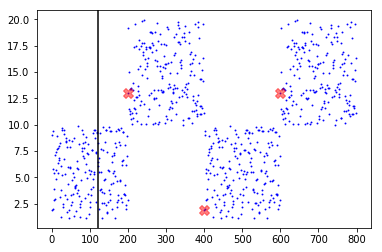




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  5


Outlier indices as determined by best window threshold:  []


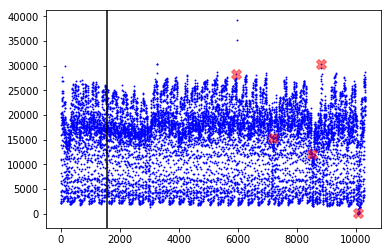




--- artificial_cd_3_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  4


Outlier indices as determined by best window threshold:  [864]


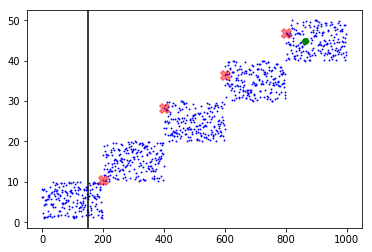

---------weight_fp=0.7, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  22.9
Best window threshold:  1.0
Corresponding window overall precision:  0.3333333333333333
Corresponding window overall recall:  0.18181818181818182
Corresponding window overall F score:  0.23529411764705885



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


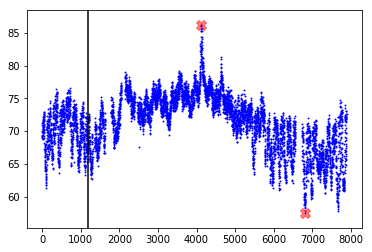




--- ec2_cpu_utilization_ac20cd ---
Corresponding window precision:  0.3333333333333333
Corresponding window recall:  1.0
Corresponding window false positives:  2
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [2420, 3567, 3580, 3581, 3859, 3860]


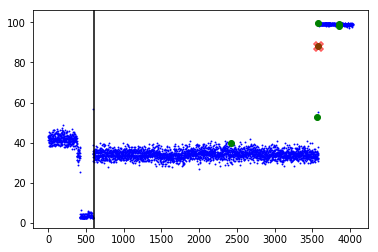




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  []


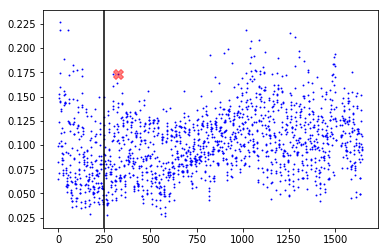




--- exchange-2_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


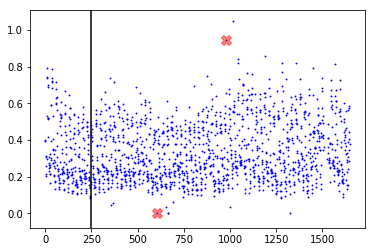




--- exchange-3_cpm_results ---
Corresponding window precision:  0.5
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1044, 1193, 1194]


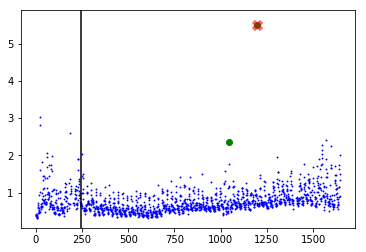




--- ibm-common-stock-closing-prices ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  2
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [1095, 1399]


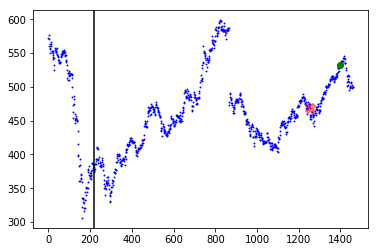




--- rds_cpu_utilization_cc0c53 ---
Corresponding window precision:  0.6666666666666666
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [3080, 3081, 3570, 3858]


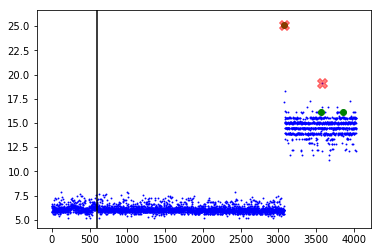




--- artificial_cd_1_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  []


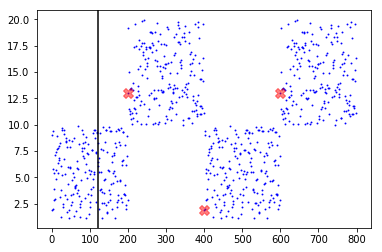




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  5


Outlier indices as determined by best window threshold:  []


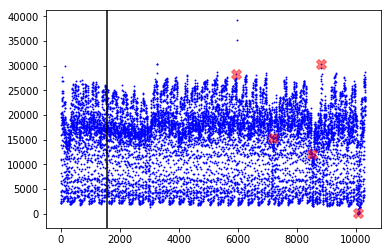




--- artificial_cd_3_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  4


Outlier indices as determined by best window threshold:  [864]


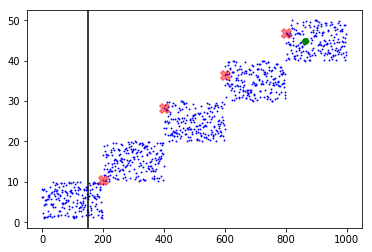

---------weight_fp=0.8, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  23.6
Best window threshold:  1.0
Corresponding window overall precision:  0.3333333333333333
Corresponding window overall recall:  0.18181818181818182
Corresponding window overall F score:  0.23529411764705885



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


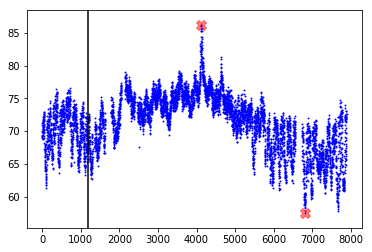




--- ec2_cpu_utilization_ac20cd ---
Corresponding window precision:  0.3333333333333333
Corresponding window recall:  1.0
Corresponding window false positives:  2
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [2420, 3567, 3580, 3581, 3859, 3860]


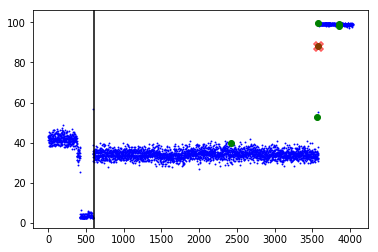




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  []


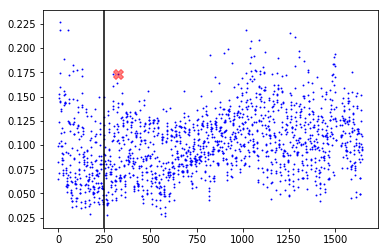




--- exchange-2_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


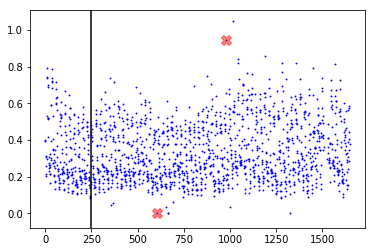




--- exchange-3_cpm_results ---
Corresponding window precision:  0.5
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1044, 1193, 1194]


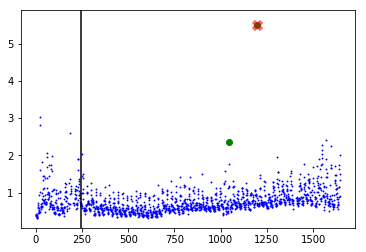




--- ibm-common-stock-closing-prices ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  2
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [1095, 1399]


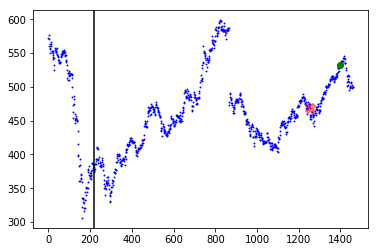




--- rds_cpu_utilization_cc0c53 ---
Corresponding window precision:  0.6666666666666666
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [3080, 3081, 3570, 3858]


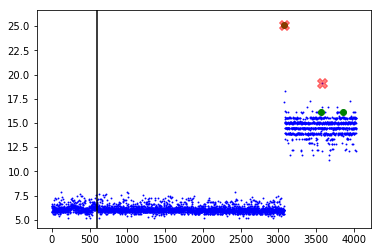




--- artificial_cd_1_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  []


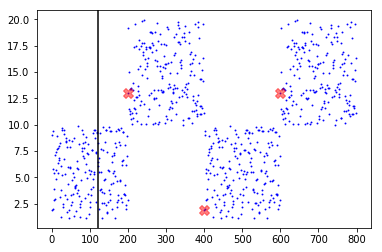




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  5


Outlier indices as determined by best window threshold:  []


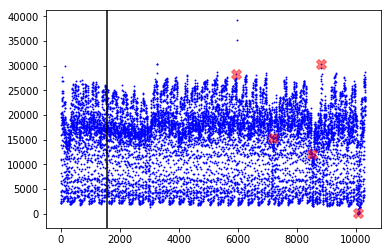




--- artificial_cd_3_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  4


Outlier indices as determined by best window threshold:  [864]


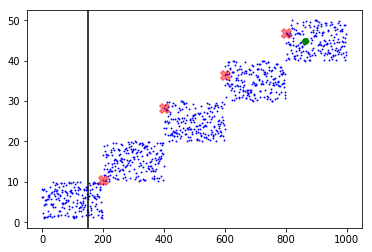

---------weight_fp=0.9, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  24.299999999999997
Best window threshold:  1.0
Corresponding window overall precision:  0.3333333333333333
Corresponding window overall recall:  0.18181818181818182
Corresponding window overall F score:  0.23529411764705885



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


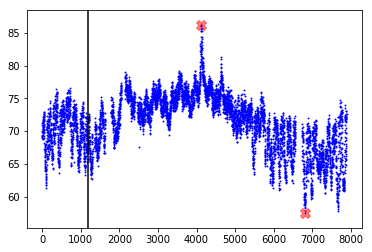




--- ec2_cpu_utilization_ac20cd ---
Corresponding window precision:  0.3333333333333333
Corresponding window recall:  1.0
Corresponding window false positives:  2
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [2420, 3567, 3580, 3581, 3859, 3860]


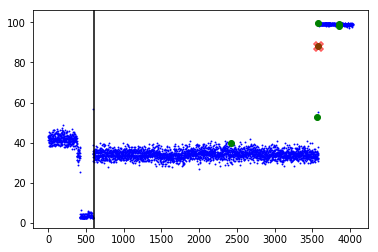




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  []


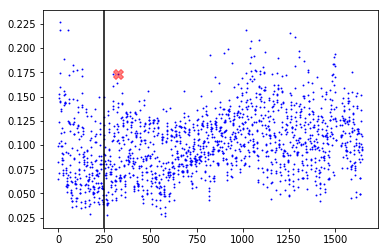




--- exchange-2_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


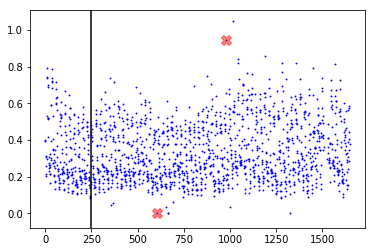




--- exchange-3_cpm_results ---
Corresponding window precision:  0.5
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1044, 1193, 1194]


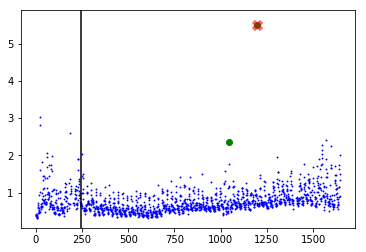




--- ibm-common-stock-closing-prices ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  2
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [1095, 1399]


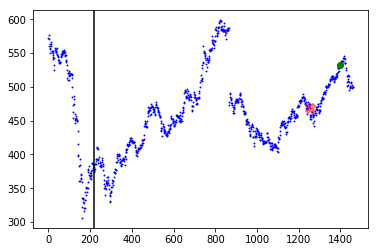




--- rds_cpu_utilization_cc0c53 ---
Corresponding window precision:  0.6666666666666666
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [3080, 3081, 3570, 3858]


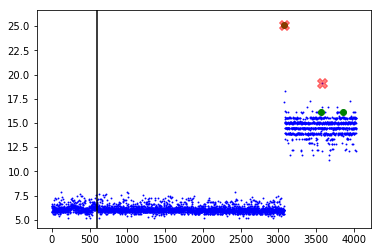




--- artificial_cd_1_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  []


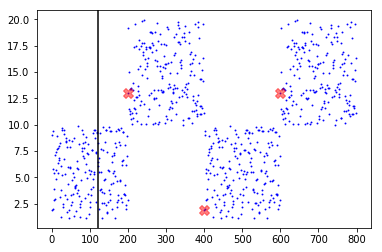




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  5


Outlier indices as determined by best window threshold:  []


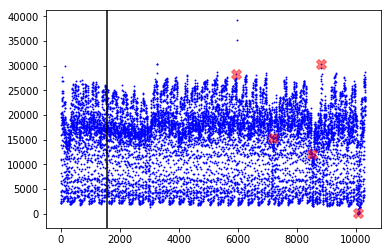




--- artificial_cd_3_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  4


Outlier indices as determined by best window threshold:  [864]


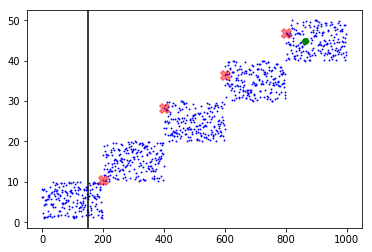

---------weight_fp=1.0, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  25.0
Best window threshold:  1.0
Corresponding window overall precision:  0.3333333333333333
Corresponding window overall recall:  0.18181818181818182
Corresponding window overall F score:  0.23529411764705885



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


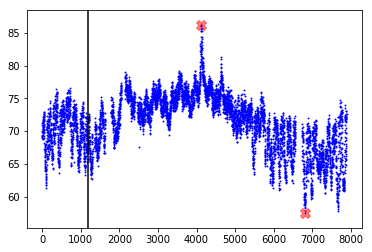




--- ec2_cpu_utilization_ac20cd ---
Corresponding window precision:  0.3333333333333333
Corresponding window recall:  1.0
Corresponding window false positives:  2
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [2420, 3567, 3580, 3581, 3859, 3860]


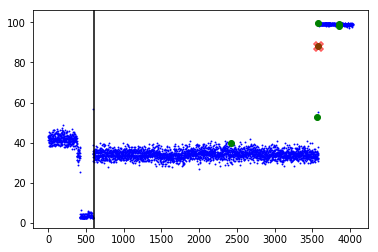




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  []


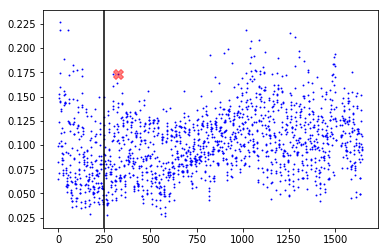




--- exchange-2_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


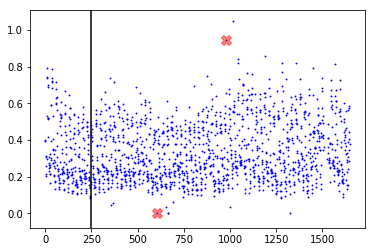




--- exchange-3_cpm_results ---
Corresponding window precision:  0.5
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1044, 1193, 1194]


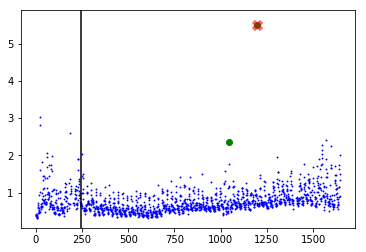




--- ibm-common-stock-closing-prices ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  2
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [1095, 1399]


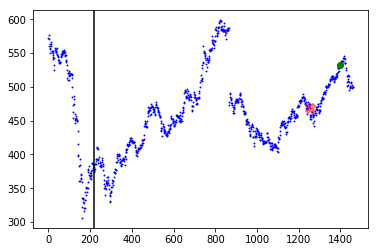




--- rds_cpu_utilization_cc0c53 ---
Corresponding window precision:  0.6666666666666666
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [3080, 3081, 3570, 3858]


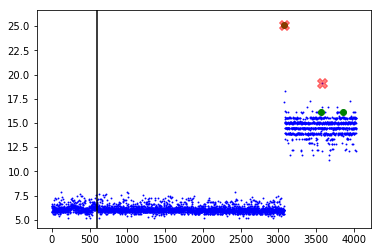




--- artificial_cd_1_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  []


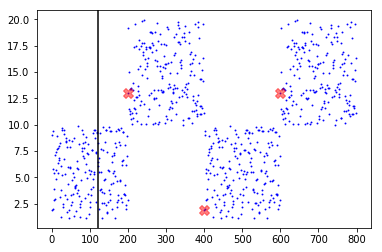




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  5


Outlier indices as determined by best window threshold:  []


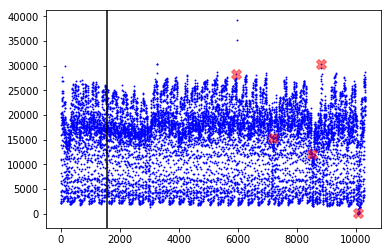




--- artificial_cd_3_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  4


Outlier indices as determined by best window threshold:  [864]


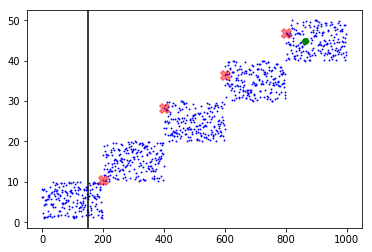

------------
False Positive Weight:  0.1
	 Minimum number of mistakes : 9.8
	 Best window threshold : 0.9987
	 Corresponding window overall precision : 0.171875
	 Corresponding window overall recall : 1.0
	 Corresponding window overall F score : 0.29333333333333333
False Positive Weight:  0.2
	 Minimum number of mistakes : 17.2
	 Best window threshold : 0.9998
	 Corresponding window overall precision : 0.2
	 Corresponding window overall recall : 0.8636363636363636
	 Corresponding window overall F score : 0.32478632478632474
False Positive Weight:  0.3
	 Minimum number of mistakes : 20.1
	 Best window threshold : 1.0
	 Corresponding window overall precision : 0.3333333333333333
	 Corresponding window overall recall : 0.18181818181818182
	 Corresponding window overall F score : 0.23529411764705885
False Positive Weight:  0.4
	 Minimum number of mistakes : 20.799999999999997
	 Best window threshold : 1.0
	 Corresponding window overall precision : 0.3333333333333333
	 Corresponding window 

In [17]:
end_results = {}
for weight_fp in weight_fp_list:  
    print("---------weight_fp=" + str(weight_fp) + ", weight_fn=1----------")
    weight_result = adclasses.pretty_print_results(ad_dict, anomaly_scores_dict, true_outlier_indices_dict, weight_fp=weight_fp, weight_fn=1)
    end_results[weight_fp] = weight_result

print("------------")
adclasses.pretty_print_end_results(end_results)

# STL Residual Results

In [24]:
stl_dataset_name_list = ["ambient_temperature_system_failure",
                         "exchange-2_cpc_results",
                         "exchange-2_cpm_results",
                         "exchange-3_cpm_results",
                         "nyc_taxi_random_removal"]

stl_ad_dict = {}
for dataset_name in stl_dataset_name_list:
    stl_ad_dict[dataset_name] = ad_dict[dataset_name]
    
stl_true_outlier_indices_dict = {}
for dataset_name in stl_dataset_name_list:
    stl_true_outlier_indices_dict[dataset_name] = true_outlier_indices_dict[dataset_name]

In [25]:
anomaly_scores_dict = {}

for dataset_name in stl_dataset_name_list:
    output_dict_stl = joblib.load("anomaly_scores" + window_size + "/stl/" + dataset_name)
    anomaly_scores_dict[dataset_name] = output_dict_stl["Anomaly Scores"]

In [26]:
adclasses.precision_recall_curve_info(anomaly_scores_dict, stl_true_outlier_indices_dict)

{0.1: {'precision': 0.11627906976744186, 'recall': 1.0},
 0.2: {'precision': 0.11627906976744186, 'recall': 1.0},
 0.3: {'precision': 0.11627906976744186, 'recall': 1.0},
 0.4: {'precision': 0.11627906976744186, 'recall': 1.0},
 0.5: {'precision': 0.11627906976744186, 'recall': 1.0},
 0.6: {'precision': 0.0, 'recall': 0.0},
 0.7: {'precision': 0.0, 'recall': 0.0},
 0.8: {'precision': 0.0, 'recall': 0.0},
 0.9: {'precision': 0.0, 'recall': 0.0},
 1.0: {'precision': 0.0, 'recall': 0.0}}

---------weight_fp=0.1, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  8.6
Best window threshold:  0.0
Corresponding window overall precision:  0.11224489795918367
Corresponding window overall recall:  1.0
Corresponding window overall F score:  0.20183486238532108



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.1111111111111111
Corresponding window recall:  1.0
Corresponding window false positives:  16
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233, 1234, 1235, 1236, 1237, 1238, 1239, 1240, 1241, 1242, 1243, 1244, 1245, 1246, 1247, 1248, 1249, 1250, 1251, 1252, 1253,

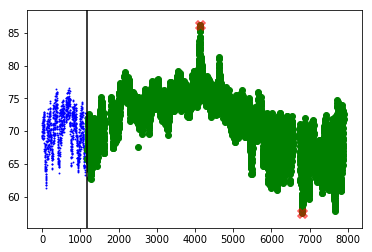




--- exchange-2_cpc_results ---
Corresponding window precision:  0.1111111111111111
Corresponding window recall:  1.0
Corresponding window false positives:  8
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394

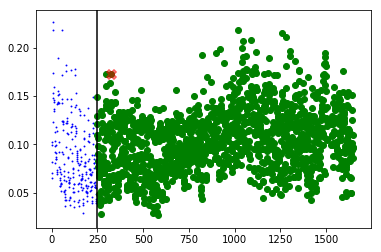




--- exchange-2_cpm_results ---
Corresponding window precision:  0.1111111111111111
Corresponding window recall:  1.0
Corresponding window false positives:  16
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 39

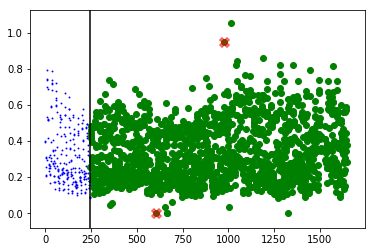




--- exchange-3_cpm_results ---
Corresponding window precision:  0.1111111111111111
Corresponding window recall:  1.0
Corresponding window false positives:  8
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394

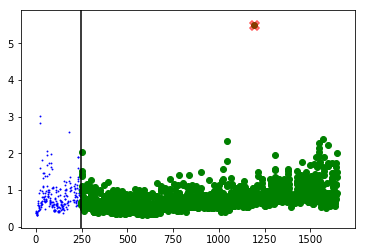




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.11627906976744186
Corresponding window recall:  1.0
Corresponding window false positives:  38
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1614, 1615, 1616, 1617, 1618, 1619, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 1660, 1661, 1662, 1663, 1664, 1665, 1666, 1667, 1668, 1669, 167

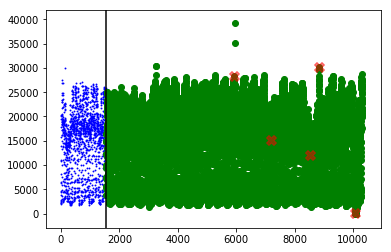

---------weight_fp=0.2, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  12.8
Best window threshold:  0.5772
Corresponding window overall precision:  0.0
Corresponding window overall recall:  0.0
Corresponding window overall F score:  nan



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [7886, 7887]


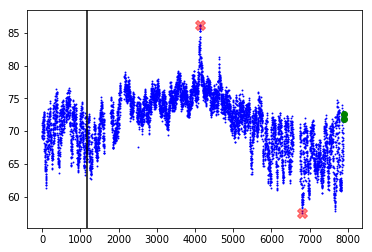




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [1646, 1647]


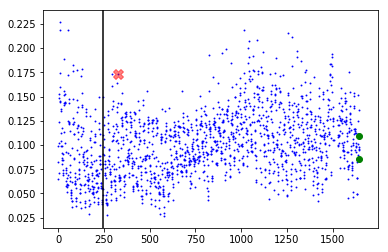




--- exchange-2_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [1646, 1647]


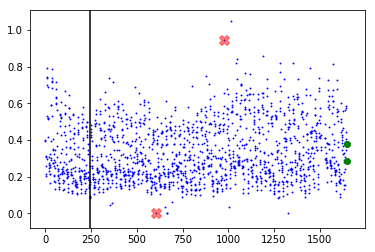




--- exchange-3_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [1645, 1646]


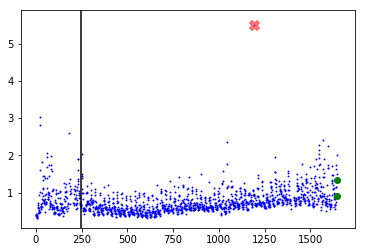




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  5
Corresponding window false negatives:  5


Outlier indices as determined by best window threshold:  [1601, 1602, 1603, 1604, 1605, 5168, 5169, 5170, 5171, 5172, 5183, 5184, 5185, 5186, 5187, 7607, 7608, 7609, 7610, 7611, 7612, 7613, 7614, 10318, 10319]


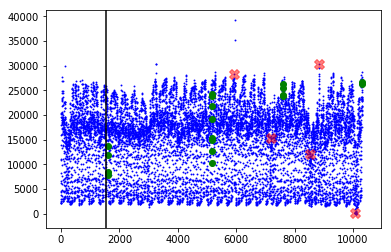

---------weight_fp=0.3, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  13.7
Best window threshold:  0.5772
Corresponding window overall precision:  0.0
Corresponding window overall recall:  0.0
Corresponding window overall F score:  nan



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [7886, 7887]


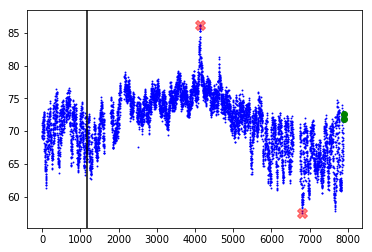




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [1646, 1647]


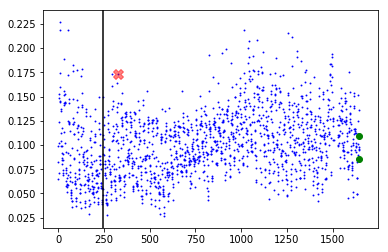




--- exchange-2_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [1646, 1647]


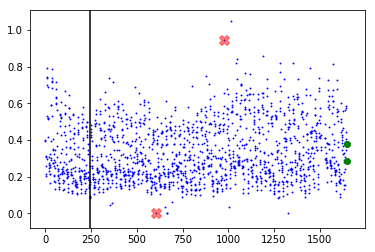




--- exchange-3_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [1645, 1646]


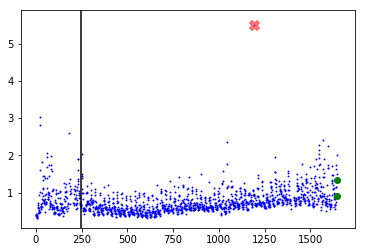




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  5
Corresponding window false negatives:  5


Outlier indices as determined by best window threshold:  [1601, 1602, 1603, 1604, 1605, 5168, 5169, 5170, 5171, 5172, 5183, 5184, 5185, 5186, 5187, 7607, 7608, 7609, 7610, 7611, 7612, 7613, 7614, 10318, 10319]


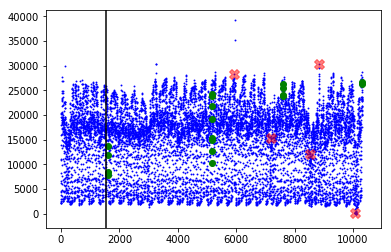

---------weight_fp=0.4, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  14.6
Best window threshold:  0.5772
Corresponding window overall precision:  0.0
Corresponding window overall recall:  0.0
Corresponding window overall F score:  nan



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [7886, 7887]


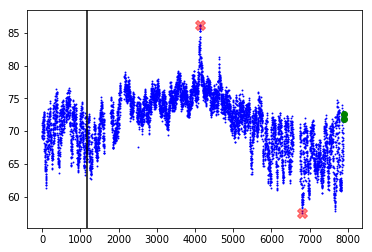




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [1646, 1647]


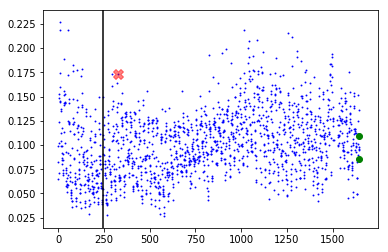




--- exchange-2_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [1646, 1647]


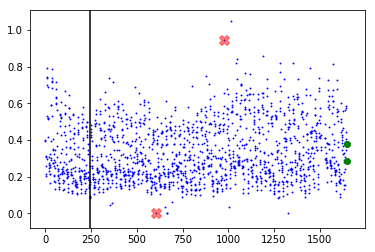




--- exchange-3_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [1645, 1646]


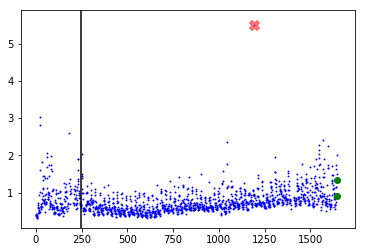




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  5
Corresponding window false negatives:  5


Outlier indices as determined by best window threshold:  [1601, 1602, 1603, 1604, 1605, 5168, 5169, 5170, 5171, 5172, 5183, 5184, 5185, 5186, 5187, 7607, 7608, 7609, 7610, 7611, 7612, 7613, 7614, 10318, 10319]


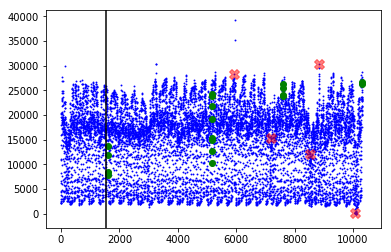

---------weight_fp=0.5, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  15.5
Best window threshold:  0.5772
Corresponding window overall precision:  0.0
Corresponding window overall recall:  0.0
Corresponding window overall F score:  nan



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [7886, 7887]


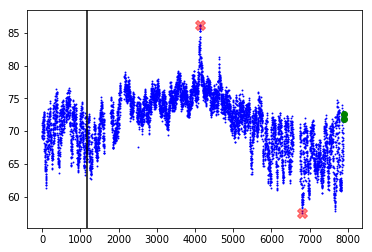




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [1646, 1647]


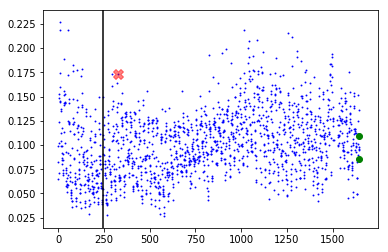




--- exchange-2_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [1646, 1647]


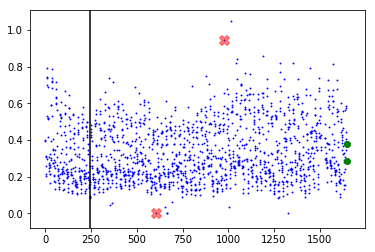




--- exchange-3_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [1645, 1646]


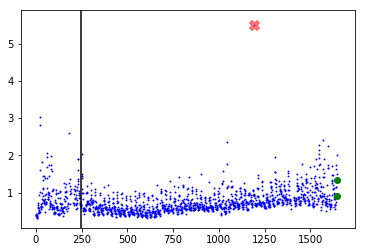




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  5
Corresponding window false negatives:  5


Outlier indices as determined by best window threshold:  [1601, 1602, 1603, 1604, 1605, 5168, 5169, 5170, 5171, 5172, 5183, 5184, 5185, 5186, 5187, 7607, 7608, 7609, 7610, 7611, 7612, 7613, 7614, 10318, 10319]


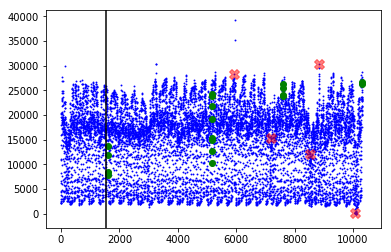

---------weight_fp=0.6, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  16.4
Best window threshold:  0.5772
Corresponding window overall precision:  0.0
Corresponding window overall recall:  0.0
Corresponding window overall F score:  nan



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [7886, 7887]


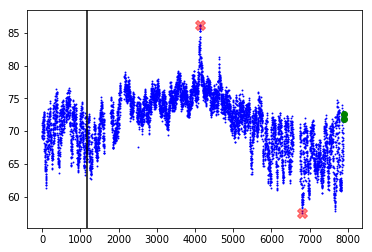




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [1646, 1647]


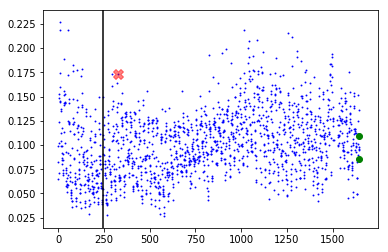




--- exchange-2_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [1646, 1647]


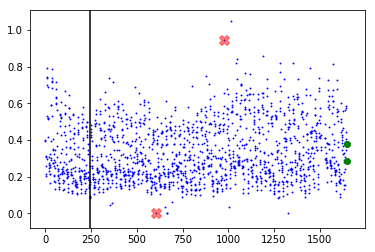




--- exchange-3_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [1645, 1646]


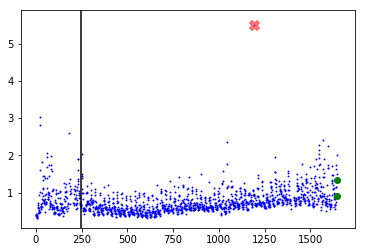




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  5
Corresponding window false negatives:  5


Outlier indices as determined by best window threshold:  [1601, 1602, 1603, 1604, 1605, 5168, 5169, 5170, 5171, 5172, 5183, 5184, 5185, 5186, 5187, 7607, 7608, 7609, 7610, 7611, 7612, 7613, 7614, 10318, 10319]


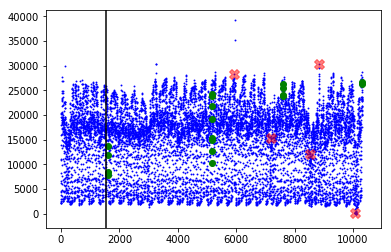

---------weight_fp=0.7, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  17.3
Best window threshold:  0.5772
Corresponding window overall precision:  0.0
Corresponding window overall recall:  0.0
Corresponding window overall F score:  nan



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [7886, 7887]


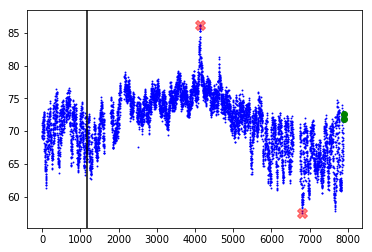




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [1646, 1647]


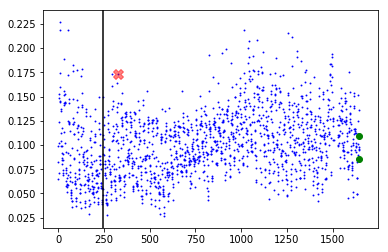




--- exchange-2_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [1646, 1647]


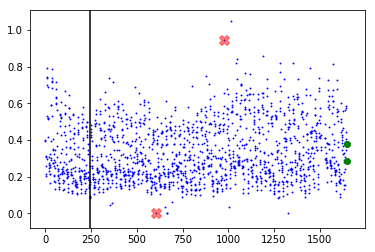




--- exchange-3_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [1645, 1646]


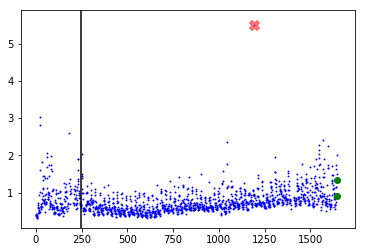




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  5
Corresponding window false negatives:  5


Outlier indices as determined by best window threshold:  [1601, 1602, 1603, 1604, 1605, 5168, 5169, 5170, 5171, 5172, 5183, 5184, 5185, 5186, 5187, 7607, 7608, 7609, 7610, 7611, 7612, 7613, 7614, 10318, 10319]


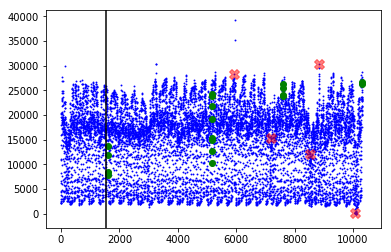

---------weight_fp=0.8, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  18.2
Best window threshold:  0.5772
Corresponding window overall precision:  0.0
Corresponding window overall recall:  0.0
Corresponding window overall F score:  nan



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [7886, 7887]


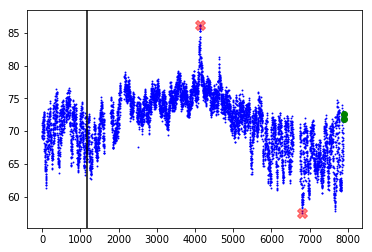




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [1646, 1647]


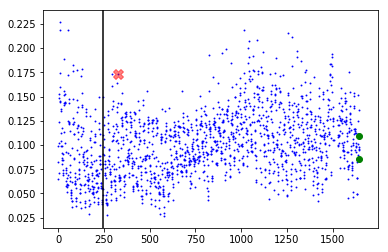




--- exchange-2_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [1646, 1647]


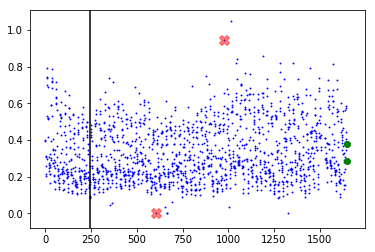




--- exchange-3_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [1645, 1646]


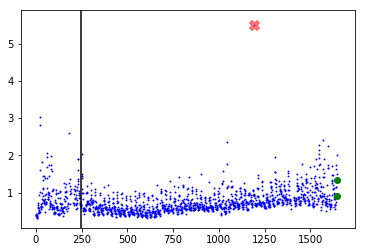




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  5
Corresponding window false negatives:  5


Outlier indices as determined by best window threshold:  [1601, 1602, 1603, 1604, 1605, 5168, 5169, 5170, 5171, 5172, 5183, 5184, 5185, 5186, 5187, 7607, 7608, 7609, 7610, 7611, 7612, 7613, 7614, 10318, 10319]


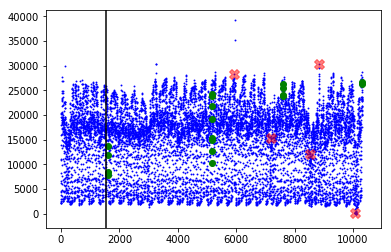

---------weight_fp=0.9, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  19.1
Best window threshold:  0.5772
Corresponding window overall precision:  0.0
Corresponding window overall recall:  0.0
Corresponding window overall F score:  nan



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [7886, 7887]


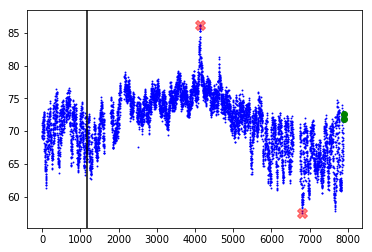




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [1646, 1647]


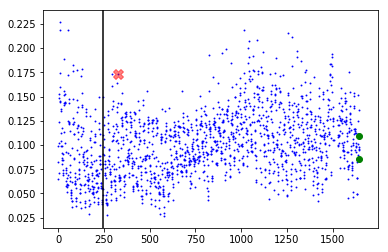




--- exchange-2_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [1646, 1647]


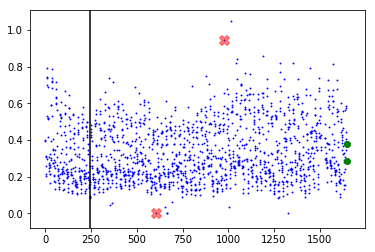




--- exchange-3_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [1645, 1646]


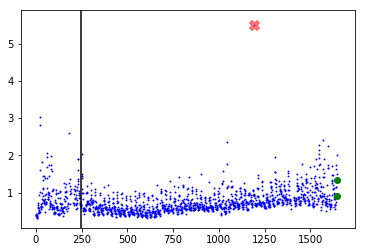




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  5
Corresponding window false negatives:  5


Outlier indices as determined by best window threshold:  [1601, 1602, 1603, 1604, 1605, 5168, 5169, 5170, 5171, 5172, 5183, 5184, 5185, 5186, 5187, 7607, 7608, 7609, 7610, 7611, 7612, 7613, 7614, 10318, 10319]


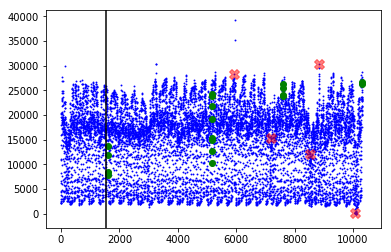

---------weight_fp=1.0, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  20.0
Best window threshold:  0.5772
Corresponding window overall precision:  0.0
Corresponding window overall recall:  0.0
Corresponding window overall F score:  nan



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [7886, 7887]


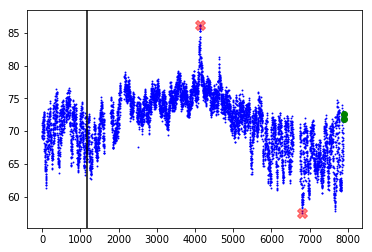




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [1646, 1647]


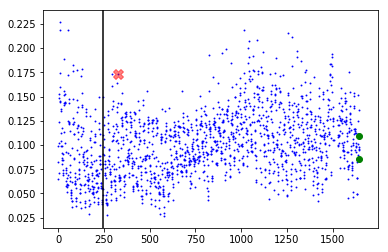




--- exchange-2_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [1646, 1647]


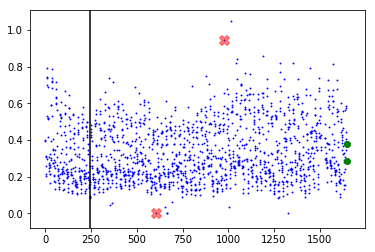




--- exchange-3_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [1645, 1646]


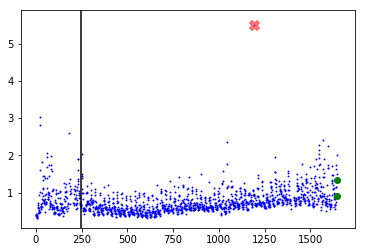




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  5
Corresponding window false negatives:  5


Outlier indices as determined by best window threshold:  [1601, 1602, 1603, 1604, 1605, 5168, 5169, 5170, 5171, 5172, 5183, 5184, 5185, 5186, 5187, 7607, 7608, 7609, 7610, 7611, 7612, 7613, 7614, 10318, 10319]


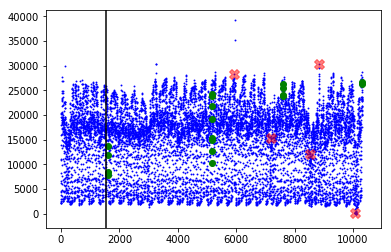

------------
False Positive Weight:  0.1
	 Minimum number of mistakes : 8.6
	 Best window threshold : 0.0
	 Corresponding window overall precision : 0.11224489795918367
	 Corresponding window overall recall : 1.0
	 Corresponding window overall F score : 0.20183486238532108
False Positive Weight:  0.2
	 Minimum number of mistakes : 12.8
	 Best window threshold : 0.5772
	 Corresponding window overall precision : 0.0
	 Corresponding window overall recall : 0.0
	 Corresponding window overall F score : nan
False Positive Weight:  0.3
	 Minimum number of mistakes : 13.7
	 Best window threshold : 0.5772
	 Corresponding window overall precision : 0.0
	 Corresponding window overall recall : 0.0
	 Corresponding window overall F score : nan
False Positive Weight:  0.4
	 Minimum number of mistakes : 14.6
	 Best window threshold : 0.5772
	 Corresponding window overall precision : 0.0
	 Corresponding window overall recall : 0.0
	 Corresponding window overall F score : nan
False Positive Weight:  0.5

In [27]:
end_results = {}
for weight_fp in weight_fp_list:  
    print("---------weight_fp=" + str(weight_fp) + ", weight_fn=1----------")
    weight_result = adclasses.pretty_print_results(stl_ad_dict, anomaly_scores_dict, stl_true_outlier_indices_dict, weight_fp=weight_fp, weight_fn=1)
    end_results[weight_fp] = weight_result

print("------------")
adclasses.pretty_print_end_results(end_results)

# NAB Score

    1. make a python 2.7 virtual environment
    2. pip install pandas
    3. git clone NAB
    4. pip install . in NAB

To obtain NAB scores for every method on the missing uniform datasets, we must do the following:

# Have a new dataset?

1. add the new dataset csv with timestamp, value in respective folder in data folder. no missing time steps allowed

2. add the point anomaly dates to combined_labels.json in labels folder

3. add the anomaly windows to combined_windows.json  (start and end dates)

4. in results/null, include null_datasetname.csv with timestamp, value, label, and anomaly_score (all .5). You can just use the adclasses.create_result_csv function and delete irrelevant columns and fill anomaly_score with all .5s

WARNING: We want datasets with missing time steps. Replace the dataset csv in the data folder with a nonfilled version

In [28]:
# nothing new

# For every anomaly detection method "method_name" and dataset "dataset_name", do the following:

0. clear up previous NAB/results/

1. $ python scripts/create_new_detector.py --detector method_name

this creates the method_name folder in results folder with a bunch of datasets folders that are empty. delete the irrelevant ones

2. for every characteristic relevant dataset, create csvs with columns like so: timestamp, value, anomaly_score, label. place in appropriate locations in results/method_name/

3. replace datasets with no fill

4. $ python run.py -d method_name --optimize --score --normalize

WARNING: HAVE TO MAKE CHANGE TO NAB function convertAnomalyScoresToDetections in util.py bc it will think values are strings

In [15]:
prepath="/home/cfreeman/Documents/NextIT/test_python_2/NAB/results_missinguniform" + window_size + "/"

# SARIMA

Final score for 'SARIMA' detector on 'reward_low_FP_rate' profile = 34.12

Final score for 'SARIMA' detector on 'reward_low_FN_rate' profile = 51.23

Final score for 'SARIMA' detector on 'standard' profile = 36.08

In [5]:
folder="realKnownCause"
method_name = "SARIMA_auto"
dataset_name = "ambient_temperature_system_failure"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "1H"
true_outlier_dates = ["2013-12-22 20:00:00",
                      "2014-04-13 09:00:00"]

adclasses.create_result_csv(window_size,prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="realAWSCloudwatch"
method_name = "SARIMA_auto"
dataset_name = "ec2_cpu_utilization_ac20cd"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "5min"
true_outlier_dates = ["2014-04-15 00:49:00"]

adclasses.create_result_csv(window_size,prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="realAdExchange"
method_name = "SARIMA_auto"
dataset_name = "exchange-2_cpc_results"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "1H"
true_outlier_dates = ["2011-07-14 13:00:01"]

adclasses.create_result_csv(window_size,prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="realAdExchange"
method_name = "SARIMA_auto"
dataset_name = "exchange-2_cpm_results"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "1H"
true_outlier_dates = ["2011-07-26 06:00:01",
                      "2011-08-10 17:00:01"]

adclasses.create_result_csv(window_size,prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="realAdExchange"
method_name = "SARIMA_auto"
dataset_name = "exchange-3_cpm_results"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "1H"
true_outlier_dates = ["2011-08-19 18:15:01"]

adclasses.create_result_csv(window_size,prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="selfCreate"
method_name = "SARIMA_auto"
dataset_name = "ibm-common-stock-closing-prices"
date_format = "%Y-%m-%d"
timestep = "1D"
true_outlier_dates = ["1965-06-08 00:00:00"]

adclasses.create_result_csv(window_size,prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="realAWSCloudwatch"
method_name = "SARIMA_auto"
dataset_name = "rds_cpu_utilization_cc0c53"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "5min"
true_outlier_dates = ["2014-02-25 07:15:00",
                      "2014-02-27 00:50:00"]

adclasses.create_result_csv(window_size,prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="artificialWithAnomaly"
method_name = "SARIMA_auto"
dataset_name = "artificial_cd_1_random_removal"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "5min"
true_outlier_dates = ["2014-04-01 16:40:00",
                      "2014-04-02 09:20:00",
                      "2014-04-03 02:00:00"]

adclasses.create_result_csv(window_size,prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="realKnownCause"
method_name = "SARIMA_auto"
dataset_name = "nyc_taxi_random_removal"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "30min"
true_outlier_dates = ["2014-11-01 19:00:00",
                      "2014-11-27 15:30:00",
                      "2014-12-25 15:00:00",
                      "2015-01-01 01:00:00",
                      "2015-01-27 00:00:00"]

adclasses.create_result_csv(window_size,prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="artificialWithAnomaly"
method_name = "SARIMA_auto"
dataset_name = "artificial_cd_3_random_removal"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "5min"
true_outlier_dates = ["2014-04-01 16:40:00",
                      "2014-04-02 09:20:00",
                      "2014-04-03 02:00:00",
                      "2014-04-03 18:40:00"]

adclasses.create_result_csv(window_size,prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###

# Prophet

Final score for 'Prophet' detector on 'reward_low_FP_rate' profile = -28.73

Final score for 'Prophet' detector on 'reward_low_FN_rate' profile = 31.19

Final score for 'Prophet' detector on 'standard' profile = 5.63

In [6]:
folder="realKnownCause"
method_name = "Prophet"
dataset_name = "ambient_temperature_system_failure"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "1H"
true_outlier_dates = ["2013-12-22 20:00:00",
                      "2014-04-13 09:00:00"]

adclasses.create_result_csv(window_size,prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="realAWSCloudwatch"
method_name = "Prophet"
dataset_name = "ec2_cpu_utilization_ac20cd"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "5min"
true_outlier_dates = ["2014-04-15 00:49:00"]

adclasses.create_result_csv(window_size,prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="realAdExchange"
method_name = "Prophet"
dataset_name = "exchange-2_cpc_results"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "1H"
true_outlier_dates = ["2011-07-14 13:00:01"]

adclasses.create_result_csv(window_size,prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="realAdExchange"
method_name = "Prophet"
dataset_name = "exchange-2_cpm_results"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "1H"
true_outlier_dates = ["2011-07-26 06:00:01",
                      "2011-08-10 17:00:01"]

adclasses.create_result_csv(window_size,prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="realAdExchange"
method_name = "Prophet"
dataset_name = "exchange-3_cpm_results"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "1H"
true_outlier_dates = ["2011-08-19 18:15:01"]

adclasses.create_result_csv(window_size,prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="selfCreate"
method_name = "Prophet"
dataset_name = "ibm-common-stock-closing-prices"
date_format = "%Y-%m-%d"
timestep = "1D"
true_outlier_dates = ["1965-06-08 00:00:00"]

adclasses.create_result_csv(window_size,prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="realAWSCloudwatch"
method_name = "Prophet"
dataset_name = "rds_cpu_utilization_cc0c53"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "5min"
true_outlier_dates = ["2014-02-25 07:15:00",
                      "2014-02-27 00:50:00"]

adclasses.create_result_csv(window_size,prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="artificialWithAnomaly"
method_name = "Prophet"
dataset_name = "artificial_cd_1_random_removal"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "5min"
true_outlier_dates = ["2014-04-01 16:40:00",
                      "2014-04-02 09:20:00",
                      "2014-04-03 02:00:00"]

adclasses.create_result_csv(window_size,prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="realKnownCause"
method_name = "Prophet"
dataset_name = "nyc_taxi_random_removal"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "30min"
true_outlier_dates = ["2014-11-01 19:00:00",
                      "2014-11-27 15:30:00",
                      "2014-12-25 15:00:00",
                      "2015-01-01 01:00:00",
                      "2015-01-27 00:00:00"]

adclasses.create_result_csv(window_size,prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="artificialWithAnomaly"
method_name = "Prophet"
dataset_name = "artificial_cd_3_random_removal"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "5min"
true_outlier_dates = ["2014-04-01 16:40:00",
                      "2014-04-02 09:20:00",
                      "2014-04-03 02:00:00",
                      "2014-04-03 18:40:00"]

adclasses.create_result_csv(window_size,prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###

# GLM

Final score for 'GLM' detector on 'reward_low_FP_rate' profile = 37.02

Final score for 'GLM' detector on 'reward_low_FN_rate' profile = 55.83

Final score for 'GLM' detector on 'standard' profile = 40.07


In [16]:
folder="realKnownCause"
method_name = "GLM"
dataset_name = "ambient_temperature_system_failure"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "1H"
true_outlier_dates = ["2013-12-22 20:00:00",
                      "2014-04-13 09:00:00"]

adclasses.create_result_csv(window_size,prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="realAWSCloudwatch"
method_name = "GLM"
dataset_name = "ec2_cpu_utilization_ac20cd"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "5min"
true_outlier_dates = ["2014-04-15 00:49:00"]

adclasses.create_result_csv(window_size,prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="realAdExchange"
method_name = "GLM"
dataset_name = "exchange-2_cpc_results"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "1H"
true_outlier_dates = ["2011-07-14 13:00:01"]

adclasses.create_result_csv(window_size,prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="realAdExchange"
method_name = "GLM"
dataset_name = "exchange-2_cpm_results"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "1H"
true_outlier_dates = ["2011-07-26 06:00:01",
                      "2011-08-10 17:00:01"]

adclasses.create_result_csv(window_size,prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="realAdExchange"
method_name = "GLM"
dataset_name = "exchange-3_cpm_results"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "1H"
true_outlier_dates = ["2011-08-19 18:15:01"]

adclasses.create_result_csv(window_size,prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="selfCreate"
method_name = "GLM"
dataset_name = "ibm-common-stock-closing-prices"
date_format = "%Y-%m-%d"
timestep = "1D"
true_outlier_dates = ["1965-06-08 00:00:00"]

adclasses.create_result_csv(window_size,prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="realAWSCloudwatch"
method_name = "GLM"
dataset_name = "rds_cpu_utilization_cc0c53"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "5min"
true_outlier_dates = ["2014-02-25 07:15:00",
                      "2014-02-27 00:50:00"]

adclasses.create_result_csv(window_size,prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="artificialWithAnomaly"
method_name = "GLM"
dataset_name = "artificial_cd_1_random_removal"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "5min"
true_outlier_dates = ["2014-04-01 16:40:00",
                      "2014-04-02 09:20:00",
                      "2014-04-03 02:00:00"]

adclasses.create_result_csv(window_size,prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="realKnownCause"
method_name = "GLM"
dataset_name = "nyc_taxi_random_removal"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "30min"
true_outlier_dates = ["2014-11-01 19:00:00",
                      "2014-11-27 15:30:00",
                      "2014-12-25 15:00:00",
                      "2015-01-01 01:00:00",
                      "2015-01-27 00:00:00"]

adclasses.create_result_csv(window_size,prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="artificialWithAnomaly"
method_name = "GLM"
dataset_name = "artificial_cd_3_random_removal"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "5min"
true_outlier_dates = ["2014-04-01 16:40:00",
                      "2014-04-02 09:20:00",
                      "2014-04-03 02:00:00",
                      "2014-04-03 18:40:00"]

adclasses.create_result_csv(window_size,prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###

# STL Resid

Final score for 'stl' detector on 'reward_low_FP_rate' profile = 11.04

Final score for 'stl' detector on 'reward_low_FN_rate' profile = 45.06

Final score for 'stl' detector on 'standard' profile = 25.23


In [8]:
folder="realKnownCause"
method_name = "stl"
dataset_name = "ambient_temperature_system_failure"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "1H"
true_outlier_dates = ["2013-12-22 20:00:00",
                      "2014-04-13 09:00:00"]

adclasses.create_result_csv(window_size,prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="realAdExchange"
method_name = "stl"
dataset_name = "exchange-2_cpc_results"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "1H"
true_outlier_dates = ["2011-07-14 13:00:01"]

adclasses.create_result_csv(window_size,prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="realAdExchange"
method_name = "stl"
dataset_name = "exchange-2_cpm_results"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "1H"
true_outlier_dates = ["2011-07-26 06:00:01",
                      "2011-08-10 17:00:01"]

adclasses.create_result_csv(window_size,prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="realAdExchange"
method_name = "stl"
dataset_name = "exchange-3_cpm_results"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "1H"
true_outlier_dates = ["2011-08-19 18:15:01"]

adclasses.create_result_csv(window_size,prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="realKnownCause"
method_name = "stl"
dataset_name = "nyc_taxi_random_removal"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "30min"
true_outlier_dates = ["2014-11-01 19:00:00",
                      "2014-11-27 15:30:00",
                      "2014-12-25 15:00:00",
                      "2015-01-01 01:00:00",
                      "2015-01-27 00:00:00"]

adclasses.create_result_csv(window_size,prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###